<!--Header-->
<div style="background-color: #fff; color: black">
    <div style="padding-bottom: 20px; display: flex; justify-content: space-between; align-items: flex-start;">
        <div style="width: 60%;">
            <h1 style="margin: 16px">TFG - Inteligencia Artificial</h1>
            <p style="margin: 16px; padding-bottom: 0">Junio de 2025</p>
        </div>
        <div style="width: 40%; text-align: right">
            <img src="https://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" alt="Logo UOC">
        </div>
    </div>
    <h2 style="text-align: justify; padding: 0 16px">Aplicación de técnicas de IA fiable en la predicción del índice de calidad de vida en personas con tratamiento oncológico mediante aprendizaje automático.</h2>
    <div style="background-color: #000; width: 100%; height: 2px; margin: 24px 0"></div>
    <div style="padding: 20px">
        <h4 style="margin: 0 0; padding: 0 0">Pablo Pimàs Verge</h4>
        <h5 style="margin: 0 0; padding: 0 0">Grado en Ingeniería Informática</h5>
        <h5 style="margin: 0 0 4px; padding: 0 0">Inteligencia Artificial</h5>
        <h4 style="margin: 8px 0 4px; padding: 0 0">Dra. María Moreno de Castro</h4>
        <h4 style="margin: 0 0; padding: 0 0">Dr. Friman Sanchéz</h4>
    </div>
</div>

<!--/Header-->

# Fase 2
#### Primera Parte
##### - Análisis exploratorio de los datos
##### - Preparación de los datos

# Análisis exploratorio y preparación de los datos

Este cuaderno corresponde a la primera parte de la fase 2 del plan de trabajo del TFG. A continuación, se abordan las tareas de análisis exploratorio y preparación de los datos en el marco de CRISP-DM.

#### - Origen de los datos

Los datos corresponden a la encuesta realizada a mujeres, en el inicio del tratamiento de cáncer de mama entre 2016 y 2021, por la Charité – Universitätsmedizin Berlin. Los mismos han sido compartidos por Gebert Pimrapat en el repositorio Mendeley Data [1]. El cuestionario utilizado consta de tres dominios: datos basales socio-demográficos, formulario genérico para cáncer EORTC QLQ-C30 (C30) y módulo específico para cáncer de mama EORTC QLQ-C23 (C23). Para los cuestionarios C30 y C23, el conjunto contiene los índices ya calculados de las variables, de acuerdo con las respuestas de cada participante. La variable objetivo pertenece al formulario genérico (C30) y es el índice de calidad de vida (QoL, Quality of Life).

Durante el trabajo se utilizarán únicamente los datos pertenecientes a los formularios C23 y C30, dado que se trata de la información estandarizada por la EORTC y es extrapolable a otros estudios internacionales. En consecuencia, los datos basales se descartarán por ser propios de cada institución sanitaria o país.

#### - Objetivos

En el presente cuaderno se realizarán las siguientes acciones: 

- Separación del conjunto en los 2 dominios a utilizar: df_C30 y df_C23
- Analizar y explorar cada conjunto por separado
- Analizar y explorar las relaciones entre ambos conjuntos
- Preparar la variable objetivo para la clasificación
- Generar un conjunto unificado: df_C30_C23
- Separar los datos de df_C30_C23 en los conjuntos de: entrenamiento, prueba, validación y calibración

### Índice

1. Análisis Exploratorio
    - Dominio C30
    - Dominio C23
    - Análisis Unificado  
2. Preparación de los datos


### Importaciones

In [1]:
# Importaciones de librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import KBinsDiscretizer
# Funciones auxiliares
import aux_functions as afn

In [2]:
# Configuraciones
%matplotlib inline
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.2f}'.format
plt.rc('font', size=10)
plt.rcParams["legend.frameon"] = False
sns.set_theme(
    style="white", 
    palette="viridis", 
    rc={
        "axes.spines.left": False,
        "axes.spines.bottom": False,
        "axes.spines.right": False,
        "axes.spines.top": False
    }
)
sns.set_style("white", {"axes.grid": False})

### Carga de los datos

In [3]:
# Carga de los datos en un dataframe de Pandas a partir del conjunto original en formato excel
file_path = "../data/Data_PROM_Baseline.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")
# Filas duplicadas
print('Total de observaciones sin duplicados: ', df.duplicated().count())


Total de observaciones sin duplicados:  1727


### Diccionario



#### Atributos Basales
Información sobre aspectos socio-demográficos y la historia clínica de las pacientes en el momento del registro.

- Age: edad, en años
- weight: peso, en kg
- height: altura, en cm
- bmi: índice de masa corporal, en kg/cm$^2$
- marital_status: estado civil, 0: soltera | 1: en pareja | 2: separada | 3: viuda
- education: nivel de educación, 0: bajo | 1: medio | 2: alto
- alcohol: frecuencia del consumo de alcohol, 0: nunca | 1: ocasional | 2: semanal | 3: diaria
- smokingstatus: fumadora, 0: no | 1: si | 2: ex fumadora
- bust: dimensión del busto, de 1 a 13 hace referencia a los centímetros desde 65 hasta 125 con saltos de 5
- cupsize: medida del busto con relación al contorno del dorso, de 1 a 9 hace referencia a las tallas desde AA hasta H
- menstruation_firsttime_age: edad de la primera menstruación, en años
- menopause_yn: estado de menopausia, 0: no | 1: si
- birth_number: cantidad de partos, de 0 a 7 indica el número, 8 indica más de 7
- pregnancy_number: cantidad de embarazos, de 0 a 7 indica el número, 8 indica más de 7
- comorb_none: tiene comorbidades, 0: no | 1: si
- comorb_heart: enfermedades coronarias, 0: no | 1: si
- comorb_hypertension: hipertensión, 0: no | 1: si
- comorb_paod: oclusión periférica arterial, 0: no | 1: si
- comorb_diabetes: diabetes, 0: no | 1: si
- comorb_kidney: enfermedades renales, 0: no | 1: si
- comorb_liver: enfermedades hepáticas, 0: no | 1: si
- comorb_stroke: ACV o derrames, 0: no | 1: si
- comorb_neuological: enfermedades neurológicas, 0: no | 1: si
- comorb_cancerlast5years: cancer en los últimos 5 años, 0: no | 1: si
- comorb_depression: depresión, 0: no | 1: si
- comorb_gastrointestinal: enfermedades gastrointestinales, 0: no | 1: si
- comorb_endometriosis: endometriosis, 0: no | 1: si
- comorb_arthritis: artritis, 0: no | 1: si
- comorb_incontinence: incontinencia, 0: no | 1: si
- comorb_uti: infecciones urinarias, 0: no | 1: si
- cancer_breast: cancer de mama en los últimos 5 años, 0: no | 1: si
- contraceptive_kind: uso de anticonceptivos, 0: ninguno | 1: oral | 2: inyección | 3: diafragma | 4: Hormonal | 5: implante | 6: Cobre DIU
- pre_op: cirugía de cancer previa, 0: no | 1: si
- cancer_kind_family_1: anttecedentes familiares de cancer de útero o mama, 0: no | 1: si
- breastcancer_first: primer cancer de mama, 0: no | 1: si
- diagnosis: diagnóstico, 1: cancer de mama | 2: DCIS | 3: fibroadenoma | 4: otros tipos
- lateral: lado afectado, 0: izquierdo | 2: derecho | 3: ambos
- histotype: tipo histológico de cancer, 0: tumor primario | 1: invasivo ductal | 2: invasivo lobular | 888: otro | 999: desconocido
- gradeinv: grado, 0: grado 1 | 1: grado 2 | 2: grado 3 | 3: no especificado
- erstatus: estado del receptor de estrógeno, 0: negativo | 1: positivo | 2: sin medición | 999: desconocido
- prstatus: estado del receptor de progesterona, 0: negativo | 1: positivo | 2: sin medición | 999: desconocido
- her2status: estado del receptor de HER2, 0: negativo | 1: positivo | 2: sin medición | 999: desconocido

#### EORTC QLQ-C30
Índices calculados del formulario genérico para cáncer (CORE), son de tipo decimal (float) discreto.

- **ql: índice de calidad de vida (QoL), variable objetivo**
- pf: funcionamiento físico
- rf: funcionamiento de rol 
- ef: funcionamiento emocional
- cf: funcionamiento cognitivo
- sf: funcionamiento social
- fa: fatiga
- nv: náuseas y vómitos
- pa: dolor
- dy: disnea
- sl: insomnio
- ap: pérdida de apetito
- co: constipado
- di: diarrea
- fi: dificultades financieras

#### EORTC QLQ-C23
Índices calculados del formulario específico para cancer de mama, son de tipo decimal (float) discreto.

- brbi: imagen del propio cuerpo
- brsef: funcionamiento sexual
- brsee: disfrute sexual
- brfu: perspectiva de futuro
- brst: síntomas en el brazo
- brbs: síntomas en la mama
- bras: efectos secundarios de la terápia sistémica
- brhl: afectación por la caída del cabello


### 1. Análisis Exploratorio

### 1.1 Dominio EORTC QLQ-C30

Separación del dominio en el conjunto df_C30 y aplicación de nombres semánticos a los atributos

In [4]:
# Creación del dataframe C30
columns_C30 = ['id', 'ql', 'pf', 'rf', 'ef', 'cf', 'sf', 'fa', 'nv', 'pa', 'dy', 'sl', 'ap', 'co', 'di', 'fi']
df_C30 = df[columns_C30]
# Asignación de nombres semánticos a las columnas
df_C30 = df_C30.rename(columns= {
    'ql': 'QoL',
    'pf': 'Physical functioning',
    'rf': 'Role functioning',
    'ef': 'Emotional functioning',
    'cf': 'Cognitive functioning',
    'sf': 'Social functioning',
    'fa': 'Fatigue',
    'nv': 'Nausea and vomiting',
    'pa': 'Pain',
    'dy': 'Dyspnea',
    'sl': 'Insomnia',
    'ap': 'Appetite loss',
    'co': 'Constipation',
    'di': 'Diarrhea',
    'fi': 'Financial difficulties',
})

Utilizando la función auxiliar inspect_all_columns realizamos una primera exploración de la información relevante de los atributos del dominio. Para cada una de las variables obtenemos el tipo de dato, los valores nulos, los valores únicos, la asimetría en la distribución (skew) y sus estadísticos más importantes.

In [5]:
# Inspección de las columnas del dominio
afn.inspect_all_columns(df_C30.drop('id', axis=1))

dtype  null_count  \
column_name                                   
QoL                     float64         249   
Physical functioning    float64         249   
Role functioning        float64         249   
Emotional functioning   float64         249   
Cognitive functioning   float64         249   
Social functioning      float64         249   
Fatigue                 float64         249   
Nausea and vomiting     float64         249   
Pain                    float64         249   
Dyspnea                 float64         249   
Insomnia                float64         249   
Appetite loss           float64         249   
Constipation            float64         249   
Diarrhea                float64         249   
Financial difficulties  float64         249   

                                                            unique_values  \
column_name                                                                 
QoL                     [0.0, 8.33, 16.67, 25.0, 33.33, 41.67, 50.0, 5...   
Physical functioning    [6.67, 13.33, 20.0, 26.67, 33.33, 40.0, 46.67,...   
Role functioning           [0.0, 16.67, 33.33, 50.0, 66.67, 83.33, 100.0]   
Emotional functioning   [0.0, 8.33, 16.67, 25.0, 33.33, 41.67, 50.0, 5...   
Cognitive functioning   [0.0, 5.56, 11.11, 16.67, 22.22, 27.78, 33.33,...   
Social functioning         [0.0, 16.67, 33.33, 50.0, 66.67, 83.33, 100.0]   
Fatigue                 [0.0, 11.11, 22.22, 33.33, 44.44, 55.56, 66.67...   
Nausea and vomiting        [0.0, 16.67, 33.33, 50.0, 66.67, 83.33, 100.0]   
Pain                       [0.0, 16.67, 33.33, 50.0, 66.67, 83.33, 100.0]   
Dyspnea                                        [0.0, 33.33, 66.67, 100.0]   
Insomnia                                       [0.0, 33.33, 66.67, 100.0]   
Appetite loss                                  [0.0, 33.33, 66.67, 100.0]   
Constipation                                   [0.0, 33.33, 66.67, 100.0]   
Diarrhea                                       [0.0, 33.33, 66.67, 100.0]   
Financial difficulties                         [0.0, 33.33, 66.67, 100.0]   

                        total_unique_values  skew   count  mean   std  min  \
column_name                                                                  
QoL                                      13 -0.68 1478.00 67.45 22.40 0.00   
Physical functioning                     15 -1.95 1478.00 88.37 17.49 6.67   
Role functioning                          7 -2.26 1478.00 88.48 23.34 0.00   
Emotional functioning                    13 -0.46 1478.00 62.04 26.90 0.00   
Cognitive functioning                    19 -0.73 1478.00 69.26 22.94 0.00   
Social functioning                        7 -1.51 1478.00 82.63 25.37 0.00   
Fatigue                                  10  0.89 1478.00 27.18 25.78 0.00   
Nausea and vomiting                       7  3.13 1478.00  5.44 12.80 0.00   
Pain                                      7  1.26 1478.00 21.47 26.40 0.00   
Dyspnea                                   4  1.98 1478.00 12.99 24.18 0.00   
Insomnia                                  4  0.64 1478.00 32.79 33.34 0.00   
Appetite loss                             4  1.95 1478.00 13.08 24.93 0.00   
Constipation                              4  2.90 1478.00  6.41 16.81 0.00   
Diarrhea                                  4  2.66 1478.00  8.16 19.34 0.00   
Financial difficulties                    4  2.92 1478.00  7.89 20.73 0.00   

                         25%    50%    75%    max  
column_name                                        
QoL                    50.00  66.67  83.33 100.00  
Physical functioning   86.67  93.33 100.00 100.00  
Role functioning       83.33 100.00 100.00 100.00  
Emotional functioning  41.67  66.67  83.33 100.00  
Cognitive functioning  55.56  72.22  88.89 100.00  
Social functioning     66.67 100.00 100.00 100.00  
Fatigue                 0.00  22.22  44.44 100.00  
Nausea and vomiting     0.00   0.00   0.00 100.00  
Pain                    0.00  16.67  33.33 100.00  
Dyspnea          

El conjunto está compuesto por 1727 observaciones informadas con 15 variables pertenecientes a los índices del formulario C30, como se ha mencionado anteriormente. Para todos los atributos el tipo de dato es decimal (float). Sin embargo, la cantidad de valores únicos indica que se trata de series numéricas con intervalos determinados para cada una, son de tipo discreto. Los índices calculados que representan los valores hacen referencia a una escala de 0 a 100, es decir que se encuentran normalizados. Estos valores tienen una ordenación y sentido en cuanto sus magnitudes son comparables: para cada predictor 0 puede interpretarse como ***nada*** y 100 como ***mucho***.

De los valores de asimetría o sesgo (*skew*) y los cuartiles, se puede decir que las variables de funcionamiento físico, rol, emocional, cognitivo y social tienen una distribución con cola hacia la izquierda —mayor densidad en los valores altos—, con menor efecto en la variable objetivo QoL. En cambio, el resto de atributos muestran una distribución con cola hacia la derecha y una densidad en los valores bajos más extrema, con menor efecto en fatiga e insomnio. 

En cuanto a los valores ausentes, todas las variables contienen 249 observaciones nulas. Dada la similitud, vamos a estudiar si se trata de las mismas filas mal informadas para todas ellas y determinar la viabilidad de su eliminación. Para ello, utilizamos la función auxiliar rows_same_nulls que guarda un diccionario con los índices con valores nulos para cada columna y finalmente muestra las columnas que comparten estas filas:


In [6]:
# Inspección de las variables con las mismas observaciones nulas
afn.rows_same_nulls(df_C30)


Total rows with missing values:  249
Variables with identical missing rows:  15
QoL
Physical functioning
Role functioning
Emotional functioning
Cognitive functioning
Social functioning
Fatigue
Nausea and vomiting
Pain
Dyspnea
Insomnia
Appetite loss
Constipation
Diarrhea
Financial difficulties


In [7]:
# Inspección de filas con valores nulos
df_C30[df_C30['QoL'].isnull()].head()

id  QoL  Physical functioning  Role functioning  Emotional functioning  \
0    1  NaN                   NaN               NaN                    NaN   
12  13  NaN                   NaN               NaN                    NaN   
20  21  NaN                   NaN               NaN                    NaN   
30  31  NaN                   NaN               NaN                    NaN   
34  35  NaN                   NaN               NaN                    NaN   

    Cognitive functioning  Social functioning  Fatigue  Nausea and vomiting  \
0                     NaN                 NaN      NaN                  NaN   
12                    NaN                 NaN      NaN                  NaN   
20                    NaN                 NaN      NaN                  NaN   
30                    NaN                 NaN      NaN                  NaN   
34                    NaN                 NaN      NaN                  NaN   

    Pain  Dyspnea  Insomnia  Appetite loss  Constipation  Diarrhea  \
0    NaN      NaN       NaN            NaN           NaN       NaN   
12   NaN      NaN       NaN            NaN           NaN       NaN   
20   NaN      NaN       NaN            NaN           NaN       NaN   
30   NaN      NaN       NaN            NaN           NaN       NaN   
34   NaN      NaN       NaN            NaN           NaN       NaN   

    Financial difficulties  
0                      NaN  
12                     NaN  
20                     NaN  
30                     NaN  
34                     NaN

Las 15 variables contienen valores nulos en las mismas filas. Al visualizar 5 de ellas, podemos comprobar que efectivamente todos sus atributos son nulos y que se trata de observaciones no informadas en el dominio C30. Por lo tanto, en la fase de limpieza se podrán eliminar y trabajar con las 1478 observaciones completas, sin alterar los resultados. Una vez utilizado el id para identificar las filas nulas se puede descartar:

In [8]:
# Se descarta el identificador
df_C30.drop('id', axis=1, inplace=True)

Utilizando la función auxiliar viz_columns_distribution vamos a visualizar gráficamente la distribución de las variables para comprobar que la información obtenida con la exploración es coherente:

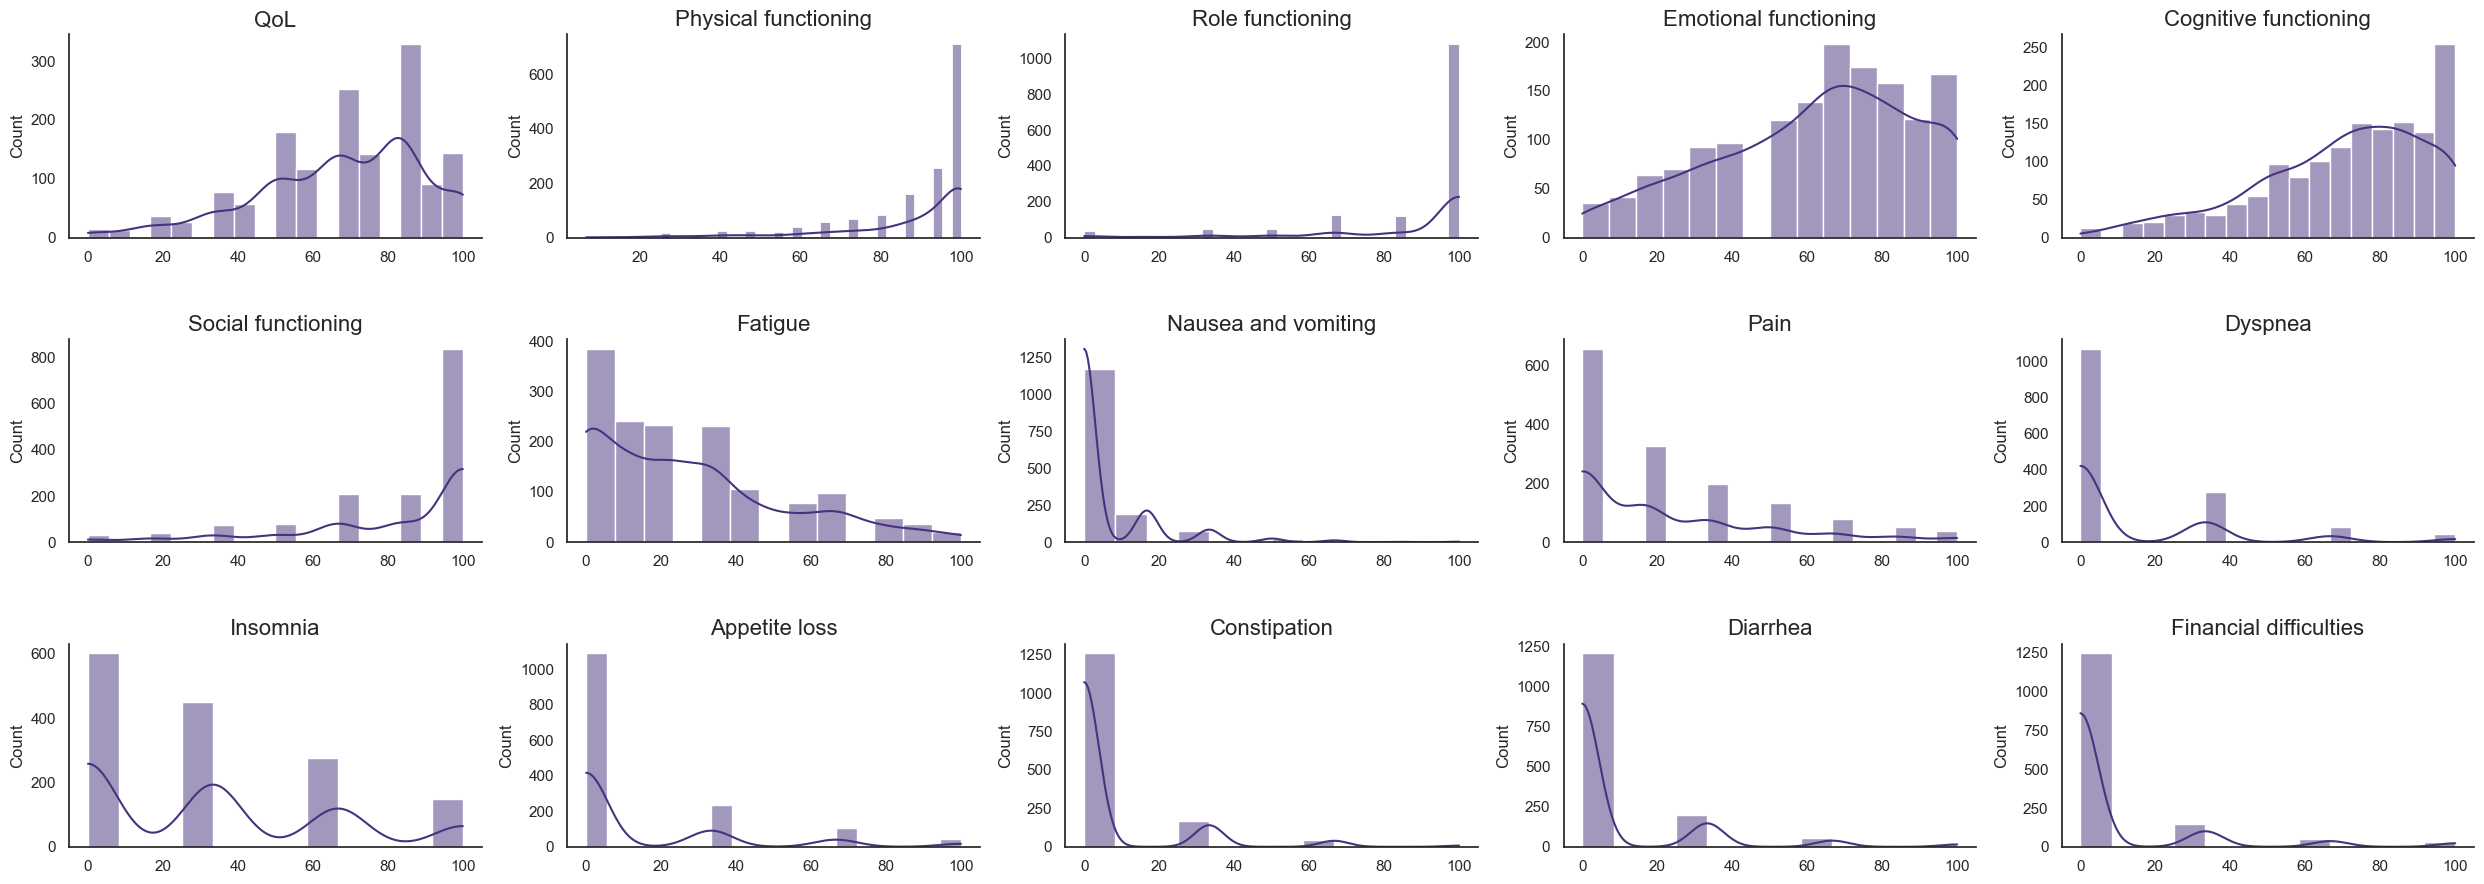

In [9]:
# Grilla de distribución de las variables del dominio
afn.viz_columns_distribution(df_C30)

Como era de esperar, todas las variables presentan una distribución con colas a derecha o izquierda, con menos efecto en QoL, funcionamiento emocional, funcionamiento cognitivo, fatiga e insomnio. El funcionamiento emocional y el cognitivo contienen la mayor dispersión de valores, mientras náuseas, disnea, constipado, diarrea y problemas financieros tienen una densidad muy elevada en los valores mínimos.

Vamos a graficar la dispersión de los atributos para comparar su expresividad más de cerca. La función auxiliar viz_dispersion muestra los gráficos de dispersión (boxplot) y una comparativa de la cantidad de valores únicos.

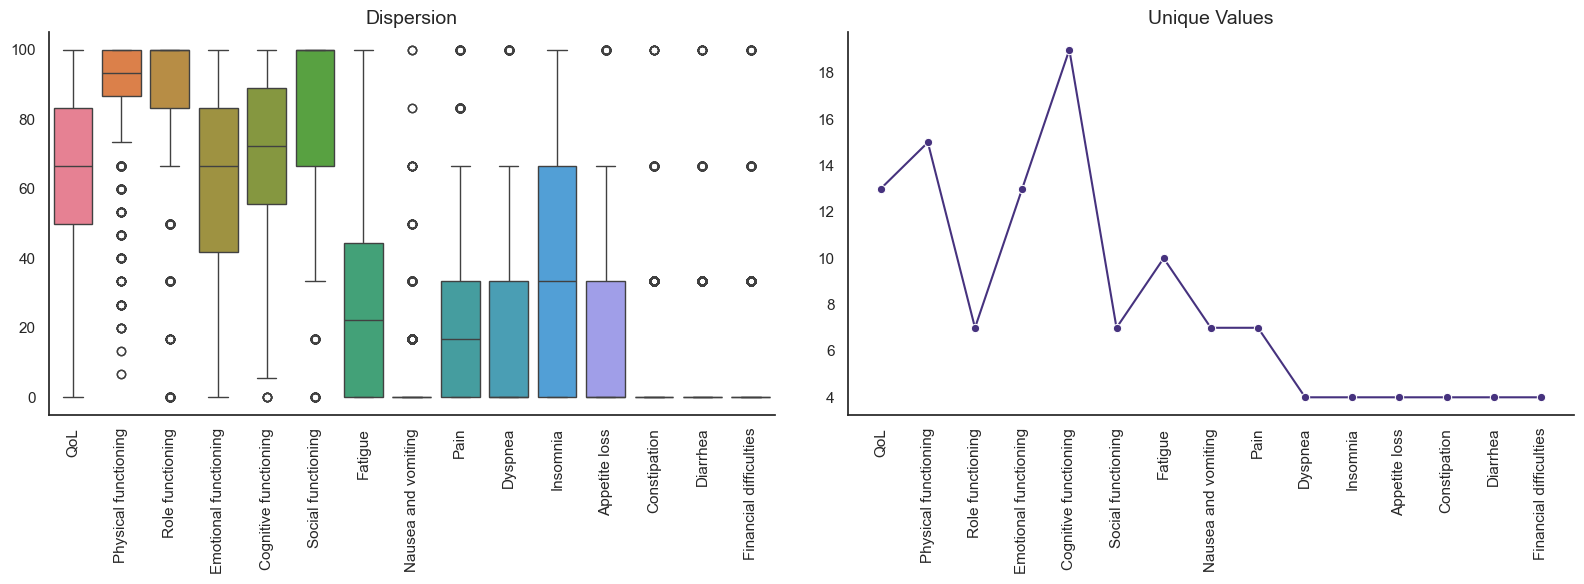

In [10]:
# Visualización comparativa de la dispersión y la cantidad de valores nulos 
afn.viz_dispersion(df_C30)



Existen dos tipos de variable claramente diferenciados. Por un lado, las relativas al funcionamiento físico, de rol, emocional, cognitivo y social de las personas durante su vida cotidiana. Estas contienen una mayor densidad en los valores altos que produce una distribución con cola a la izquierda (skew negativo). En líneas generales, podemos decir que las personas tienen una valoración positiva sobre su desempeño cotidiano, siendo los aspectos físicos, de rol y social los que más casos atípicos presentan; y que pueden deberse a un subgrupo relacionado con otros factores como el tipo de tratamiento. Por otro lado, se tienen las variables relativas a los síntomas propios de la enfermedad o el tratamiento: fatiga, náuseas, dolor, disnea, insomnio, pérdida de apetito, estreñimiento y diarrea. Estas, junto con los problemas financieros producidos por la enfermedad, tienen una mayor densidad en los valores bajos con cola hacia la derecha (skew positivo). Este hecho podría indicar que la mayoría de las personas en tratamiento no se ve afectada por los mismos síntomas, siendo la fatiga, el dolor y el insomnio los más presentes. Mientras las nauseas, el estreñimiento y la diarrea parecen ser los más escasos. En cuanto a los problemas financieros podríamos decir que solo un sector de la muestra se ha visto muy o medianamente afectada.

### QoL - variable objetivo 
*Calidad de vida: resume la percepción global de las personas de su bienestar y salud. Se calcula a partir de las preguntas 29 y 30*

Hemos visto que se trata de una variable discreta con 13 valores únicos formando una serie iniciada en 0 y terminada en 100, con intervalo de 8,33. En los estadísticos podemos ver que la media (67,45) se sitúa muy cerca de la mediana (66,67) y nos da una idea de una asimetría relativamente baja (0,68). Vamos a explorar la cantidad de observaciones por cada valor y su acumulación para tener una idea más precisa:


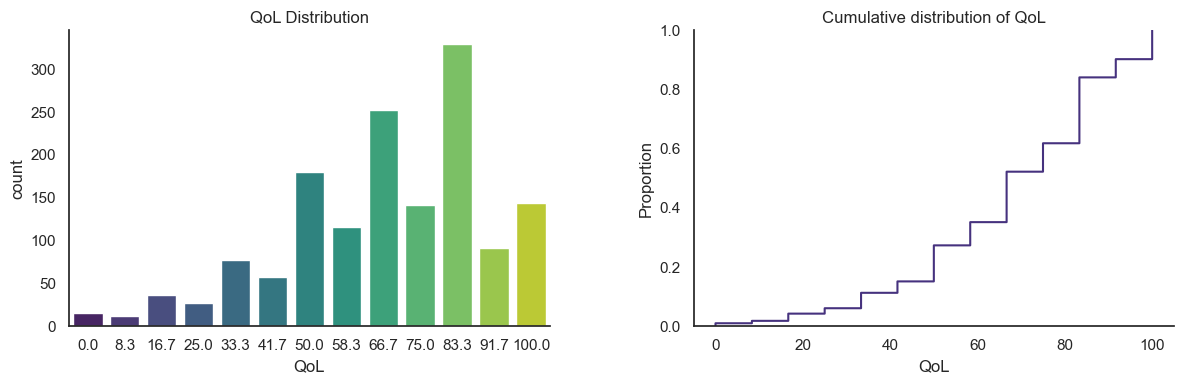

In [11]:
# Visualización de las distribuciones: por valor y acumulada
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.countplot(x=df_C30['QoL'].round(1), ax=axes[0], palette='viridis')
sns.ecdfplot(data=df_C30, x="QoL", ax=axes[1])
axes[0].set_title("QoL Distribution")
axes[1].set_title("Cumulative distribution of QoL")
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)
sns.despine()
plt.show()

La distribución de la variable muestra como aproximadamente un 20% de las personas tiene una percepción de la calidad de vida media-baja (<50) y el 70% la considera media-alta (>60). En los valores más altos encontramos que casi un 40% la considera alta (>80). En líneas generales, se puede decir que las personas de la muestra consideran su calidad de vida durante el tratamiento como buena o muy buena, en el sentido del concepto «bueno» como cercano a la normalidad que se puede esperar en este contexto, mientras un ≈15% la considera mala o muy mala.

La separación en intervalos de 8,33 en 13 clases aparece como consecuencia de la forma de calcular el índice QoL con las respuestas del formulario QLQ-C30 [1]. Es decir, no se trata de una respuesta directa de las personas encuestadas sino el resultado de la aplicación de fórmulas matemáticas. En consecuencia, podemos decir que una separación de la variable en tres niveles o clases: baja, media y alta; permite mantener la expresividad de los datos y dotar a la clasificación de mayor sentido. La separación en 4 clases (baja, media-baja, media-alta y alta) sería contraproducente dada la escasez de observaciones en los valores bajos que aumentarían la asimetría y el desbalance, perjudicando la clasificación.

### Análisis univariable respecto a la variable objetivo
A continuación se explora la relación de cada una de las variables con respecto a la calidad de vida para profundizar en el análisis de los datos. Dado que el conjunto está compuesto solo por variables discretas, se ha implementado la función viz_single_variable con el fin de presentar la siguiente información relevante:

- La visualización de la distribución de los valores de la variable por el QoL. Esta información permite evaluar que niveles de calidad de vida contienen los valores de la variable y en que cantidad relativa o proporción: interpretada como el cociente que indica la fracción de casos de la muestra que pertenece a una determinada categoría o rango.
- El gráfico de la distribución de la variable para cada valor de QoL. Esta información es complementaria a la anterior, ya que muestra como se comporta la variable en cada nivel de la calidad de vida. También es posible ver los estadísticos más relevantes de forma comparativa, para estudiar su evolución en todo el rango, e identificar en que niveles de calidad de vida la variable presenta casos atípicos.
- La curva de distribución acumulada de la variable. Ayuda a entender cómo se distribuye la variable en todo su rango y a identificar puntos en los que se concentra o dispersa la mayor parte de las observaciones.
- La información visual se complementa con una tabla informativa de los estadísticos más importantes de la variable con respecto a cada valor que toma QoL. También se muestra la asimetría en la distribución. Además se muestra información sobre los valores atípicos: la detección se realiza utilizando criterios estadísticos (la regla de 1.5×IQR), lo que permite la identificación incluso con la escala acotada entre 0 y 100. 



### Physical functioning

*Funcionamiento físico: mide la capacidad para realizar actividades físicas cotidianas. Se calcula a partir de las preguntas 1, 2, 3, 4 y 5.*

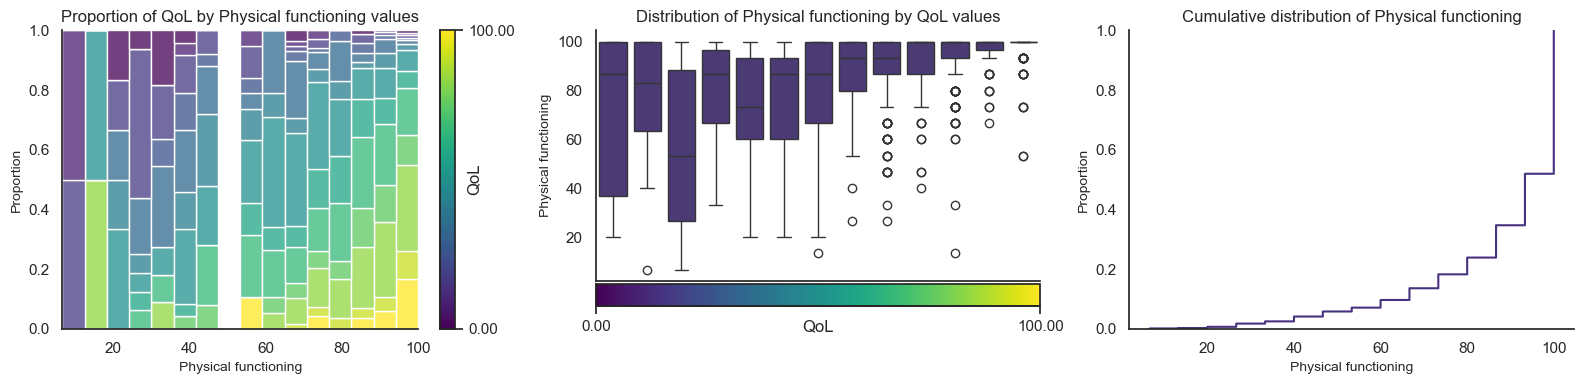



Statistics for Physical functioning by QoL values:



count  mean   std   min    25%    50%    75%    max  Outliers Count  \
QoL                                                                           
0.00    15.00 70.67 31.55 20.00  36.67  86.67 100.00 100.00               0   
8.33    12.00 75.56 29.99  6.67  63.33  83.33 100.00 100.00               1   
16.67   36.00 59.81 30.84  6.67  26.67  53.33  88.33 100.00               0   
25.00   27.00 78.27 22.08 33.33  66.67  86.67  96.67 100.00               0   
33.33   77.00 71.17 22.10 20.00  60.00  73.33  93.33 100.00               0   
41.67   57.00 77.66 22.73 20.00  60.00  86.67  93.33 100.00               0   
50.00  180.00 79.93 19.68 13.33  66.67  86.67 100.00 100.00               1   
58.33  116.00 87.99 13.82 26.67  80.00  93.33 100.00 100.00               2   
66.67  252.00 90.05 13.80 26.67  86.67  93.33 100.00 100.00              24   
75.00  142.00 92.63 11.33 40.00  86.67 100.00 100.00 100.00               8   
83.33  329.00 94.75  9.75 13.33  93.33 100.00 100.00 100.00              29   
91.67   91.00 96.78  6.84 66.67  96.67 100.00 100.00 100.00              11   
100.00 144.00 97.55  7.17 53.33 100.00 100.00 100.00 100.00              26   

                                         Outliers  skew  
QoL                                                      
0.00                                           [] -0.49  
8.33                                       [6.67] -1.23  
16.67                                          []  0.04  
25.00                                          [] -0.87  
33.33                                          [] -0.52  
41.67                                          [] -0.79  
50.00                                     [13.33] -0.97  
58.33                               [26.67, 40.0] -1.64  
66.67   [26.67, 33.33, 46.67, 53.33, 60.0, 66.67] -1.91  
75.00                  [40.0, 46.67, 60.0, 66.67] -2.35  
83.33    [13.33, 33.33, 60.0, 66.67, 73.33, 80.0] -3.57  
91.67                 [66.67, 73.33, 80.0, 86.67] -2.51  
100.00               [53.33, 73.33, 86.67, 93.33] -4.28

In [12]:
# Visualización de los atributos más destacables de la variable
afn.viz_single_variable(df_C30, 'Physical functioning')

Se puede ver que hay una relación directa con QoL, ya que cuanto mejor es el funcionamiento físico se tiene una percepción mejor de la calidad de vida. En la distribución vemos como para valores bajos de QoL se encuentran valores aproximadamente en todo el rango de funcionamiento físico. Sin embargo, en la mitad superior de los valores de la variable objetivo cabe esperar un mejor funcionamiento físico. Por lo tanto, los gráficos indican que un buen funcionamiento físico no es condición suficiente para una mejor percepción de la calidad de vida, pero que una calidad de vida alta necesita de un buen funcionamiento físico, al menos un valor de 50 o superior para alcanzar el máximo de QoL. 

Esta tendencia se ve reflejada en la concentración alta de valores máximos para una calidad de vida muy alta, donde incluso un valor de 93,33 se puede considerar como outlier. Sin embargo, al mismo tiempo se ve interrumpida para el QoL de 83,33 con un mínimo de 13,33 de la variable. En efecto, si observamos el gráfico de proporciones encontramos una *anomalía* de valores altos (50%) de QoL en el rango de 13,33 de la variable. Es decir, las personas tienen menor tolerancia a un mal funcionamiento físico para obtener una percepción de calidad de vida alta, pero la tolerancia al aspecto físico aumenta ligeramente para calidades de vida medias y altas.

Por último, se observa como a partir de un valor de QoL de 50 se tienen valores máximos de funcionamiento físico en el tercer cuartil. En la curva de distribución acumulada se muestra como cerca del 80% de las personas perciben una calidad de vida alta (>80). Este hecho indica que la mayoría de las personas encuestadas tiene una sensación del funcionamiento físico relativamente buena. Es decir, que el predictor incide positivamente en la percepción de la calidad de vida.

### Role Functioning
*Funcionamiento de rol: evalúa el impacto de la enfermedad en el desempeño de actividades laborales y de ocio. Se obtiene a partir de las preguntas 6 y 7, que indagan sobre restricciones en el trabajo y la vida social*

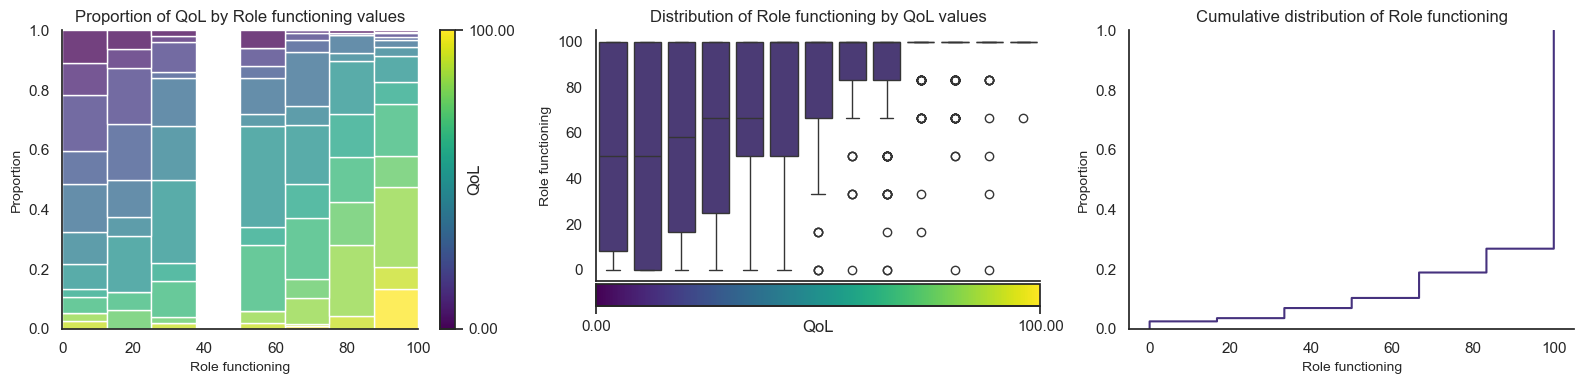



Statistics for Role functioning by QoL values:



count  mean   std   min    25%    50%    75%    max  Outliers Count  \
QoL                                                                           
0.00    15.00 52.22 42.20  0.00   8.33  50.00 100.00 100.00               0   
8.33    12.00 51.39 46.85  0.00   0.00  50.00 100.00 100.00               0   
16.67   36.00 56.94 40.51  0.00  16.67  58.33 100.00 100.00               0   
25.00   27.00 63.58 39.23  0.00  25.00  66.67 100.00 100.00               0   
33.33   77.00 67.75 30.75  0.00  50.00  66.67 100.00 100.00               0   
41.67   57.00 73.68 33.33  0.00  50.00 100.00 100.00 100.00               0   
50.00  180.00 80.46 25.94  0.00  66.67 100.00 100.00 100.00               6   
58.33  116.00 89.66 18.34  0.00  83.33 100.00 100.00 100.00               7   
66.67  252.00 90.48 19.16  0.00  83.33 100.00 100.00 100.00              20   
75.00  142.00 95.07 12.36 16.67 100.00 100.00 100.00 100.00              27   
83.33  329.00 96.86  9.84  0.00 100.00 100.00 100.00 100.00              42   
91.67   91.00 96.34 14.23  0.00 100.00 100.00 100.00 100.00               9   
100.00 144.00 99.77  2.78 66.67 100.00 100.00 100.00 100.00               1   

                                Outliers   skew  
QoL                                              
0.00                                  []  -0.05  
8.33                                  []  -0.01  
16.67                                 []  -0.19  
25.00                                 []  -0.54  
33.33                                 []  -0.76  
41.67                                 []  -0.93  
50.00                       [0.0, 16.67]  -1.17  
58.33                 [0.0, 33.33, 50.0]  -2.20  
66.67          [0.0, 16.67, 33.33, 50.0]  -2.24  
75.00       [16.67, 33.33, 66.67, 83.33]  -3.48  
83.33          [0.0, 50.0, 66.67, 83.33]  -4.76  
91.67   [0.0, 33.33, 50.0, 66.67, 83.33]  -5.03  
100.00                           [66.67] -12.00

In [13]:
# Visualización de los atributos más destacables de la variable
afn.viz_single_variable(df_C30, 'Role functioning')


El funcionamiento de rol guarda una relación con QoL similar al caso anterior, aunque aún más pronunciada y con una tolerancia mayor. Los valores más altos de calidad de vida se encuentran con mayor proporción en los valores altos de la variable. Si bien para los valores bajos de QoL se encuentran valores distribuidos sobre todo el rango del predictor, a partir de un QoL de 50 se aprecia una mayor densidad hacia valores muy altos de la variable. Este hecho podría estar indicando que una buena calidad de vida necesita un buen desempeño de rol mucho más marcado que el aspecto físico, aunque no sea suficiente porque se encuentran valores en todo el rango, incluso máximos, de la variable para índices bajos de calidad de vida.

En la tabla podemos ver una tendencia similar al aspecto físico, aunque en este caso los valores máximos comienzan a encontrarse incluso antes del valor 50 de QoL. Si bien la desviación es un poco más amplia, hay una mayor densidad de los valores máximos incluso antes del valor 50 de QoL. Además, los valores altos en la mayor cantidad de observaciones a partir de 66,67, también podría relacionarse con el hecho que las personas encuestadas tienden a percibir un buen desempeño de rol, aproximadamente un 75% tienen el nivel máximo. También encontramos que el máximo de calidad de vida tiene una media muy cercana al máximo del predictor y una desviación estándar muy pequeña (2,78), indicando que la tolerancia a un mal desempeño en este rango es prácticamente nula.

### Emotional Functioning
*Funcionamiento emocional: mide la influencia de la enfermedad en las interacciones sociales y en la vida familiar. Se calcula a partir de las preguntas 21, 22, 23 y 24, referentes al estado de ánimo y bienestar emocional.*

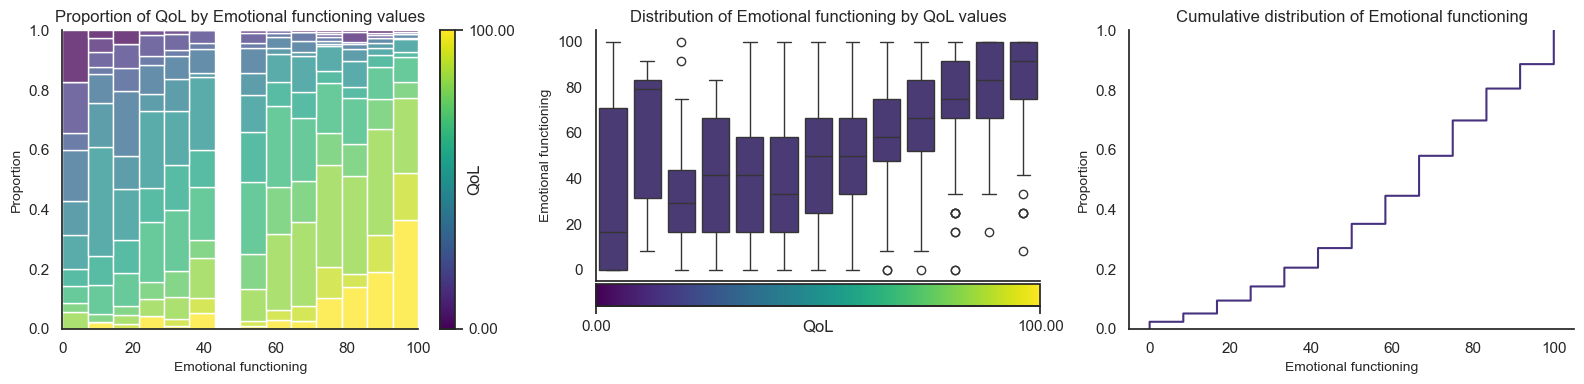



Statistics for Emotional functioning by QoL values:



count  mean   std   min   25%   50%    75%    max  Outliers Count  \
QoL                                                                         
0.00    15.00 31.67 38.99  0.00  0.00 16.67  70.83 100.00               0   
8.33    12.00 59.03 32.07  8.33 31.25 79.17  83.33  91.67               0   
16.67   36.00 32.18 25.60  0.00 16.67 29.17  43.75 100.00               2   
25.00   27.00 42.28 25.42  0.00 16.67 41.67  66.67  83.33               0   
33.33   77.00 39.61 26.01  0.00 16.67 41.67  58.33 100.00               0   
41.67   57.00 40.79 27.71  0.00 16.67 33.33  58.33 100.00               0   
50.00  180.00 48.33 25.96  0.00 25.00 50.00  66.67 100.00               0   
58.33  116.00 50.65 23.24  0.00 33.33 50.00  66.67 100.00               0   
66.67  252.00 59.82 22.52  0.00 47.92 58.33  75.00 100.00               2   
75.00  142.00 65.38 20.83  0.00 52.08 66.67  83.33 100.00               1   
83.33  329.00 73.89 18.95  0.00 66.67 75.00  91.67 100.00               8   
91.67   91.00 79.76 19.61 16.67 66.67 83.33 100.00 100.00               1   
100.00 144.00 85.65 18.89  8.33 75.00 91.67 100.00 100.00               5   

                   Outliers  skew  
QoL                                
0.00                     []  0.81  
8.33                     [] -0.68  
16.67        [91.67, 100.0]  0.86  
25.00                    [] -0.13  
33.33                    []  0.43  
41.67                    []  0.39  
50.00                    []  0.06  
58.33                    []  0.03  
66.67                 [0.0] -0.30  
75.00                 [0.0] -0.52  
83.33    [0.0, 16.67, 25.0] -0.83  
91.67               [16.67] -0.92  
100.00  [8.33, 25.0, 33.33] -1.79

In [14]:
# Visualización de los atributos más destacables de la variable
afn.viz_single_variable(df_C30, 'Emotional functioning')

La distribución de la variable por el QoL muestra una relación directa entre ambas: a partir de un valor de 60 la proporción de una calidad de vida alta tiene un crecimiento mayor. Otro aspecto a destacar es la disminución de valores altos de la variable en los índices bajos de calidad de vida, donde la media baja considerablemente, indicando que el funcionamiento emocional alto no está tan presente cuando la calidad de vida se percibe como baja, al contrario que las variables anteriores. 

La tabla refleja como pueden percibirse niveles de calidad de vida altos incluso con un funcionamiento emocional bajo, como refleja el mínimo de 8,33 para el máximo QoL. Este hecho parece tener coherencia con las medias más bajas y con mayor desviación de estas a partir del 66,67 de QoL, con respecto a las variables anteriores. Es decir, si bien hay una incidencia positiva del predictor en la variable objetivo, las personas aparentemente demuestran más tolerancia en el aspecto emocional para percibir una calidad de vida alta. Sin embargo, las personas con baja calidad de vida se ven más afectadas en el aspecto emocional que en el físico y el de rol. Si nos fijamos en la distribución acumulada, se puede ver un crecimiento uniforme sin puntos de concentración marcados.




### Cognitive Functioning
*Funcionamiento cognitivo: evalúa la capacidad de concentración y memoria. Se deriva de las preguntas 20 y 25, que exploran dificultades en la función cognitiva.*

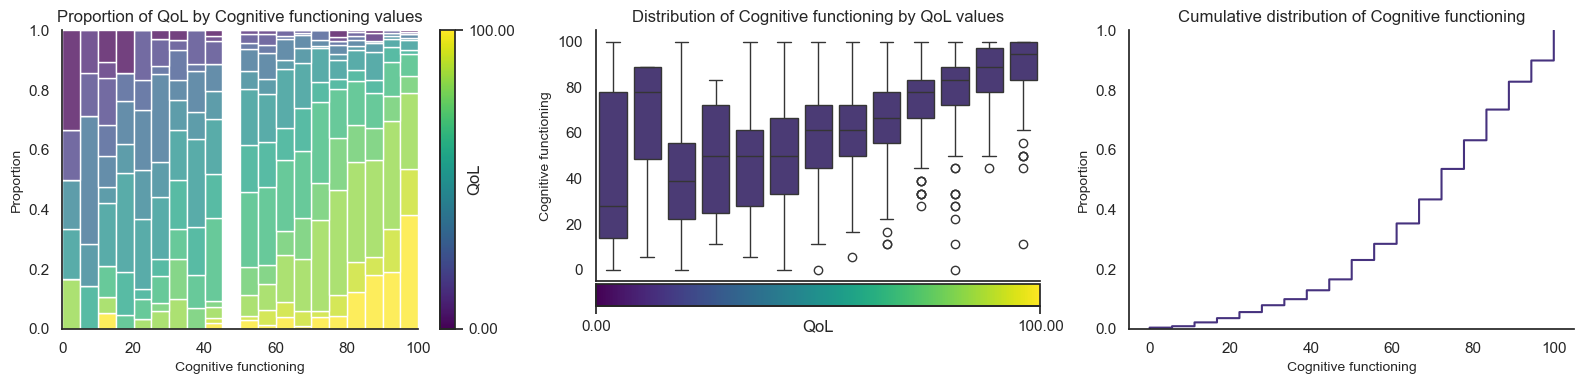



Statistics for Cognitive functioning by QoL values:



count  mean   std   min   25%   50%    75%    max  Outliers Count  \
QoL                                                                         
0.00    15.00 40.00 34.83  0.00 13.89 27.78  77.78 100.00               0   
8.33    12.00 63.43 30.29  5.56 48.61 77.78  88.89  88.89               0   
16.67   36.00 41.82 24.07  0.00 22.22 38.89  55.56 100.00               0   
25.00   27.00 48.56 24.54 11.11 25.00 50.00  72.22  83.33               0   
33.33   77.00 47.84 23.45  5.56 27.78 50.00  61.11 100.00               0   
41.67   57.00 50.49 24.36  0.00 33.33 50.00  66.67 100.00               0   
50.00  180.00 57.62 22.48  0.00 44.44 61.11  72.22 100.00               1   
58.33  116.00 60.06 19.49  5.56 50.00 61.11  72.22 100.00               1   
66.67  252.00 67.46 17.99 11.11 55.56 66.67  77.78 100.00               3   
75.00  142.00 73.87 16.19 27.78 66.67 77.78  83.33 100.00               8   
83.33  329.00 79.77 15.54  0.00 72.22 83.33  88.89 100.00              10   
91.67   91.00 84.55 14.48 44.44 77.78 88.89  97.22 100.00               1   
100.00 144.00 89.35 13.96 11.11 83.33 94.44 100.00 100.00               6   

                                        Outliers  skew  
QoL                                                     
0.00                                          []  0.54  
8.33                                          [] -1.05  
16.67                                         []  0.59  
25.00                                         [] -0.10  
33.33                                         []  0.19  
41.67                                         []  0.08  
50.00                                      [0.0] -0.26  
58.33                                     [5.56] -0.16  
66.67                             [11.11, 16.67] -0.39  
75.00                      [27.78, 33.33, 38.89] -0.68  
83.33   [0.0, 11.11, 22.22, 27.78, 33.33, 44.44] -1.37  
91.67                                    [44.44] -0.79  
100.00               [11.11, 44.44, 50.0, 55.56] -2.25

In [15]:
# Visualización de los atributos más destacables de la variable
afn.viz_single_variable(df_C30, 'Cognitive functioning')


La variable presenta un comportamiento muy similar al caso del funcionamiento emocional, aunque con unos valores ligeramente superiores. Es posible que ambos atributos estén muy relacionados, aunque las personas presentan un mejor funcionamiento cognitivo que emocional, como demuestra la proporción máxima de QoL en la distribución: el crecimiento exponencial aumenta a partir de 80 y hay una menor tolerancia a valores bajos para alcanzar una calidad de vida alta. A pesar de esto, podemos decir que la mayoría de las personas tienen un nivel bueno en el aspecto cognitivo, como muestra la distribución acumulada con cerca del 80% de las personas en un valor superior a 50. 

En cuanto a los outliers, se encuentra un conjunto mayor en el valor 83,33 de QoL que puede pertenecer a un subgrupo de personas con mayor tolerancia al aspecto cognitivo para conseguir niveles de calidad de vida altos. 

### Social Functioning
*Funcionamiento social: mide la influencia de la enfermedad en las interacciones sociales y en la vida familiar. Se calcula a partir de las preguntas 26 y 27, que indagan sobre la participación en actividades sociales*


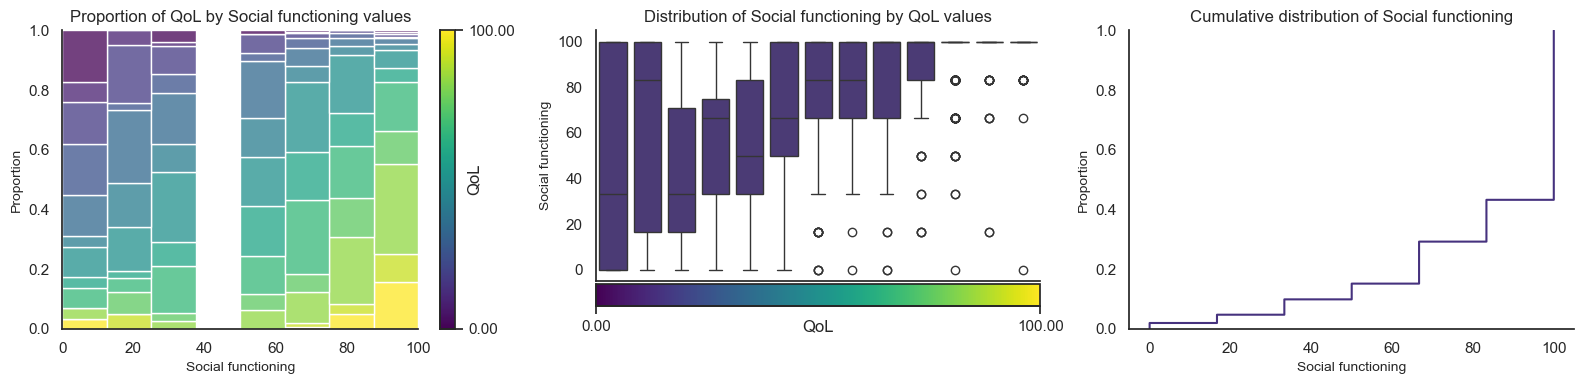



Statistics for Social functioning by QoL values:



count  mean   std   min    25%    50%    75%    max  Outliers Count  \
QoL                                                                           
0.00    15.00 47.78 43.13  0.00   0.00  33.33 100.00 100.00               0   
8.33    12.00 61.11 44.00  0.00  16.67  83.33 100.00 100.00               0   
16.67   36.00 46.76 34.23  0.00  16.67  33.33  70.83 100.00               0   
25.00   27.00 51.85 34.07  0.00  33.33  66.67  75.00 100.00               0   
33.33   77.00 56.06 30.82  0.00  33.33  50.00  83.33 100.00               0   
41.67   57.00 64.33 29.62  0.00  50.00  66.67 100.00 100.00               0   
50.00  180.00 72.50 25.19  0.00  66.67  83.33 100.00 100.00               9   
58.33  116.00 76.58 21.98  0.00  66.67  83.33 100.00 100.00               2   
66.67  252.00 84.13 21.54  0.00  66.67 100.00 100.00 100.00               4   
75.00  142.00 89.91 18.08 16.67  83.33 100.00 100.00 100.00               9   
83.33  329.00 93.92 13.15  0.00 100.00 100.00 100.00 100.00              77   
91.67   91.00 95.79 13.96 16.67 100.00 100.00 100.00 100.00              12   
100.00 144.00 97.92  9.63  0.00 100.00 100.00 100.00 100.00              12   

                                Outliers  skew  
QoL                                             
0.00                                  []  0.17  
8.33                                  [] -0.38  
16.67                                 []  0.40  
25.00                                 [] -0.22  
33.33                                 []  0.01  
41.67                                 [] -0.27  
50.00                       [0.0, 16.67] -0.82  
58.33                       [0.0, 16.67] -0.77  
66.67                       [0.0, 16.67] -1.41  
75.00               [16.67, 33.33, 50.0] -2.26  
83.33   [0.0, 33.33, 50.0, 66.67, 83.33] -2.89  
91.67              [16.67, 66.67, 83.33] -4.47  
100.00               [0.0, 66.67, 83.33] -7.93

In [16]:
# Visualización de los atributos más destacables de la variable
afn.viz_single_variable(df_C30, 'Social functioning')


La relación de la variable con la calidad de vida se asemeja en gran medida a la analizada en el funcionamiento de rol. Este comportamiento parece tener coherencia en cuanto los roles se desempeñan a nivel social. En este caso, también se encuentran valores muy distribuidos para los índices medios de calidad bajos, pero con una menor tolerancia a un mal funcionamiento social para tener una calidad de vida media-alta, con alguna excepción. Podría percibirse que las personas atribuyen mucha importancia al aspecto social para conseguir niveles altos de calidad de vida, como de demuestra la presencia de valores extremos en los valores máximos de QoL.

### Fatigue
*Fatiga: indica el nivel de cansancio y agotamiento. Se calcula combinando las respuestas a las preguntas 10, 12 y 18, sobre la sensación de debilidad y falta de energía.*

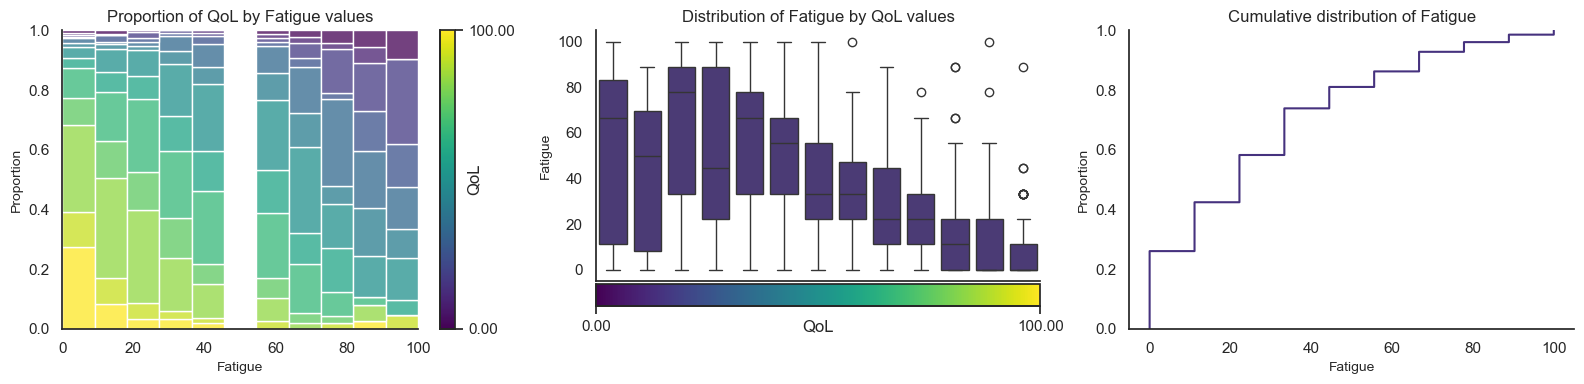



Statistics for Fatigue by QoL values:



count  mean   std  min   25%   50%   75%    max  Outliers Count  \
QoL                                                                       
0.00    15.00 50.37 39.81 0.00 11.11 66.67 83.33 100.00               0   
8.33    12.00 43.52 35.28 0.00  8.33 50.00 69.44  88.89               0   
16.67   36.00 63.58 32.16 0.00 33.33 77.78 88.89 100.00               0   
25.00   27.00 51.85 33.76 0.00 22.22 44.44 88.89 100.00               0   
33.33   77.00 55.12 26.94 0.00 33.33 66.67 77.78 100.00               0   
41.67   57.00 49.12 27.85 0.00 33.33 55.56 66.67 100.00               0   
50.00  180.00 40.19 24.31 0.00 22.22 33.33 55.56 100.00               0   
58.33  116.00 34.67 22.80 0.00 22.22 33.33 47.22 100.00               1   
66.67  252.00 27.82 20.24 0.00 11.11 22.22 44.44  88.89               0   
75.00  142.00 20.42 17.34 0.00 11.11 22.22 33.33  77.78               1   
83.33  329.00 15.40 15.67 0.00  0.00 11.11 22.22  88.89               4   
91.67   91.00 11.84 17.82 0.00  0.00  0.00 22.22 100.00               2   
100.00 144.00  5.86 12.46 0.00  0.00  0.00 11.11  88.89              11   

                     Outliers  skew  
QoL                                  
0.00                       [] -0.20  
8.33                       [] -0.09  
16.67                      [] -0.71  
25.00                      []  0.05  
33.33                      [] -0.48  
41.67                      [] -0.12  
50.00                      []  0.24  
58.33                 [100.0]  0.40  
66.67                      []  0.54  
75.00                 [77.78]  0.75  
83.33          [66.67, 88.89]  1.27  
91.67          [77.78, 100.0]  2.42  
100.00  [33.33, 44.44, 88.89]  3.19

In [17]:
# Visualización de los atributos más destacables de la variable
afn.viz_single_variable(df_C30, 'Fatigue')


Encontramos como se invierte la relación con QoL, respecto a las variables anteriores, al tratarse del primero de los predictores relacionado con los síntomas de la enfermedad. En primer lugar se puede ver que las proporciones de niveles de calidad de vida alta caen drásticamente a partir de un valor de fatiga cercano a 20; este nivel es el que experimenta el 40% de las personas. La distribución es uniforme hasta los valores medio-altos de QoL y solo en el extremo de la escala la tolerancia se reduce. Sin embargo, la cantidad de outliers para una calidad de vida de 80 o superior puede indicar que existen más personas con una tolerancia alta para este síntoma.

### Nausea and Vomiting
*Náuseas y vómitos: captura la frecuencia y severidad de estos síntomas. Se obtiene a partir de las preguntas 14 y 15, que evalúan episodios de este tipo*

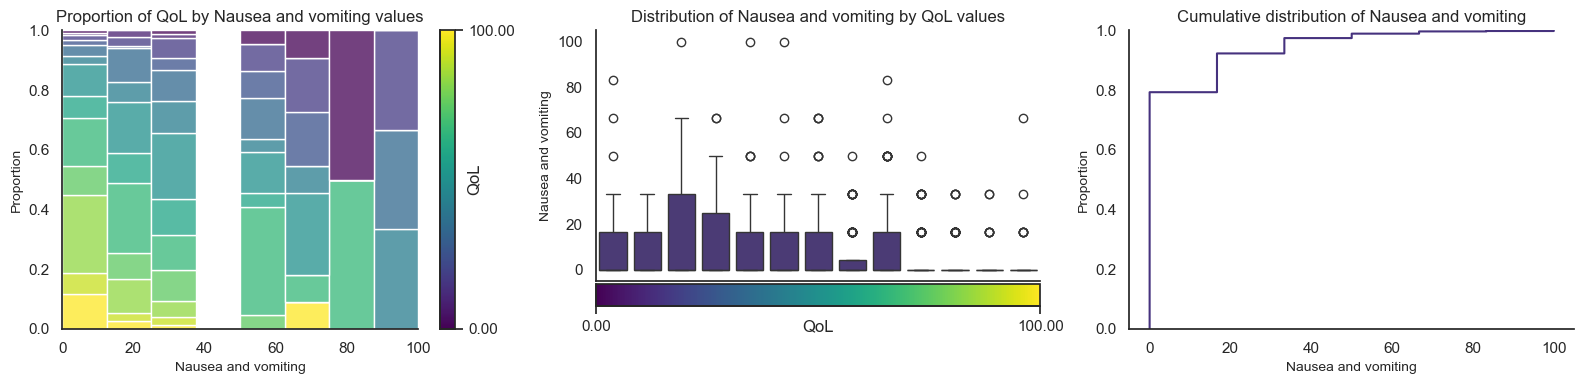



Statistics for Nausea and vomiting by QoL values:



count  mean   std  min  25%  50%   75%    max  Outliers Count  \
QoL                                                                     
0.00    15.00 15.56 28.50 0.00 0.00 0.00 16.67  83.33               3   
8.33    12.00  8.33 11.24 0.00 0.00 0.00 16.67  33.33               0   
16.67   36.00 16.67 24.56 0.00 0.00 0.00 33.33 100.00               1   
25.00   27.00 12.96 22.33 0.00 0.00 0.00 25.00  66.67               2   
33.33   77.00 11.47 17.16 0.00 0.00 0.00 16.67 100.00               4   
41.67   57.00 12.28 19.29 0.00 0.00 0.00 16.67 100.00               3   
50.00  180.00  8.15 14.37 0.00 0.00 0.00 16.67  66.67               6   
58.33  116.00  5.75 11.01 0.00 0.00 0.00  4.17  50.00              29   
66.67  252.00  6.35 13.20 0.00 0.00 0.00 16.67  83.33              10   
75.00  142.00  4.23  9.81 0.00 0.00 0.00  0.00  50.00              26   
83.33  329.00  1.52  5.46 0.00 0.00 0.00  0.00  33.33              26   
91.67   91.00  1.65  6.11 0.00 0.00 0.00  0.00  33.33               7   
100.00 144.00  1.27  6.85 0.00 0.00 0.00  0.00  66.67               7   

                     Outliers  skew  
QoL                                  
0.00     [50.0, 66.67, 83.33]  1.60  
8.33                       []  1.07  
16.67                 [100.0]  1.70  
25.00                 [66.67]  1.48  
33.33           [50.0, 100.0]  2.37  
41.67    [50.0, 66.67, 100.0]  2.33  
50.00           [50.0, 66.67]  1.99  
58.33    [16.67, 33.33, 50.0]  1.88  
66.67    [50.0, 66.67, 83.33]  2.65  
75.00    [16.67, 33.33, 50.0]  2.42  
83.33          [16.67, 33.33]  3.84  
91.67          [16.67, 33.33]  3.99  
100.00  [16.67, 33.33, 66.67]  7.29

In [18]:
# Visualización de los atributos más destacables de la variable
afn.viz_single_variable(df_C30, 'Nausea and vomiting')


La variable tiene valores muy bajos en todo el rango de QoL. De hecho, el 80% de las personas no ha sufrido náuseas y vómitos. La cantidad de outliers es significativa y puede deberse a los casos de las personas que han tenido este síntoma de forma más aguda. En general, la variable parece constante en relación con la calidad de vida, pero con menor tolerancia para alcanzar los niveles más altos. Probablemente, este atributo esté muy relacionado con el tipo de tratamiento (como la quimioterapia), sin embargo, no tenemos datos de los mismos para corroborarlo. En todo caso, los valores altos en este predictor tienen una proporción nula de calidad de vida media-alta, indicando que existe una fuerte incidencia negativa en la variable objetivo.

### Pain
*Dolor: refleja la intensidad del dolor experimentado. Se calcula mediante las preguntas 9 y 19, que indagan sobre la presencia y el grado.*

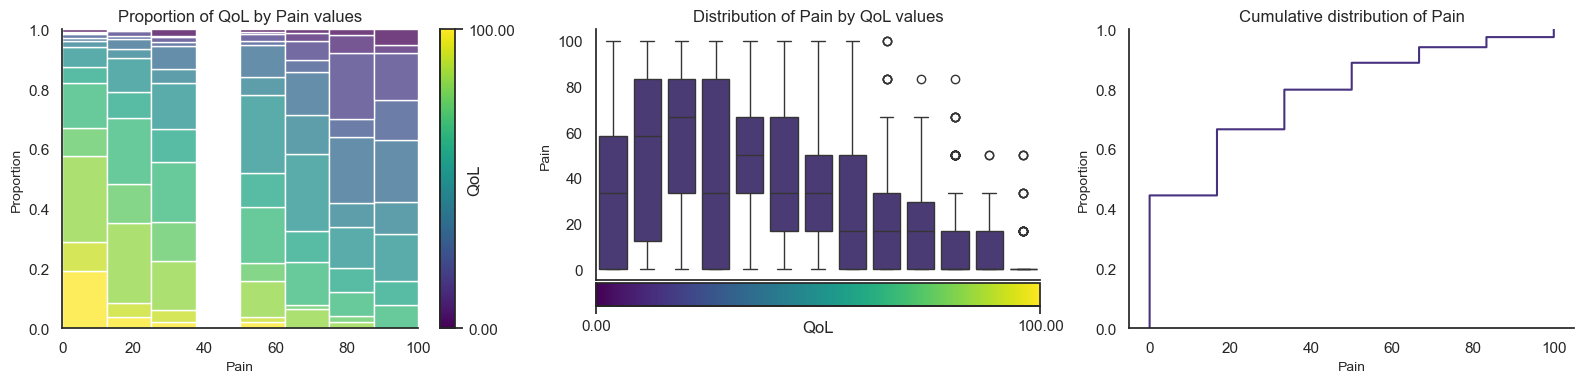



Statistics for Pain by QoL values:



count  mean   std  min   25%   50%   75%    max  Outliers Count  \
QoL                                                                       
0.00    15.00 36.67 36.30 0.00  0.00 33.33 58.33 100.00               0   
8.33    12.00 48.61 37.24 0.00 12.50 58.33 83.33 100.00               0   
16.67   36.00 60.65 33.13 0.00 33.33 66.67 83.33 100.00               0   
25.00   27.00 44.44 39.22 0.00  0.00 33.33 83.33 100.00               0   
33.33   77.00 49.78 30.17 0.00 33.33 50.00 66.67 100.00               0   
41.67   57.00 39.77 31.30 0.00 16.67 33.33 66.67 100.00               0   
50.00  180.00 32.78 27.51 0.00 16.67 33.33 50.00 100.00               0   
58.33  116.00 26.87 26.26 0.00  0.00 16.67 50.00 100.00               0   
66.67  252.00 20.30 22.64 0.00  0.00 16.67 33.33 100.00               7   
75.00  142.00 15.02 16.88 0.00  0.00 16.67 29.17  83.33               1   
83.33  329.00 11.35 16.24 0.00  0.00  0.00 16.67  83.33              22   
91.67   91.00  6.96 12.44 0.00  0.00  0.00 16.67  50.00               2   
100.00 144.00  3.36  9.77 0.00  0.00  0.00  0.00  50.00              19   

                    Outliers  skew  
QoL                                 
0.00                      []  0.66  
8.33                      [] -0.23  
16.67                     [] -0.55  
25.00                     []  0.20  
33.33                     []  0.07  
41.67                     []  0.32  
50.00                     []  0.54  
58.33                     []  0.91  
66.67         [83.33, 100.0]  1.22  
75.00                [83.33]  1.11  
83.33   [50.0, 66.67, 83.33]  1.59  
91.67                 [50.0]  1.76  
100.00  [16.67, 33.33, 50.0]  3.31

In [19]:
# Visualización de los atributos más destacables de la variable
afn.viz_single_variable(df_C30, 'Pain')

El dolor se relaciona de forma inversa a la calidad de vida. Al igual que las 2 variables anteriores, tiene un impacto negativo en el índice QoL. En efecto, a partir de un umbral de 60 la proporción del máximo en la calidad de vida es nula, además, para la mejor percepción de esta solo se alcanza una media de 3,36. La relación también se refleja en el hecho que con un máximo de dolor solo se puede alcanzar un 58,33 de QoL a excepción de casos atípicos que se registran en 66,67, posiblemente debidos a una mayor tolerancia en algunas personas. Parece existir una incidencia negativa considerable en este síntoma, similar a las náuseas, a la hora de poder alcanzar niveles de calidad de vida medianamente buenos. La distribución por rangos de QoL es relativamente uniforme y muy similar a la fatiga, con menor presencia: el 40% de las personas tiene un nivel de dolor inferior a 20 contra el 25% de fatiga. En general, las personas experimentan todos los niveles de dolor en los rangos medio-bajos de calidad de vida pero son menos tolerantes a este síntoma para alcanzar los rangos altos.

### Dyspnea
*Disnea: mide la dificultad para respirar. Se calcula a partir de la pregunta 8 que se refiere a la falta de aire*

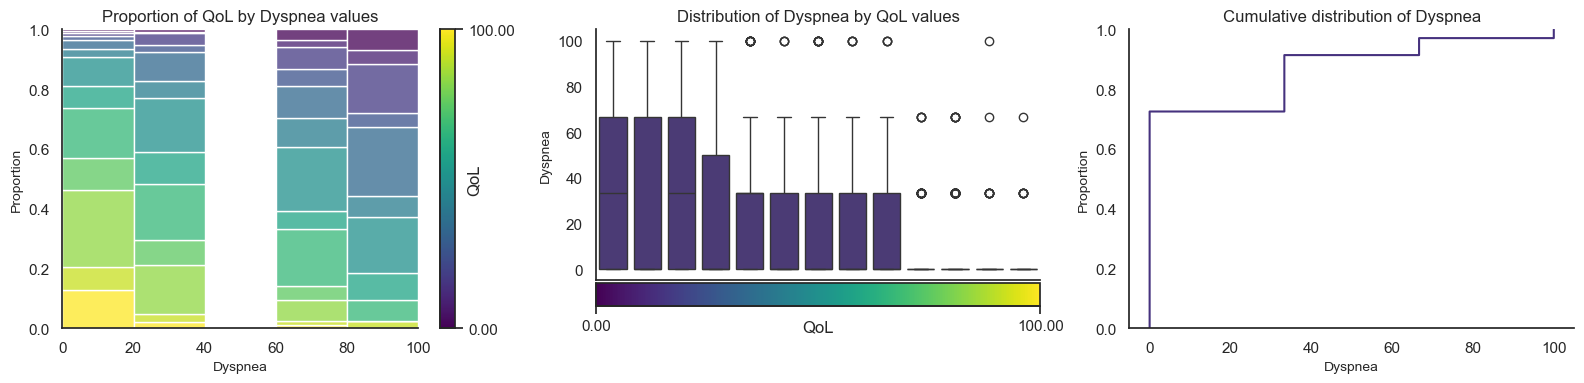



Statistics for Dyspnea by QoL values:



count  mean   std  min  25%   50%   75%    max  Outliers Count  \
QoL                                                                      
0.00    15.00 37.78 41.53 0.00 0.00 33.33 66.67 100.00               0   
8.33    12.00 30.56 41.34 0.00 0.00  0.00 66.67 100.00               0   
16.67   36.00 41.67 36.84 0.00 0.00 33.33 66.67 100.00               0   
25.00   27.00 27.16 33.38 0.00 0.00  0.00 50.00 100.00               0   
33.33   77.00 32.47 34.19 0.00 0.00 33.33 33.33 100.00              10   
41.67   57.00 23.98 30.05 0.00 0.00  0.00 33.33 100.00               3   
50.00  180.00 20.37 28.05 0.00 0.00  0.00 33.33 100.00               8   
58.33  116.00 14.94 24.61 0.00 0.00  0.00 33.33 100.00               4   
66.67  252.00 12.43 21.96 0.00 0.00  0.00 33.33 100.00               3   
75.00  142.00  7.28 15.94 0.00 0.00  0.00  0.00  66.67              27   
83.33  329.00  5.88 14.23 0.00 0.00  0.00  0.00  66.67              52   
91.67   91.00  4.40 15.08 0.00 0.00  0.00  0.00 100.00               9   
100.00 144.00  1.85  8.62 0.00 0.00  0.00  0.00  66.67               7   

                     Outliers  skew  
QoL                                  
0.00                       []  0.48  
8.33                       []  0.87  
16.67                      []  0.41  
25.00                      []  0.90  
33.33                 [100.0]  0.80  
41.67                 [100.0]  1.05  
50.00                 [100.0]  1.29  
58.33                 [100.0]  1.83  
66.67                 [100.0]  1.78  
75.00          [33.33, 66.67]  2.13  
83.33          [33.33, 66.67]  2.39  
91.67   [33.33, 66.67, 100.0]  4.23  
100.00         [33.33, 66.67]  5.08

In [20]:
# Visualización de los atributos más destacables de la variable
afn.viz_single_variable(df_C30, 'Dyspnea')


Con tan solo 4, la variable contiene menor cantidad de valores únicos que las anteriores y también parece ser un síntoma mucho menos común: solo el 40% de las personas experimentan algún tipo de dificultad al respirar. Sin embargo, aquellas que lo padecen, incluso en niveles bajos, tienen mayores dificultades de tener mejor calidad de vida. Podemos ver que la tolerancia es nula a partir de valores medio-altos de QoL (>75) con la excepción de algunos casos atípicos que pueden soportar niveles altos.

### Insomnia
*Insomnio: evalúa las alteraciones del sueño. Se obtiene de la pregunta 11 sobre dificultades para conciliar o mantener el sueño.*

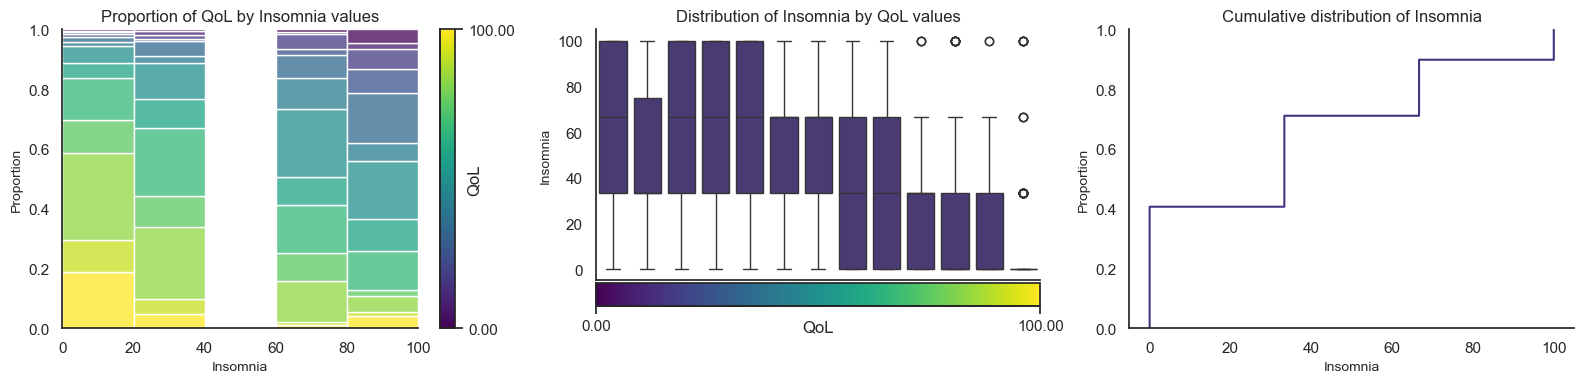



Statistics for Insomnia by QoL values:



count  mean   std  min   25%   50%    75%    max  Outliers Count  \
QoL                                                                        
0.00    15.00 62.22 41.53 0.00 33.33 66.67 100.00 100.00               0   
8.33    12.00 50.00 36.24 0.00 33.33 33.33  75.00 100.00               0   
16.67   36.00 60.19 33.64 0.00 33.33 66.67 100.00 100.00               0   
25.00   27.00 62.96 40.65 0.00 33.33 66.67 100.00 100.00               0   
33.33   77.00 60.17 34.22 0.00 33.33 66.67 100.00 100.00               0   
41.67   57.00 56.14 30.31 0.00 33.33 66.67  66.67 100.00               0   
50.00  180.00 49.44 32.58 0.00 33.33 66.67  66.67 100.00               0   
58.33  116.00 41.38 33.08 0.00  0.00 33.33  66.67 100.00               0   
66.67  252.00 33.07 30.49 0.00  0.00 33.33  66.67 100.00               0   
75.00  142.00 25.35 27.48 0.00  0.00 33.33  33.33 100.00               3   
83.33  329.00 21.07 26.06 0.00  0.00  0.00  33.33 100.00               8   
91.67   91.00 12.82 22.09 0.00  0.00  0.00  33.33 100.00               2   
100.00 144.00 10.42 23.81 0.00  0.00  0.00   0.00 100.00              30   

                     Outliers  skew  
QoL                                  
0.00                       [] -0.48  
8.33                       []  0.25  
16.67                      [] -0.47  
25.00                      [] -0.60  
33.33                      [] -0.27  
41.67                      [] -0.50  
50.00                      [] -0.04  
58.33                      []  0.37  
66.67                      []  0.65  
75.00                 [100.0]  0.70  
83.33                 [100.0]  1.06  
91.67                 [100.0]  1.96  
100.00  [33.33, 66.67, 100.0]  2.61

In [21]:
# Visualización de los atributos más destacables de la variable
afn.viz_single_variable(df_C30, 'Insomnia')


La dificultad para conciliar el sueño continúa en la línea de una relación inversa con QoL, al igual que las últimas 4 variables con incidencia negativa para percibir una buena calidad de vida. Vemos que la distribución es relativamente dispersa en los rangos medios-bajos de QoL, descendiendo a partir de 75. Los niveles más altos de insomnio están asociados a una media-baja calidad de vida. Entre el 60% de personas que padecen este trastorno, podemos decir que los niveles deben ser bajos para obtener una mejor calidad de vida, pero hay una mayor tolerancia a la dificultad de conciliar el sueño que a las náuseas y la disnea. Se puede ver que, aunque muy escasas, existen probabilidades de encontrar personas con alta calidad de vida y el máximo nivel de insomnio.

### Appetite Loss
*Pérdida de apetito: indica cambios en el apetito. Se calcula con la pregunta 13 sobre la disminución del apetito y la ingesta alimentaria.*

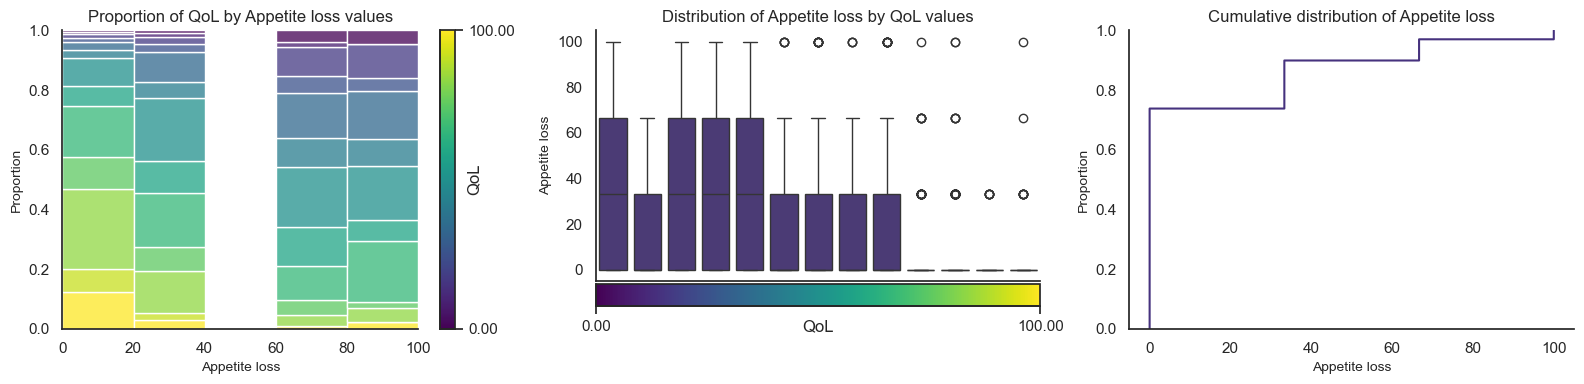



Statistics for Appetite loss by QoL values:



count  mean   std  min  25%   50%   75%    max  Outliers Count  \
QoL                                                                      
0.00    15.00 35.56 38.76 0.00 0.00 33.33 66.67 100.00               0   
8.33    12.00 19.44 26.43 0.00 0.00  0.00 33.33  66.67               0   
16.67   36.00 37.96 37.50 0.00 0.00 33.33 66.67 100.00               0   
25.00   27.00 29.63 33.76 0.00 0.00 33.33 66.67 100.00               0   
33.33   77.00 33.33 32.89 0.00 0.00 33.33 66.67 100.00               0   
41.67   57.00 26.32 32.57 0.00 0.00  0.00 33.33 100.00               4   
50.00  180.00 21.48 28.54 0.00 0.00  0.00 33.33 100.00               8   
58.33  116.00 18.10 26.88 0.00 0.00  0.00 33.33 100.00               3   
66.67  252.00 12.43 24.62 0.00 0.00  0.00 33.33 100.00               9   
75.00  142.00  7.51 17.93 0.00 0.00  0.00  0.00 100.00              25   
83.33  329.00  4.76 14.29 0.00 0.00  0.00  0.00 100.00              39   
91.67   91.00  2.20  8.32 0.00 0.00  0.00  0.00  33.33               6   
100.00 144.00  2.78 12.15 0.00 0.00  0.00  0.00 100.00               9   

                     Outliers  skew  
QoL                                  
0.00                       []  0.48  
8.33                       []  0.99  
16.67                      []  0.35  
25.00                      []  0.72  
33.33                      []  0.59  
41.67                 [100.0]  0.92  
50.00                 [100.0]  1.19  
58.33                 [100.0]  1.33  
66.67                 [100.0]  2.15  
75.00   [33.33, 66.67, 100.0]  2.63  
83.33   [33.33, 66.67, 100.0]  3.59  
91.67                 [33.33]  3.56  
100.00  [33.33, 66.67, 100.0]  5.44

In [22]:
# Visualización de los atributos más destacables de la variable
afn.viz_single_variable(df_C30, 'Appetite loss')


Al igual que las náuseas y la disnea la proporción que experimenta este síntoma es apenas superior al 20%. En este caso, los valores altos tienen menor presencia en una calidad de vida media-alta. Es decir, a partir de un QoL de 75 las medias del predictor descienden abruptamente por debajo de 7.5, indicando que los valores bajos mejoran la calidad de vida sensiblemente. El comportamiento es muy similar al analizado en la disnea y es posible que ambas variables estén muy correlacionadas.

### Constipation
*Estreñimiento: mide la dificultad para evacuar. Se obtiene a partir de la pregunta 16*

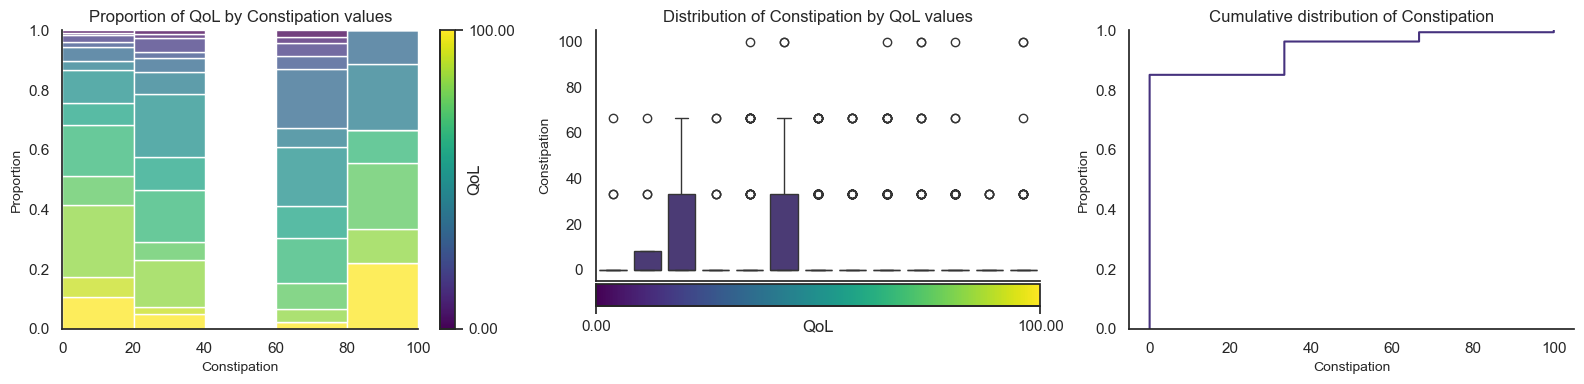



Statistics for Constipation by QoL values:



count  mean   std  min  25%  50%   75%    max  Outliers Count  \
QoL                                                                     
0.00    15.00  8.89 19.79 0.00 0.00 0.00  0.00  66.67               3   
8.33    12.00 11.11 21.71 0.00 0.00 0.00  8.33  66.67               3   
16.67   36.00 11.11 19.52 0.00 0.00 0.00 33.33  66.67               0   
25.00   27.00  8.64 19.81 0.00 0.00 0.00  0.00  66.67               5   
33.33   77.00 12.55 24.80 0.00 0.00 0.00  0.00 100.00              18   
41.67   57.00 14.04 25.16 0.00 0.00 0.00 33.33 100.00               2   
50.00  180.00  9.81 18.54 0.00 0.00 0.00  0.00  66.67              44   
58.33  116.00  8.05 17.37 0.00 0.00 0.00  0.00  66.67              23   
66.67  252.00  6.08 15.97 0.00 0.00 0.00  0.00 100.00              37   
75.00  142.00  5.63 17.74 0.00 0.00 0.00  0.00 100.00              16   
83.33  329.00  3.34 11.60 0.00 0.00 0.00  0.00 100.00              29   
91.67   91.00  1.47  6.87 0.00 0.00 0.00  0.00  33.33               4   
100.00 144.00  3.70 14.81 0.00 0.00 0.00  0.00 100.00              11   

                     Outliers  skew  
QoL                                  
0.00           [33.33, 66.67]  2.27  
8.33           [33.33, 66.67]  1.93  
16.67                      []  1.61  
25.00          [33.33, 66.67]  2.25  
33.33   [33.33, 66.67, 100.0]  1.81  
41.67                 [100.0]  1.96  
50.00          [33.33, 66.67]  1.75  
58.33          [33.33, 66.67]  2.11  
66.67   [33.33, 66.67, 100.0]  2.88  
75.00   [33.33, 66.67, 100.0]  3.58  
83.33   [33.33, 66.67, 100.0]  4.13  
91.67                 [33.33]  4.52  
100.00  [33.33, 66.67, 100.0]  4.88

In [23]:
# Visualización de los atributos más destacables de la variable
afn.viz_single_variable(df_C30, 'Constipation')


Vemos que se trata posiblemente del síntoma menos presente, con menos de un 20% de personas que experimentan niveles superiores a 0. En general, los valores son bajos y, contrariamente a las variables sintomáticas, hay una proporción superior de calidad de vida alto en el máximo que en el mínimo. Esto puede deberse a la escasez de observaciones con valores superiores a 0. La distribución confirma que apenas en 2 valores de QoL (16,67 y 41,67) se pueden alcanzar valores de 33,33 en el tercer cuartil mientras en el resto es 0. Podemos decir que se trata de un síntoma residual, con una incidencia en la calidad de vida menor pero algo más compleja que el resto.

### Diarrhea
*Diarrea: evalúa la frecuencia y severidad de la diarrea. Se calcula mediante la pregunta 17*

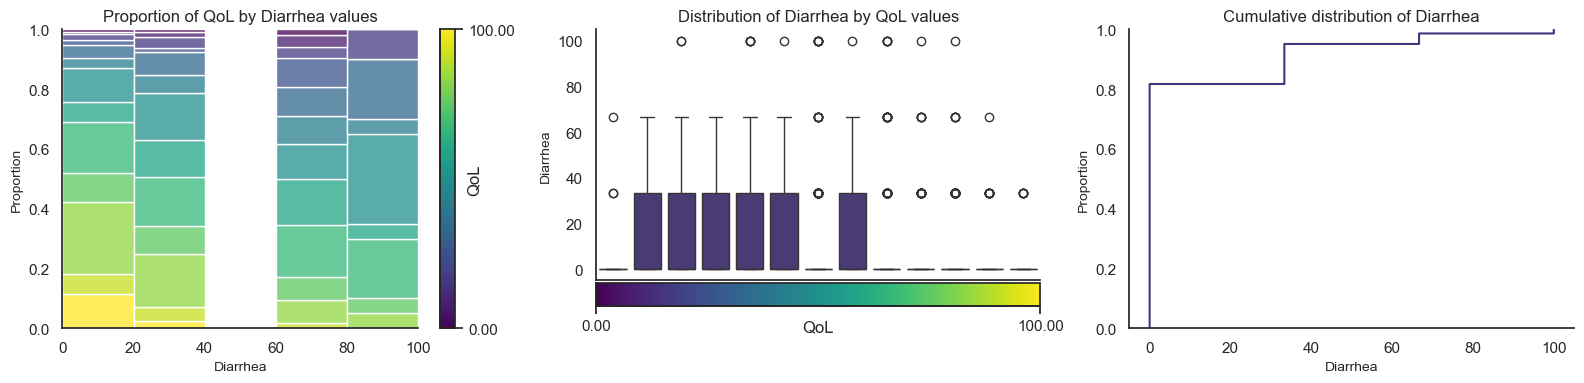



Statistics for Diarrhea by QoL values:



count  mean   std  min  25%  50%   75%    max  Outliers Count  \
QoL                                                                     
0.00    15.00  8.89 19.79 0.00 0.00 0.00  0.00  66.67               3   
8.33    12.00 19.44 26.43 0.00 0.00 0.00 33.33  66.67               0   
16.67   36.00 15.74 28.16 0.00 0.00 0.00 33.33 100.00               2   
25.00   27.00 16.05 26.75 0.00 0.00 0.00 33.33  66.67               0   
33.33   77.00 16.02 27.89 0.00 0.00 0.00 33.33 100.00               4   
41.67   57.00 14.62 24.41 0.00 0.00 0.00 33.33 100.00               1   
50.00  180.00 11.30 23.42 0.00 0.00 0.00  0.00 100.00              43   
58.33  116.00 12.64 21.83 0.00 0.00 0.00 33.33 100.00               1   
66.67  252.00  8.20 19.82 0.00 0.00 0.00  0.00 100.00              45   
75.00  142.00  7.04 17.23 0.00 0.00 0.00  0.00 100.00              24   
83.33  329.00  4.66 13.47 0.00 0.00 0.00  0.00 100.00              40   
91.67   91.00  4.03 12.00 0.00 0.00 0.00  0.00  66.67              10   
100.00 144.00  1.16  6.12 0.00 0.00 0.00  0.00  33.33               5   

                     Outliers  skew  
QoL                                  
0.00           [33.33, 66.67]  2.27  
8.33                       []  0.99  
16.67                 [100.0]  1.90  
25.00                      []  1.27  
33.33                 [100.0]  1.79  
41.67                 [100.0]  1.63  
50.00   [33.33, 66.67, 100.0]  2.35  
58.33                 [100.0]  1.69  
66.67   [33.33, 66.67, 100.0]  2.73  
75.00   [33.33, 66.67, 100.0]  2.75  
83.33   [33.33, 66.67, 100.0]  3.28  
91.67          [33.33, 66.67]  3.07  
100.00                [33.33]  5.14

In [24]:
# Visualización de los atributos más destacables de la variable
afn.viz_single_variable(df_C30, 'Diarrhea')


Como lo demuestra la distribución acumulada, con poco menos del 20% de las personas experimentando valores superiores a 0, este síntoma también tiene muy poca presencia. El comportamiento es similar al estreñimiento aunque con un poco más de valores medio altos y, sobretodo, una ausencia de nivel de calidad de vida alto en el valor máximo. Es decir, un nivel bajo de diarrea no es condición necesaria para un nivel alto de QoL, pero la ausencia de valores altos si lo es para alcanzar niveles de calidad de vida medios y altos.

### Financial Difficulties
*Dificultades financieras: refleja el impacto económico de la enfermedad y el tratamiento. Se deriva de la pregunta 28.*

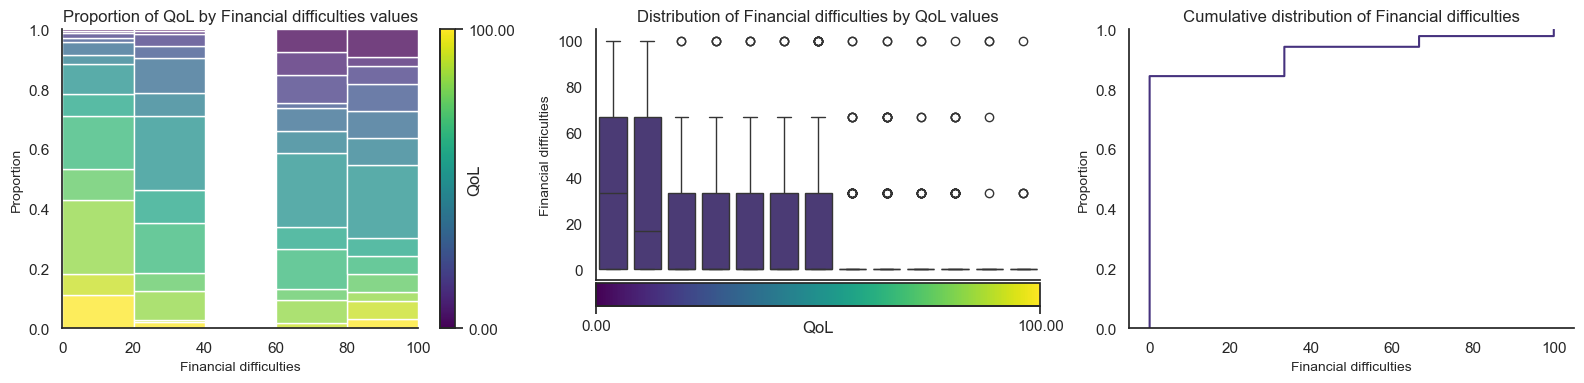



Statistics for Financial difficulties by QoL values:



count  mean   std  min  25%   50%   75%    max  Outliers Count  \
QoL                                                                      
0.00    15.00 40.00 42.16 0.00 0.00 33.33 66.67 100.00               0   
8.33    12.00 33.33 37.61 0.00 0.00 16.67 66.67 100.00               0   
16.67   36.00 20.37 31.15 0.00 0.00  0.00 33.33 100.00               2   
25.00   27.00 20.99 33.52 0.00 0.00  0.00 33.33 100.00               3   
33.33   77.00 14.72 25.65 0.00 0.00  0.00 33.33 100.00               3   
41.67   57.00 16.37 28.26 0.00 0.00  0.00 33.33 100.00               3   
50.00  180.00 15.93 27.17 0.00 0.00  0.00 33.33 100.00               8   
58.33  116.00  8.62 20.20 0.00 0.00  0.00  0.00 100.00              22   
66.67  252.00  5.82 16.61 0.00 0.00  0.00  0.00 100.00              33   
75.00  142.00  4.46 15.99 0.00 0.00  0.00  0.00 100.00              13   
83.33  329.00  2.53 11.21 0.00 0.00  0.00  0.00 100.00              19   
91.67   91.00  3.30 16.52 0.00 0.00  0.00  0.00 100.00               4   
100.00 144.00  1.39  9.55 0.00 0.00  0.00  0.00 100.00               4   

                     Outliers  skew  
QoL                                  
0.00                       []  0.30  
8.33                       []  0.46  
16.67                 [100.0]  1.33  
25.00                 [100.0]  1.58  
33.33                 [100.0]  1.89  
41.67                 [100.0]  1.76  
50.00                 [100.0]  1.73  
58.33   [33.33, 66.67, 100.0]  2.67  
66.67   [33.33, 66.67, 100.0]  3.25  
75.00   [33.33, 66.67, 100.0]  4.27  
83.33   [33.33, 66.67, 100.0]  5.19  
91.67   [33.33, 66.67, 100.0]  5.26  
100.00         [33.33, 100.0]  8.59

In [25]:
# Visualización de los atributos más destacables de la variable
afn.viz_single_variable(df_C30, 'Financial difficulties')


Esta variable es la única que responde a un factor ajeno al tratamiento, es decir que no representa ningún síntoma o alteración del comportamiento que puedan experimentar las personas. Las dificultades financieras reflejan una relación negativa con el QoL, en cuanto los valores más altos de calidad de vida tienen una media por debajo de 5 para la variable. Se observa que niveles altos de problemas económicos hacen descender el QoL de forma prácticamente lineal y que la proporción de niveles medio-altos de calidad de vida disminuyen drásticamente a partir de valores bajos de la variable. Posiblemente indicando una sensibilidad muy alta en las personas en este aspecto. La proporción de personas que ha experimentado algún nivel de dificultad es inferior al 20% y la mayor tolerancia parece estar en los niveles medios y bajos con valores menores para la mitad superior de QoL. Es de destacar que la mayor cantidad de outliers se encuentra en la zona media-alta de QoL, pero desciende en el resto. Esto podría indicar un subgrupo de personas que toleran mayores dificultades, sin embargo no alcanzan los niveles máximos de calidad de vida. 

### Análisis Multivariable

A continuación se analiza la correlación entre las distintas variables del conjunto

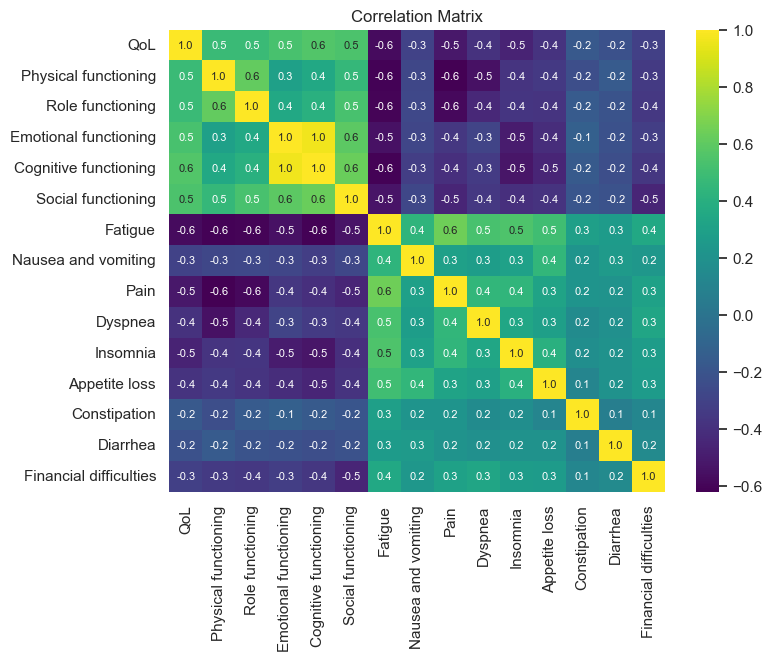

In [26]:
# Visualización de la matriz de correlaciones
corr_matrix = df_C30.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".1f", annot_kws={'fontsize':8})
plt.title("Correlation Matrix")
plt.xlabel('')
plt.ylabel('')
plt.show()

La matriz de correlaciones muestra claramente los dos tipos de relaciones que hemos encontrado en el análisis uni-variable. Por un lado, los predictores con una relación directa, que podemos denominar positivos. Por otro, los predictores con una relación inversa que podemos denominar negativos. Es decir, a valores altos, los primeros inciden positivamente sobre la percepción de la calidad de vida, mientras los segundos lo hacen negativamente. 

Se puede ver también que dentro de estos conjuntos diametralmente opuestos también existen fuertes correlaciones. En el caso de los aspectos cognitivos y emocionales, ambos predictores proporcionan prácticamente la misma información; mientras el dolor y la fatiga tienen una fuerte correlación opuesta con todas las variables que hemos nombrado como positivas. Además. identificamos un subgrupo dentro de los síntomas formado por dolor, disnea, insomnio y pérdida de apetito que tienen una correlación alta con fatiga y que podría representar una relación directamente proporcional. 


Vamos a separar el conjunto en dos grupos de acuerdo con los tipos de variable que hemos encontrado. Para ello, utilizamos la función auxiliar viz_single_vs_all para mostrar una grilla con un gráfico de línea que nos permitirá visualizar las relaciones internas de cada grupo y con la variable objetivo.

In [27]:
# separamos el dominio en los dos tipos de variables que hemos categorizado por su relación con QoL
df_C30_pos = df_C30[['QoL', 'Physical functioning', 'Role functioning', 'Emotional functioning', 'Cognitive functioning', 'Social functioning']]
df_C30_neg = df_C30[['QoL', 'Fatigue', 'Pain', 'Nausea and vomiting', 'Constipation', 'Dyspnea', 'Insomnia', 'Appetite loss', 'Diarrhea', 'Financial difficulties']]


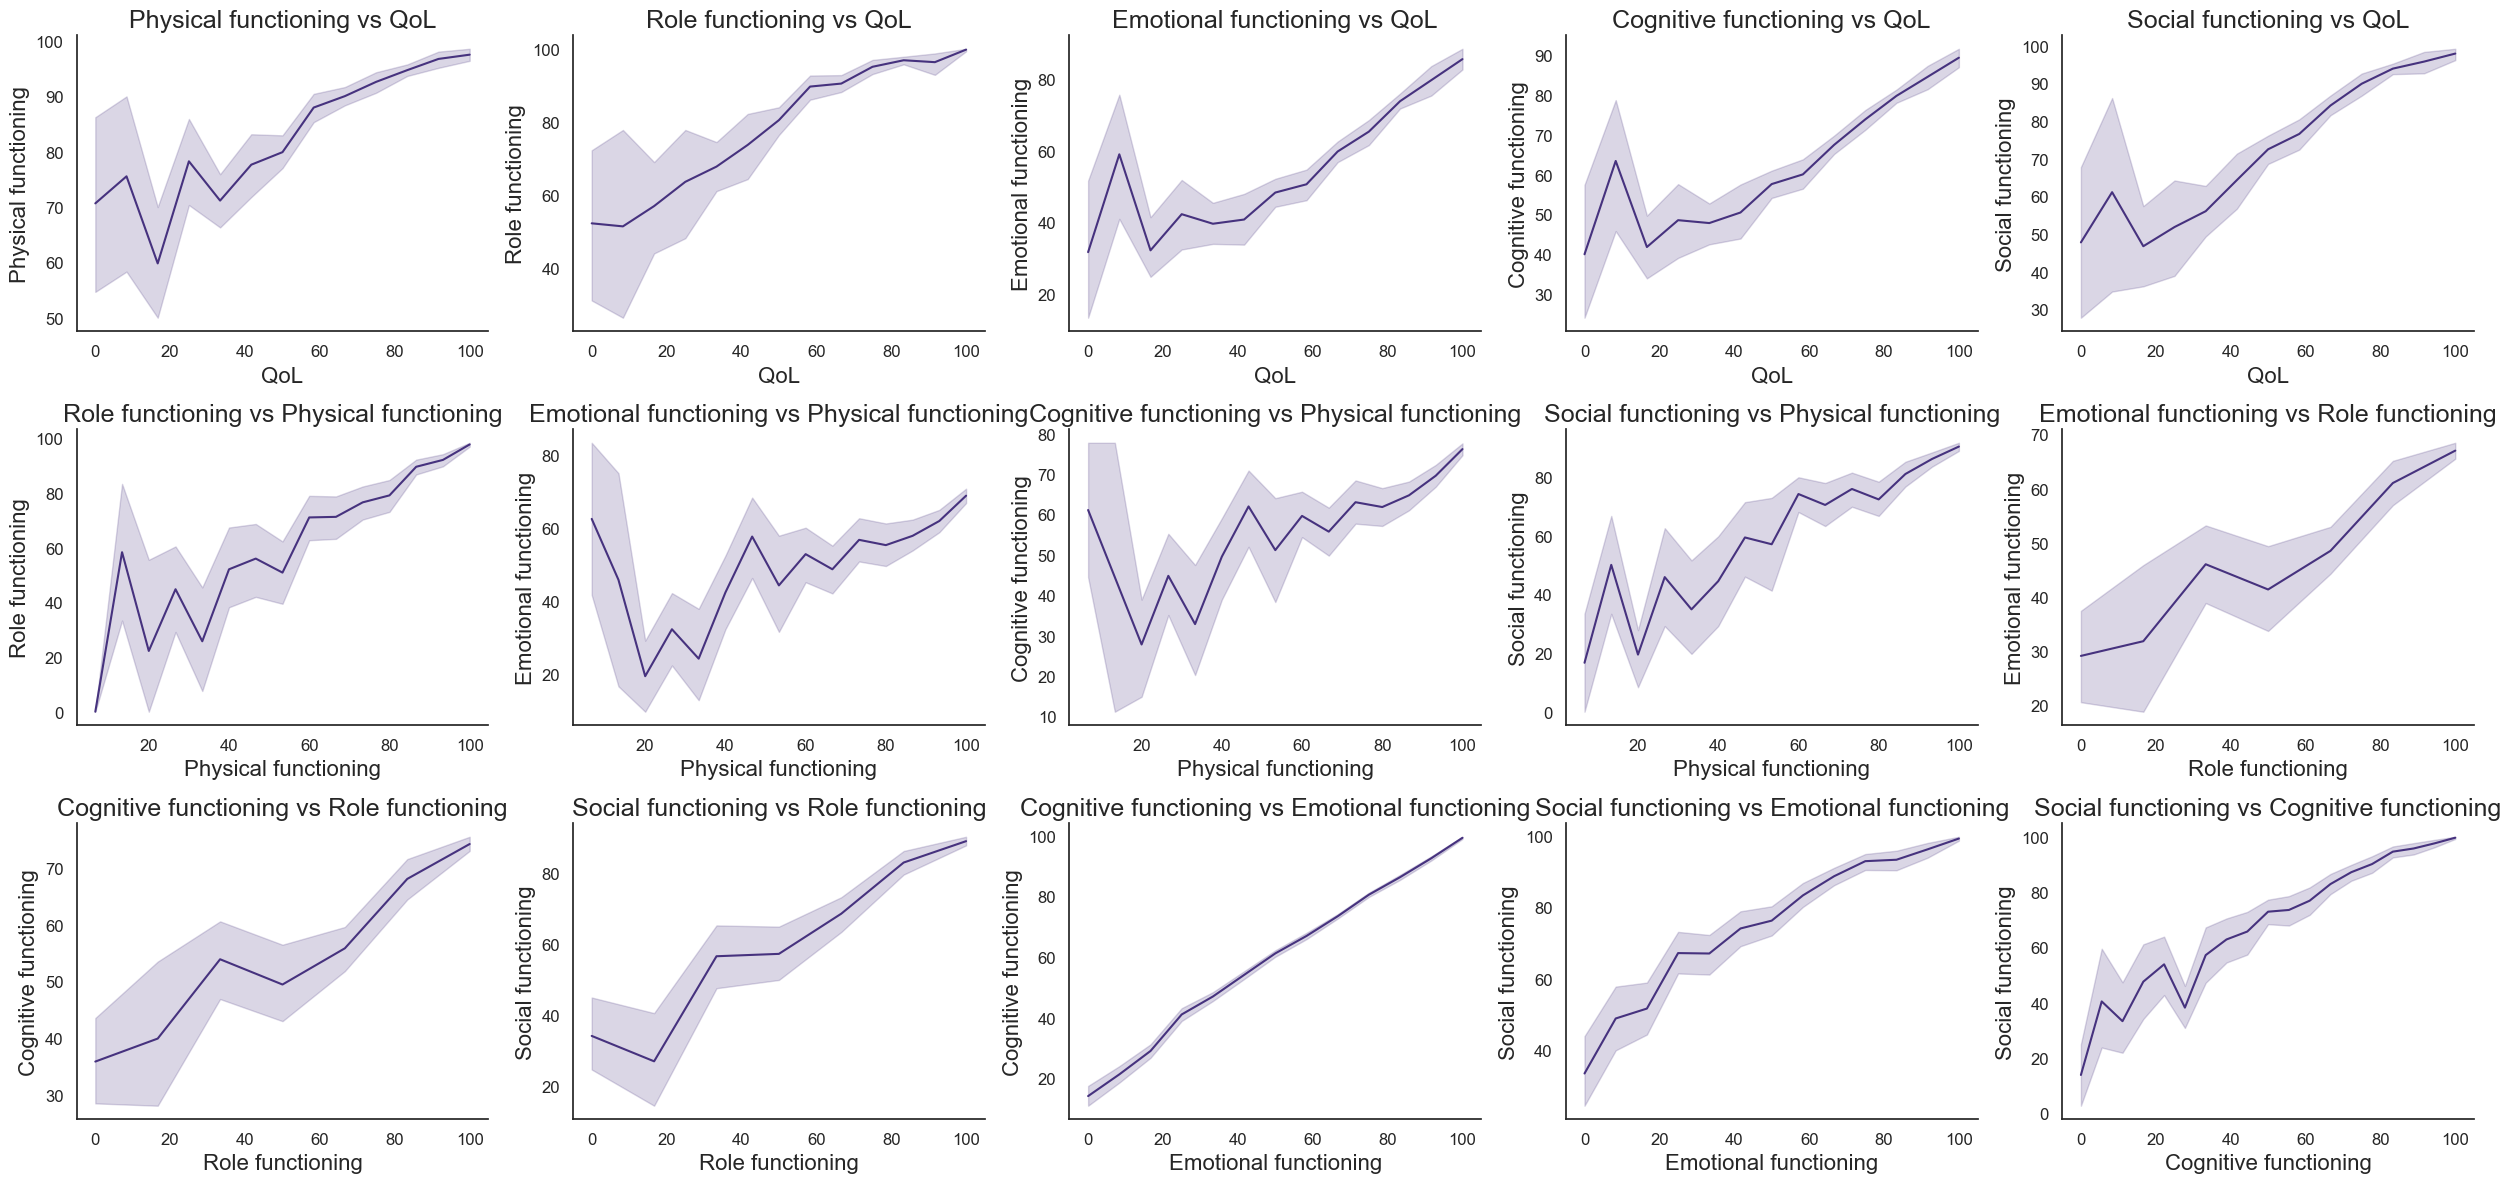

In [28]:
# Visualizamos el grupo de variables relativas al funcionamiento
afn.viz_single_vs_all(df_C30_pos, n_cols=5)

Todas las variables presentan una relación directa entre ellas, especialmente lineal entre funcionamiento cognitivo y emocional, como era de esperar por la alta correlación entre ambas variables. Se puede ver una mayor anchura de la banda de desconfianza en los valores bajos debido a las dispersiones mayores. En líneas generales, este conjunto presenta una monotonía creciente que evidencia la incidencia positiva sobre la calidad de vida.

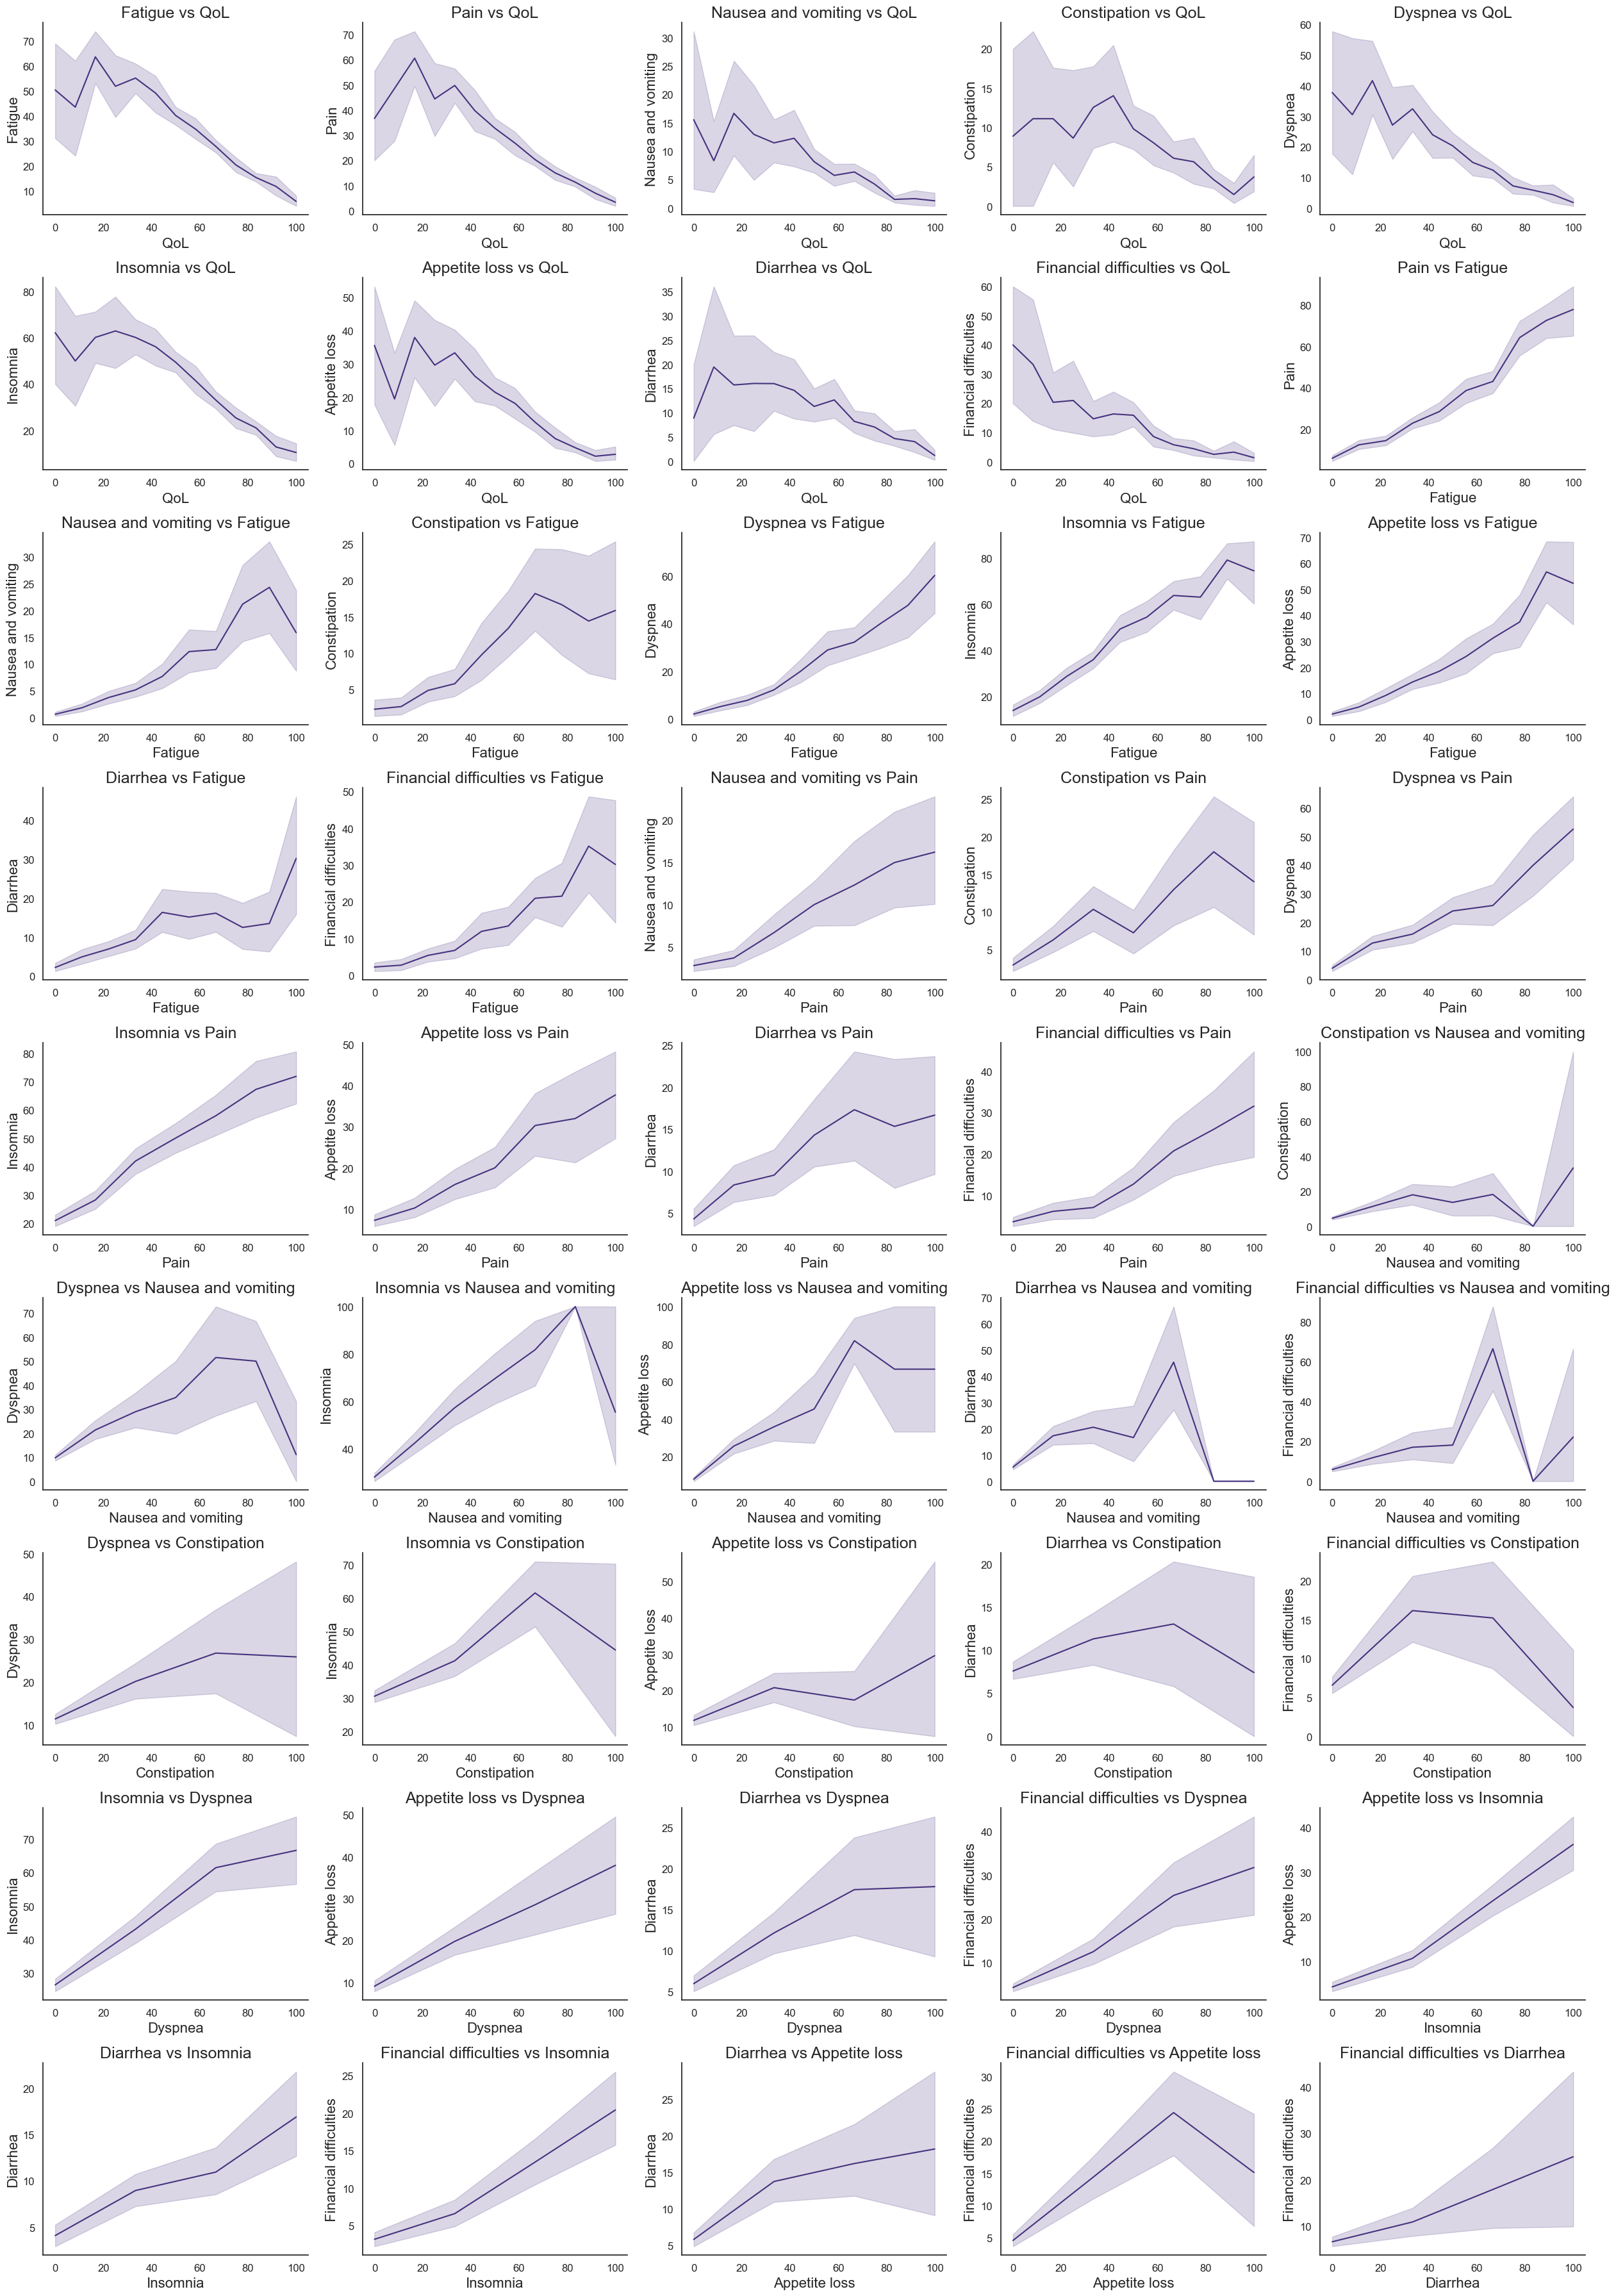

In [29]:
# Hacemos lo propio para las variables sintomáticas
afn.viz_single_vs_all(df_C30_neg, n_cols=5)

En este grupo vemos una fuerte correspondencia negativa con QoL, menos marcada en Nausea and vomiting, Constipation y Diarrhea como era de esperar. Además, Fatigue, Diarrhea, Insomnia, Pain y Dyspnea tienen relaciones prácticamente lineales entre ellas, esto puede sugerir una posible comorbidad de síntomas. Nausea and Vomiting y Constipation parecen ser más constantes e incluso cuadráticas en algunos casos. Mientras que Financial difficulties es lineal prácticamente con todo el resto. Se aprecia también una disminución notable en variables como Fatigue o Pain conforme QoL crece, lo que concuerda con la idea que mejor calidad de vida se asocia a menores síntomas. 

### Conclusiones

El dominio analizado cuenta con 1727 observaciones de las cuales 1428 están bien informadas y 249 se han revelado inútiles por contener valores nulos en todos los atributos. Las distribuciones de todas las variables presentan cola a derecha o a izquierda. Esta variación depende fuertemente de la relación con la percepción de las personas de su nivel de calidad de vida, como se explica a continuación.

El análisis evidencia fundamentalmente la existencia de dos tipos de variables. Por un lado, los predictores con una relación directa a la variable objetivo, que podemos denominar positivos y cuya distribución presenta cola a la izquierda. Estas variables inciden positivamente para conseguir niveles de calidad de vida altos. Es el caso de: Physical functioning, Role functioning, Emotional functioning, Cognitive functioning y Social functioning. Se trata de las variables que se refieren al funcionamiento o comportamiento de las personas en la vida cotidiana en diversos aspectos. Por otro lado, se tienen los predictores con una relación inversa que podemos denominar negativos y cuya distribución presenta cola a la derecha. Son los índices que inciden negativamente en la percepción de la calidad de vida: Fatigue, Pain, Nausea and vomiting, Constipation, Dyspnea, Insomnia, Appetite loss, Diarrhea y Financial difficulties. Se trata de las variables referentes a la sintomatología adversa que puede desencadenar el tratamiento agresivo al que son sometidas las personas, a excepción de Financial difficulties que no se encuentra relacionada con la enfermedad. 

Como cabe esperar, estos dos tipos de variables tienen relaciones semejantes dentro del mismo tipo y opuestas con el otro tipo. En este aspecto, vemos que el funcionamiento cognitivo y emocional aportan prácticamente la misma información por estar altamente correlacionadas positivamente. Mientras tanto, fatiga y dolor se encuentran altamente correlacionadas negativamente con todas las variables positivas, posiblemente demostrando que son el mayor impedimento que encuentran las personas para poder desempeñar su vida cotidiana de forma normal.

En todos los casos, valores altos de una variable positiva o bajos de una negativa, no es condición suficiente para obtener una calidad de vida elevada, como se ha reflejado con la presencia de valores altos de las  positivas y, al contrario, con valores bajos de las negativas en los niveles mas bajos de calidad de vida. Sin embargo, todas ellas presentan una mayor o menor tolerancia por parte de las personas para percibir un nivel de calidad de vida alto. Para el caso de los síntomas de diarrea, disnea y dolor esta tolerancia disminuye con respecto al resto. Mientras que el funcionamiento físico, de rol y social son los más valorados para tener una calidad de vida máxima.

Finalmente, del análisis se desprende que la preparación de los datos deberá consistir en categorizar la variable objetivo QoL para reducir las clases en 0: baja, 1: media y 2: alta. También será necesaria la eliminación de las filas con valores nulos ya que no aportan información alguna. En cuanto a escalado, normalización y transformación no será necesario realizar ninguna acción dado que los algoritmos que se aplicarán en la clasificación no lo requieren.

### 1.2 Dominio EORTC QLQ-C23

Separación del dominio en el conjunto df_C23 y asignación de nombres semánticos a las variables.

In [30]:
# Creación del dataframe C30
columns_C23 = ['id', 'ql', 'brst', 'brbi', 'brbs', 'brfu', 'brsee', 'brsef', 'bras', 'brhl']
df_C23 = df[columns_C23]
# Asignación de nombres semánticos a las columnas
df_C23 = df_C23.rename(columns= {
    'ql': 'QoL',
    'brst': 'Arm symptoms',
    'brbi': 'Body image',
    'brbs': 'Breast symptoms',
    'brfu': 'Future perspective',
    'brsee': 'Sexual enjoyment',
    'brsef': 'Sexual functioning',
    'bras': 'Systemic therapy side effects',
    'brhl': 'Upset by hair loss',
})

Comenzamos realizando una exploración global de la información estadística de las variables:

In [31]:
# Inspección de las columnas del dominio
afn.inspect_all_columns(df_C23.drop(['id', 'QoL'], axis=1))

dtype  null_count  \
column_name                                          
Arm symptoms                   float64         253   
Body image                     float64         253   
Breast symptoms                float64         253   
Future perspective             float64         253   
Sexual enjoyment               float64         817   
Sexual functioning             float64         253   
Systemic therapy side effects  float64         253   
Upset by hair loss             float64        1214   

                                                                   unique_values  \
column_name                                                                        
Arm symptoms                   [0.0, 4.76, 9.52, 14.29, 19.05, 23.81, 28.57, ...   
Body image                     [0.0, 8.33, 16.67, 25.0, 33.33, 41.67, 50.0, 5...   
Breast symptoms                [0.0, 8.33, 16.67, 25.0, 33.33, 41.67, 50.0, 5...   
Future perspective                                    [0.0, 33.33, 66.67, 100.0]   
Sexual enjoyment                                      [0.0, 33.33, 66.67, 100.0]   
Sexual functioning                [0.0, 16.67, 33.33, 50.0, 66.67, 83.33, 100.0]   
Systemic therapy side effects  [0.0, 11.11, 22.22, 33.33, 44.44, 55.56, 66.67...   
Upset by hair loss                                    [0.0, 33.33, 66.67, 100.0]   

                               total_unique_values  skew   count  mean   std  \
column_name                                                                    
Arm symptoms                                    19  1.32 1474.00 16.32 15.48   
Body image                                      13 -1.94 1474.00 85.27 21.61   
Breast symptoms                                 13  1.52 1474.00 17.24 20.78   
Future perspective                               4  0.09 1474.00 45.23 34.90   
Sexual enjoyment                                 4 -0.51  910.00 73.44 26.10   
Sexual functioning                               7  0.34 1474.00 36.17 29.71   
Systemic therapy side effects                   10  1.83 1474.00 12.45 19.23   
Upset by hair loss                               4  0.71  513.00 34.44 33.48   

                               min   25%   50%    75%    max  
column_name                                                   
Arm symptoms                  0.00  4.76 14.29  23.81  85.71  
Body image                    0.00 77.08 91.67 100.00 100.00  
Breast symptoms               0.00  0.00  8.33  25.00 100.00  
Future perspective            0.00  0.00 33.33  66.67 100.00  
Sexual enjoyment              0.00 66.67 66.67 100.00 100.00  
Sexual functioning            0.00  0.00 33.33  66.67 100.00  
Systemic therapy side effects 0.00  0.00  0.00  22.22 100.00  
Upset by hair loss            0.00  0.00 33.33  66.67 100.00

Encontramos que de las 1727 observaciones 253 tienen valores ausentes en todas las variables con dos excepciones: Sexual enjoyment que tiene 817 valores nulos y Upset by hair loss que tiene 1214. Los 8 predictores tienen un tipo decimal (float). La cantidad de valores únicos indica que se trata de series numéricas con intervalos definidos, como en el dominio C30 y también se encuentran dentro de una escala de 0 a 100. Al igual que en el caso anterior, las magnitudes tienen orden y sentido de comparación, donde 0 representa **nada** y 100 **mucho**.

Los valores de asimetría son menos pronunciados que en el dominio C30, con Body Image y Systemic therapy side effect como las más desplazadas hacia los valores extremos: la primera tiene un valor muy alto (77,08) en el primer cuartil, mientras la segunda tiene un valor muy bajo en el tercer cuartil (22,22). 

Con respecto a los valores nulos, se puede ver que hay un grupo de variables con 253 filas sin informar que puede tratarse de las mismas como en el dominio C30. Además, Sexual enjoyment y Upset by hair loss con 817 y 1214 valores faltantes respectivamente las analizaremos más profundamente.

Mediante la función auxiliar rows_same_null comprobamos si los 253 nulos corresponden a las mismas observaciones para todas las variables:

In [32]:
# Inspección de las variables con las mismas observaciones nulas
afn.rows_same_nulls(df_C23)


Total rows with missing values:  253
Variables with identical missing rows:  6
Arm symptoms
Body image
Breast symptoms
Future perspective
Sexual functioning
Systemic therapy side effects


Efectivamente, podemos comprobar que todas las variables con 253 valores nulos comparten las mismas filas. En el caso de Upset by hair loss y Systemic therapy side effects está claro que tienen valores faltantes en más observaciones y por eso no aparecen en la salida anterior. Inspeccionamos visualmente las filas:

In [33]:
# Inspección de las filas con valores nulos
df_C23[df_C23['QoL'].isnull()].head()

id  QoL  Arm symptoms  Body image  Breast symptoms  Future perspective  \
0    1  NaN           NaN         NaN              NaN                 NaN   
12  13  NaN           NaN         NaN              NaN                 NaN   
20  21  NaN           NaN         NaN              NaN                 NaN   
30  31  NaN           NaN         NaN              NaN                 NaN   
34  35  NaN           NaN         NaN              NaN                 NaN   

    Sexual enjoyment  Sexual functioning  Systemic therapy side effects  \
0                NaN                 NaN                            NaN   
12               NaN                 NaN                            NaN   
20               NaN                 NaN                            NaN   
30               NaN                 NaN                            NaN   
34               NaN                 NaN                            NaN   

    Upset by hair loss  
0                  NaN  
12                 NaN  
20                 NaN  
30                 NaN  
34                 NaN

Al igual que en el caso del conjunto C30, las filas contienen valores nulos en todas las variables y carecen de utilidad.


In [34]:
# Una vez identificadas las filas con valores nulos podemos descartar el identificador
df_C23.drop('id', axis=1, inplace=True)

A continuación, comprobamos visualmente la distribución de las variables del dominio para corroborar la información de los estadísticos:

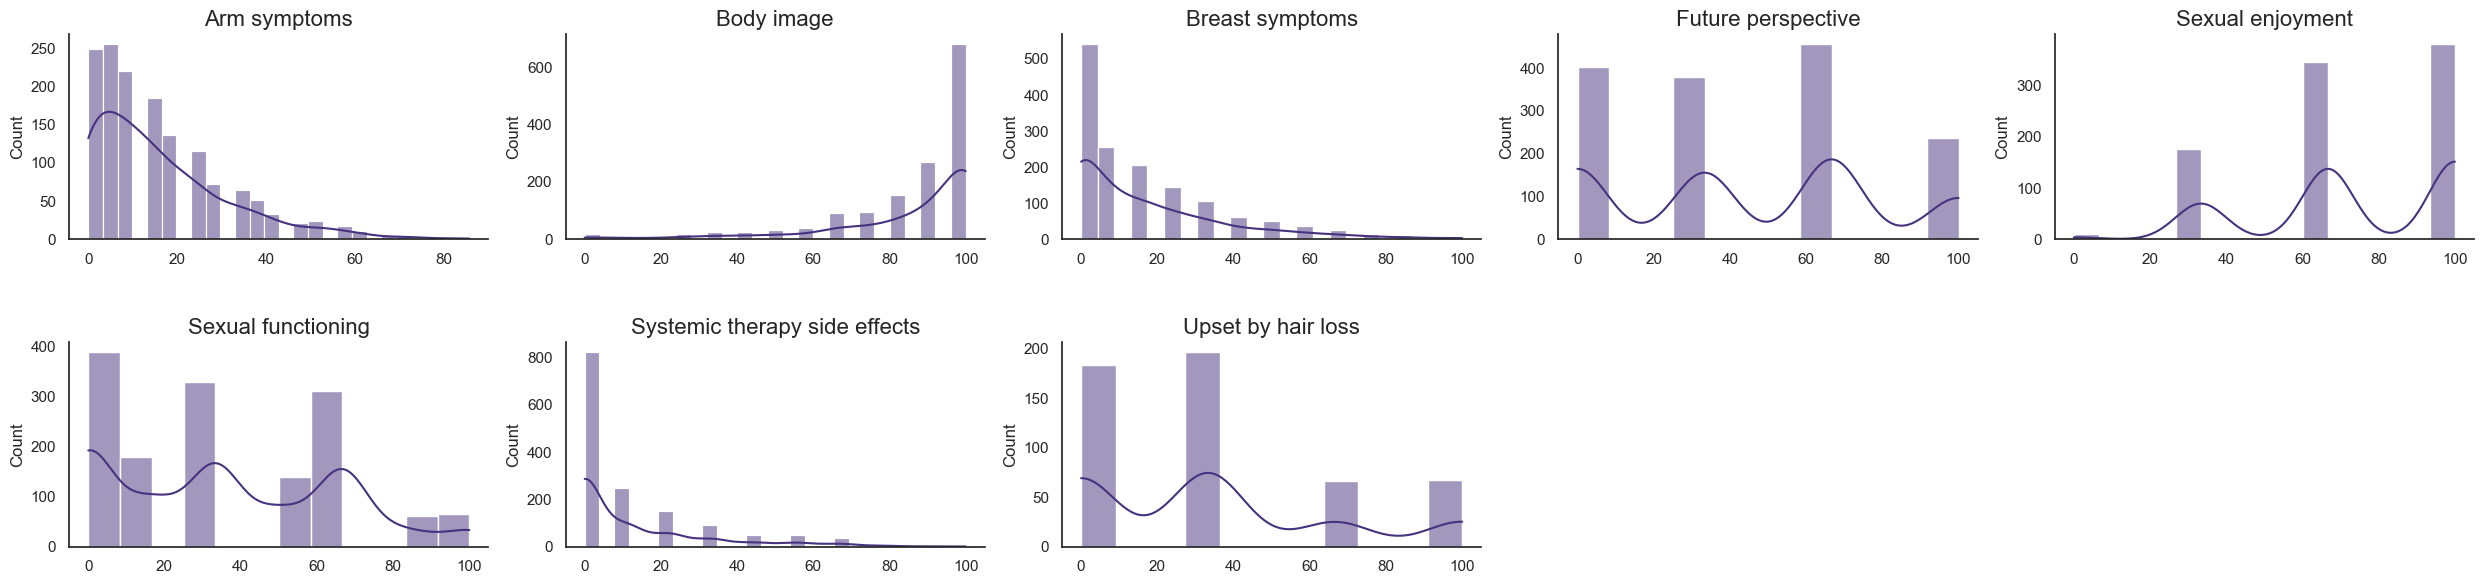

In [35]:
# Distribución de las variables del dominio
afn.viz_columns_distribution(df_C23.drop('QoL', axis=1))

Todas las variables tienen distribuciones con cola a derecha o a izquierda, exceptuando Future perspective y menos marcada en Upset by hair loss. La mayor densidad en los valores altos se encuentran en Body image y Sexual enjoyment, mientras el resto tiene una mayor densidad en los valores bajos. Vamos a graficar la dispersión para visualizar los estadísticos vistos anteriormente:

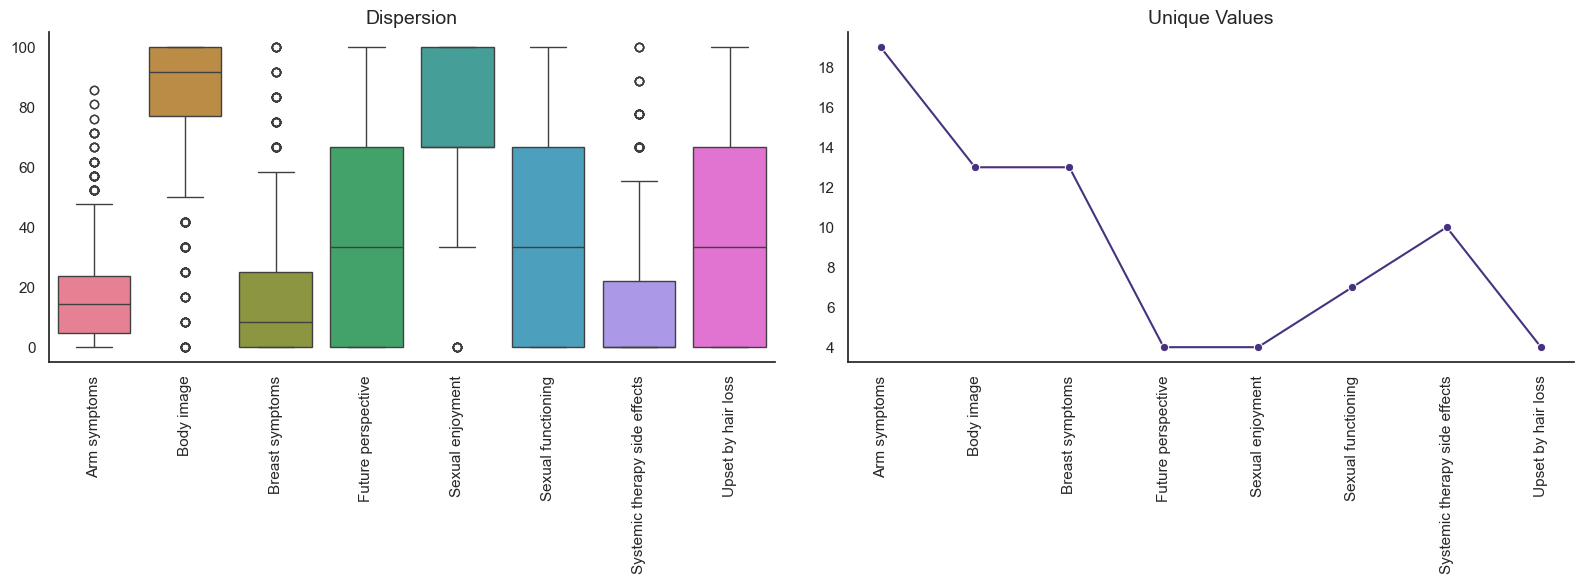

In [36]:
# Visualización comparativa de la dispersión y la cantidad de valores nulos 
afn.viz_dispersion(df_C23.drop('QoL', axis=1))

Comprobamos que las variables están desplazadas hacia los valores bajos, con algunas como Arm symptom que no alcanzan los valores máximos de la escala, a pesar de tener la mayor cantidad de valores únicos. Por el contrario, Future perspective, Sexual enjoyment y Upset by hair loss aparecen como las más dispersas.

### Arm Symptoms
*Síntomas en el brazo: evalúa molestias y problemas en el brazo (por ejemplo, debida a la cirugía o tratamiento). Se obtiene de las preguntas 44 a 47, que exploran dolor, hinchazón o limitaciones en el movimiento*

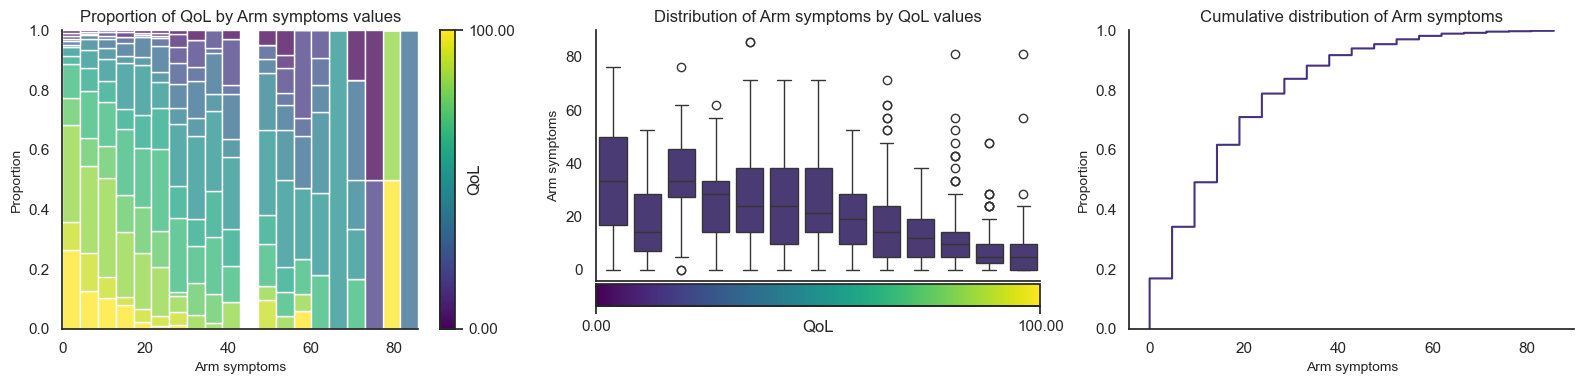



Statistics for Arm symptoms by QoL values:



count  mean   std  min   25%   50%   75%   max  Outliers Count  \
QoL                                                                      
0.00    15.00 33.33 23.95 0.00 16.67 33.33 50.00 76.19               0   
8.33    12.00 17.86 15.48 0.00  7.14 14.29 28.57 52.38               0   
16.67   36.00 34.79 18.97 0.00 27.38 33.33 45.24 76.19               3   
25.00   27.00 26.46 16.41 0.00 14.29 28.57 33.33 61.90               1   
33.33   77.00 28.88 18.66 0.00 14.29 23.81 38.10 85.71               2   
41.67   57.00 25.56 19.19 0.00  9.52 23.81 38.10 71.43               0   
50.00  180.00 25.69 16.79 0.00 14.29 21.43 38.10 71.43               0   
58.33  116.00 18.88 13.08 0.00  9.52 19.05 28.57 52.38               0   
66.67  250.00 16.99 13.44 0.00  4.76 14.29 23.81 71.43               7   
75.00  142.00 13.08 10.15 0.00  4.76 11.90 19.05 38.10               0   
83.33  328.00  9.71 10.21 0.00  4.76  9.52 14.29 80.95              11   
91.67   91.00  8.37  9.53 0.00  2.38  4.76  9.52 47.62               9   
100.00 143.00  5.83  9.68 0.00  0.00  4.76  9.52 80.95               3   

                                                Outliers  skew  
QoL                                                             
0.00                                                  []  0.26  
8.33                                                  []  0.80  
16.67                                       [0.0, 76.19] -0.14  
25.00                                             [61.9]  0.40  
33.33                                            [85.71]  0.99  
41.67                                                 []  0.56  
50.00                                                 []  0.64  
58.33                                                 []  0.57  
66.67                        [52.38, 57.14, 61.9, 71.43]  1.10  
75.00                                                 []  0.66  
83.33   [33.33, 38.1, 42.86, 47.62, 52.38, 57.14, 80.95]  2.29  
91.67                              [23.81, 28.57, 47.62]  2.01  
100.00                             [28.57, 57.14, 80.95]  4.57

In [37]:
# Visualización de los atributos más destacables de la variable
afn.viz_single_variable(df_C23, 'Arm symptoms')

Existe una relación inversa entre Arm symptoms y QoL: a medida que aumentan los síntomas en el brazo, la proporción de valores altos de QoL disminuye, indicando que la percepción de la calidad de vida empeora. Además, para los niveles bajos de QoL se observa una dispersión amplia en la variable, incluyendo valores cercanos al máximo, mientras que al aumentar QoL la mediana de Arm symptoms desciende y el rango se estrecha. Es decir, alcanzar valores máximos de QoL suele requerir un nivel de síntomas en el brazo inferior a 20 con algunas excepciones, como demuestra la caída abrupta de la media a partir de 75 en QoL. La distribución acumulada se eleva rápidamente en valores bajos, lo que indica que buena parte de la muestra tiene síntomas relativamente bajos, y luego va ascendiendo más lentamente. En conjunto, puede decirse que las personas tienen cierta tolerancia a niveles moderados, pero rara vez se observan valores máximos de QoL con síntomas de brazo intensos.

### Body Image
*Imagen del cuerpo: mide la percepción y satisfacción con la propia imagen. Se calcula a partir de las preguntas 32 a 35, que exploran cómo se siente la persona respecto a su cuerpo y apariencia.*

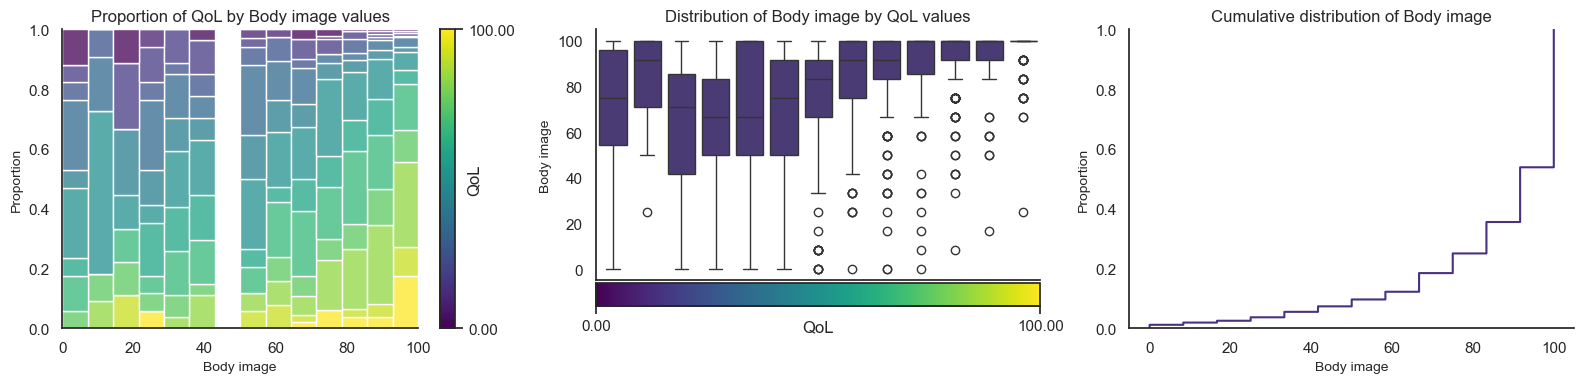



Statistics for Body image by QoL values:



count  mean   std   min    25%    50%    75%    max  Outliers Count  \
QoL                                                                           
0.00    15.00 65.56 35.34  0.00  54.17  75.00  95.83 100.00               0   
8.33    12.00 81.94 24.83 25.00  70.83  91.67 100.00 100.00               1   
16.67   36.00 65.05 28.44  0.00  41.67  70.83  85.42 100.00               0   
25.00   27.00 66.05 27.63  0.00  50.00  66.67  83.33 100.00               0   
33.33   77.00 68.07 30.33  0.00  50.00  66.67 100.00 100.00               0   
41.67   57.00 70.61 26.26  0.00  50.00  75.00  91.67 100.00               0   
50.00  180.00 76.11 25.29  0.00  66.67  83.33  91.67 100.00              12   
58.33  116.00 81.68 21.23  0.00  75.00  91.67 100.00 100.00               8   
66.67  250.00 86.27 18.29  0.00  83.33  91.67 100.00 100.00              22   
75.00  142.00 89.20 18.62  0.00  85.42 100.00 100.00 100.00              10   
83.33  328.00 93.09 12.09  8.33  91.67 100.00 100.00 100.00              32   
91.67   91.00 94.05 14.18 16.67  91.67 100.00 100.00 100.00               8   
100.00 143.00 96.68  9.34 25.00 100.00 100.00 100.00 100.00              25   

                                              Outliers  skew  
QoL                                                           
0.00                                                [] -0.94  
8.33                                            [25.0] -1.41  
16.67                                               [] -0.56  
25.00                                               [] -0.83  
33.33                                               [] -0.70  
41.67                                               [] -0.74  
50.00                         [0.0, 8.33, 16.67, 25.0] -1.42  
58.33                               [0.0, 25.0, 33.33] -1.57  
66.67    [0.0, 16.67, 25.0, 33.33, 41.67, 50.0, 58.33] -1.98  
75.00    [0.0, 8.33, 16.67, 25.0, 33.33, 41.67, 58.33] -2.71  
83.33   [8.33, 33.33, 41.67, 50.0, 58.33, 66.67, 75.0] -2.94  
91.67                      [16.67, 50.0, 58.33, 66.67] -3.20  
100.00               [25.0, 66.67, 75.0, 83.33, 91.67] -4.34

In [38]:
# Visualización de los atributos más destacables de la variable
afn.viz_single_variable(df_C23, 'Body image')

Se aprecia una relación directa: conforme aumenta la imagen corporal, también crece la proporción de personas con índices altos de calidad de vida. En los niveles elevados de QoL, la variable se concentra cerca de 100 con poca dispersión, mientras que en los niveles bajos hay más variabilidad, aunque puntualmente pueden darse valores altos. La tabla confirma esta tendencia: la media del predictor pasa de 65.56 en el mínimo QoL a 96.68 en el máximo, y la mediana llega a 100 a partir de QoL igual o superior a 75. Esto sugiere que, aunque existen casos aislados de buena imagen corporal con QoL bajo, la mayoría de quienes reportan alta calidad de vida también percibe una buena imagen corporal, relacionando de forma positiva ambas variables. En efecto, vemos que casi el 80% de las personas tiene un valor de imagen corporal superior a 80.

### Breast Symptoms
*Mide los síntomas específicos en la mama, como dolor o inflamación. Se calcula a partir de las preguntas 48 a 51, que indagan sobre estas sensaciones.*

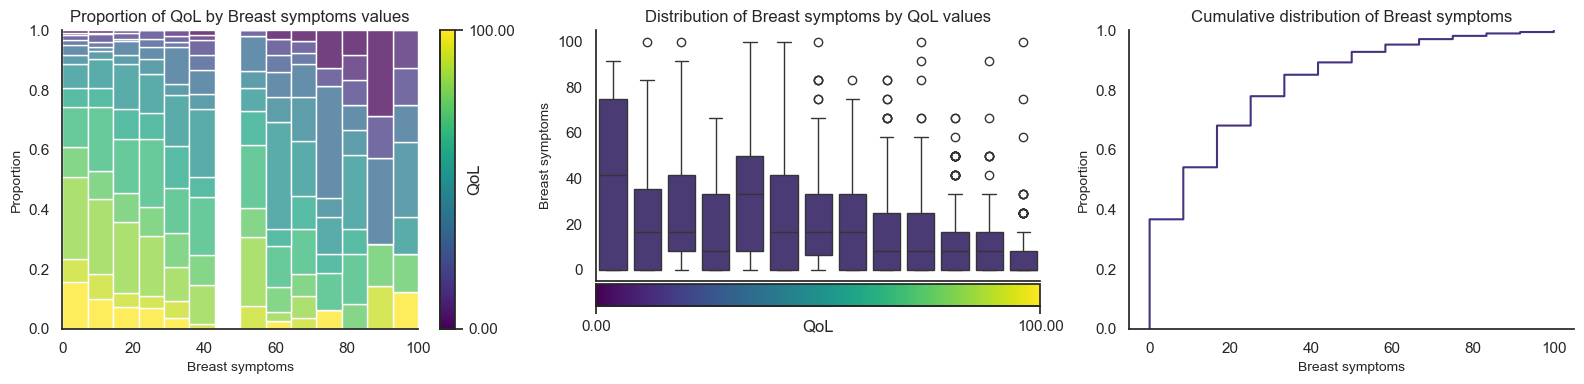



Statistics for Breast symptoms by QoL values:



count  mean   std  min  25%   50%   75%    max  Outliers Count  \
QoL                                                                      
0.00    15.00 40.00 38.47 0.00 0.00 41.67 75.00  91.67               0   
8.33    12.00 27.78 33.40 0.00 0.00 16.67 35.42 100.00               1   
16.67   36.00 27.78 28.52 0.00 8.33 16.67 41.67 100.00               1   
25.00   27.00 19.44 21.06 0.00 0.00  8.33 33.33  66.67               0   
33.33   77.00 32.25 27.12 0.00 8.33 33.33 50.00 100.00               0   
41.67   57.00 27.05 27.56 0.00 0.00 16.67 41.67 100.00               0   
50.00  180.00 23.19 22.20 0.00 6.25 16.67 33.33 100.00               6   
58.33  116.00 19.40 19.28 0.00 0.00 16.67 33.33  83.33               1   
66.67  250.00 17.43 18.45 0.00 0.00  8.33 25.00  83.33               8   
75.00  142.00 16.67 20.15 0.00 0.00  8.33 25.00 100.00               5   
83.33  328.00 11.00 14.21 0.00 0.00  8.33 16.67  66.67              23   
91.67   91.00 12.00 17.04 0.00 0.00  8.33 16.67  91.67               7   
100.00 143.00  7.58 13.91 0.00 0.00  0.00  8.33 100.00              17   

                                 Outliers  skew  
QoL                                              
0.00                                   []  0.12  
8.33                              [100.0]  1.33  
16.67                             [100.0]  1.07  
25.00                                  []  0.81  
33.33                                  []  0.60  
41.67                                  []  0.96  
50.00                [75.0, 83.33, 100.0]  0.98  
58.33                             [83.33]  1.06  
66.67                [66.67, 75.0, 83.33]  1.27  
75.00        [66.67, 83.33, 91.67, 100.0]  1.63  
83.33         [41.67, 50.0, 58.33, 66.67]  1.52  
91.67         [41.67, 50.0, 66.67, 91.67]  2.10  
100.00  [25.0, 33.33, 58.33, 75.0, 100.0]  3.51

In [39]:
# Visualización de los atributos más destacables de la variable
afn.viz_single_variable(df_C23, 'Breast symptoms')

La variable presenta una relación inversa con QoL, como se ha visto en el resto de síntomas. Sin embargo, la tendencia no resulta completamente lineal. En algunos grupos intermedios o incluso en ciertos niveles altos de QoL (por ejemplo, en el grupo con QoL de 33.33 se observa una media de 32.25 y mediana de 33.33) se registra un ligero incremento en los valores de la variable. Esto podría deberse a la presencia de subgrupos o a la influencia de otros factores que modulan la percepción de los síntomas, haciendo que la relación entre la intensidad de los síntomas en la mama y la calidad de vida sea compleja. De hecho, en el valor más alto del predictor se puede ver una proporción cercana al 10% de niveles de calidad de vida máximos, que es superior a la encontrada en niveles medio-atos y equivalente a la de niveles mínimos de QoL. Esto demuestra que las personas que presentan estos síntomas tienen una mayor tolerancia para obtener niveles altos de calidad de vida. Podemos ver que el 60% tiene un nivel superior a 0 y un 3% presenta los valores más altos.

### Future Perspective
*Perspectiva de futuro: mide la visión y optimismo o incertidumbre respecto al futuro. Se calcula a partir de la pregunta 39.*

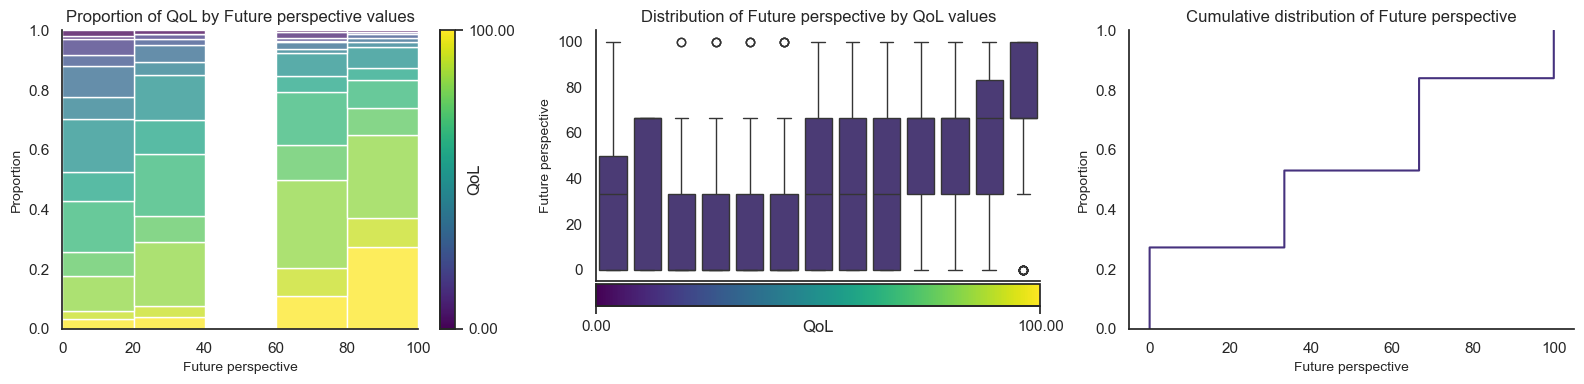



Statistics for Future perspective by QoL values:



count  mean   std  min   25%   50%    75%    max  Outliers Count  \
QoL                                                                        
0.00    15.00 28.89 33.01 0.00  0.00 33.33  50.00 100.00               0   
8.33    12.00 44.44 32.82 0.00  0.00 66.67  66.67  66.67               0   
16.67   36.00 21.30 31.02 0.00  0.00  0.00  33.33 100.00               2   
25.00   27.00 24.69 34.08 0.00  0.00  0.00  33.33 100.00               3   
33.33   77.00 22.08 28.41 0.00  0.00  0.00  33.33 100.00               3   
41.67   57.00 25.15 31.04 0.00  0.00  0.00  33.33 100.00               4   
50.00  180.00 32.59 32.86 0.00  0.00 33.33  66.67 100.00               0   
58.33  116.00 34.48 31.06 0.00  0.00 33.33  66.67 100.00               0   
66.67  250.00 40.93 31.62 0.00  0.00 33.33  66.67 100.00               0   
75.00  142.00 48.36 33.82 0.00 33.33 66.67  66.67 100.00               0   
83.33  328.00 55.49 31.77 0.00 33.33 66.67  66.67 100.00               0   
91.67   91.00 61.90 31.26 0.00 33.33 66.67  83.33 100.00               0   
100.00 143.00 72.26 31.64 0.00 66.67 66.67 100.00 100.00              13   

       Outliers  skew  
QoL                    
0.00         []  0.81  
8.33         [] -0.81  
16.67   [100.0]  1.26  
25.00   [100.0]  1.27  
33.33   [100.0]  1.11  
41.67   [100.0]  1.07  
50.00        []  0.65  
58.33        []  0.52  
66.67        []  0.16  
75.00        [] -0.09  
83.33        [] -0.29  
91.67        [] -0.62  
100.00    [0.0] -0.99

In [40]:
# Visualización de los atributos más destacables de la variable
afn.viz_single_variable(df_C23, 'Future perspective')

La variable mantiene una relación directa con la calidad de vida y se puede interpretar como el nivel de esperanza de las personas en tratamiento. Vemos que existe un crecimiento lineal de los valores medios y que pueden alcanzarse niveles de calidad de vida con valores bajos de la variable. Este hecho refleja que la falta de perspectivas de futuro no es un factor excluyente para alcanzar niveles de calidad de vida medio o incluso altos. 

### Sexual Enjoyment
*Disfrute sexual: refleja el nivel de satisfacción y placer en la actividad sexual. Se refiere a la pregunta 38.*

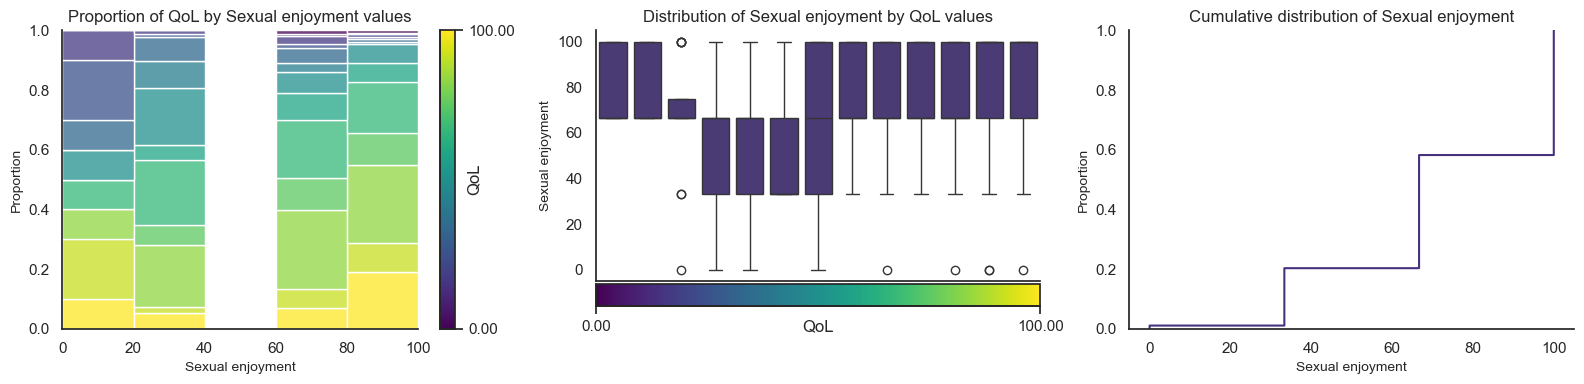



Statistics for Sexual enjoyment by QoL values:



count  mean   std   min   25%    50%    75%    max  Outliers Count  \
QoL                                                                          
0.00     7.00 80.95 17.82 66.67 66.67  66.67 100.00 100.00               0   
8.33     5.00 80.00 18.26 66.67 66.67  66.67 100.00 100.00               0   
16.67   16.00 66.67 27.22  0.00 66.67  66.67  75.00 100.00               7   
25.00   10.00 53.33 35.83  0.00 33.33  66.67  66.67 100.00               0   
33.33   37.00 55.86 23.64  0.00 33.33  66.67  66.67 100.00               0   
41.67   28.00 50.00 21.28 33.33 33.33  33.33  66.67 100.00               0   
50.00   83.00 62.65 28.70  0.00 33.33  66.67 100.00 100.00               0   
58.33   65.00 74.36 22.65 33.33 66.67  66.67 100.00 100.00               0   
66.67  171.00 71.54 25.99  0.00 66.67  66.67 100.00 100.00               1   
75.00   89.00 77.15 23.35 33.33 66.67  66.67 100.00 100.00               0   
83.33  228.00 75.73 24.55  0.00 66.67  66.67 100.00 100.00               1   
91.67   65.00 81.54 25.02  0.00 66.67 100.00 100.00 100.00               2   
100.00 106.00 85.85 22.98  0.00 66.67 100.00 100.00 100.00               1   

                   Outliers  skew  
QoL                                
0.00                     []  0.37  
8.33                     []  0.61  
16.67   [0.0, 33.33, 100.0] -0.84  
25.00                    [] -0.32  
33.33                    []  0.07  
41.67                    []  0.92  
50.00                    []  0.12  
58.33                    [] -0.32  
66.67                 [0.0] -0.34  
75.00                    [] -0.53  
83.33                 [0.0] -0.55  
91.67                 [0.0] -1.41  
100.00                [0.0] -1.52

In [41]:
# Visualización de los atributos más destacables de la variable
afn.viz_single_variable(df_C23, 'Sexual enjoyment')

La variable tiene valores altos en todos los rangos de QoL, casi 100% de las personas tiene valores superiores a 0 con excepción de algunos casos. La relación es casi constante y la variable parece tener cierta independencia del nivel de calidad de vida con alguna variación en los valores medio-bajos. Sin embargo, se encuentran proporciones similares de calidad de vida en ambos extremos de la variable. 

Dada la gran cantidad de valores faltantes (817), es muy probable que exista un sesgo debido a que las personas con bajo disfrute no se sientan cómodas en responder a una cuestión tan íntima. Esto produciría que solo aquellas personas con sensaciones positivas sean las que responden a esta cuestión y, en consecuencia, el predictor no tendría una validez estadística.
 
Vamos a analizar en que valores de QoL se encuentran los valores faltantes para profundizar en el análisis.

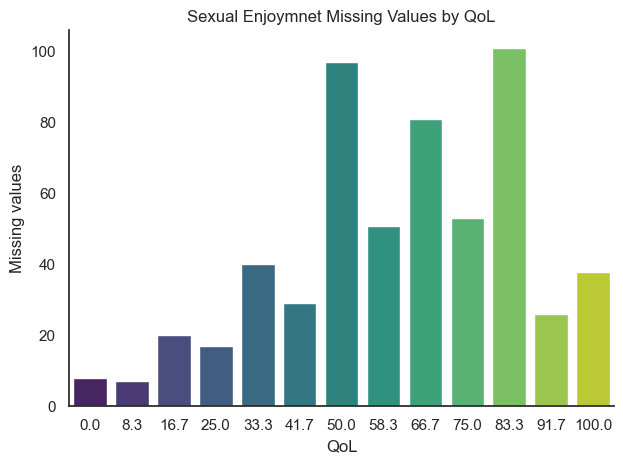

In [42]:
missing_by_target = df_C23.groupby('QoL')['Sexual enjoyment'].apply(lambda x: x.isnull().sum()).reset_index(name='missing')
missing_by_target['QoL_str'] = missing_by_target['QoL'].apply(lambda x: f"{x:.1f}")
sns.barplot(data=missing_by_target, x='QoL_str', y='missing', palette='viridis')
plt.xlabel("QoL")
plt.ylabel("Missing values")
plt.title("Sexual Enjoymnet Missing Values by QoL")
plt.tight_layout()
sns.despine()
plt.show()

Vemos que la mayor cantidad de valores nulos se produce en la zona media alta de la calidad de vida y disminuye en los valores bajos. Dado el sesgo que producen estos valores nulos, es posible que pueden no penalizar el cálculo de QoL produciendo valores altos, no tenemos forma de comprobarlo. Por lo tanto, la variable no presenta mayor utilidad para la clasificación.

### Sexual Functioning
*Funcionamiento sexual: evalúa la capacidad y actividad sexual. Se obtiene de las preguntas 36 y 37, que abordan la frecuencia y calidad de la actividad sexual.*


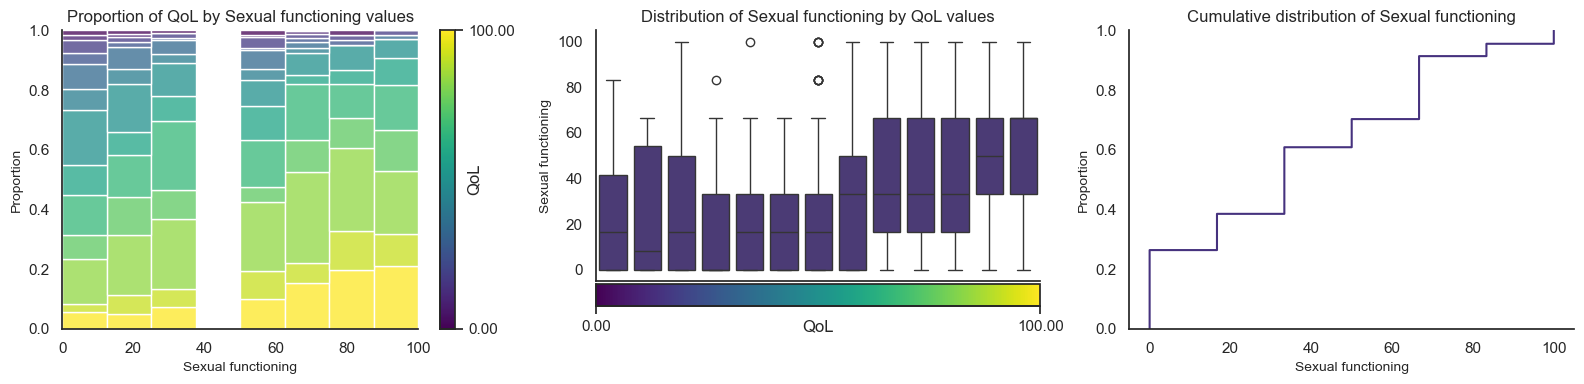



Statistics for Sexual functioning by QoL values:



count  mean   std  min   25%   50%   75%    max  Outliers Count  \
QoL                                                                       
0.00    15.00 25.56 27.36 0.00  0.00 16.67 41.67  83.33               0   
8.33    12.00 23.61 29.69 0.00  0.00  8.33 54.17  66.67               0   
16.67   36.00 25.46 29.41 0.00  0.00 16.67 50.00 100.00               0   
25.00   27.00 20.37 27.86 0.00  0.00  0.00 33.33  83.33               1   
33.33   77.00 21.65 23.89 0.00  0.00 16.67 33.33 100.00               1   
41.67   57.00 19.88 23.24 0.00  0.00 16.67 33.33  66.67               0   
50.00  180.00 25.37 27.43 0.00  0.00 16.67 33.33 100.00               9   
58.33  116.00 30.03 28.84 0.00  0.00 33.33 50.00 100.00               0   
66.67  250.00 38.00 27.75 0.00 16.67 33.33 66.67 100.00               0   
75.00  142.00 38.50 30.57 0.00 16.67 33.33 66.67 100.00               0   
83.33  328.00 42.23 28.55 0.00 16.67 33.33 66.67 100.00               0   
91.67   91.00 46.89 29.18 0.00 33.33 50.00 66.67 100.00               0   
100.00 143.00 50.70 30.63 0.00 33.33 66.67 66.67 100.00               0   

              Outliers  skew  
QoL                           
0.00                []  0.77  
8.33                []  0.74  
16.67               []  0.81  
25.00          [83.33]  1.06  
33.33          [100.0]  0.91  
41.67               []  0.83  
50.00   [83.33, 100.0]  0.87  
58.33               []  0.75  
66.67               []  0.25  
75.00               []  0.35  
83.33               []  0.03  
91.67               []  0.05  
100.00              [] -0.26

In [43]:
# Visualización de los atributos más destacables de la variable
afn.viz_single_variable(df_C23, 'Sexual functioning')

El funcionamiento sexual tiene una relación directa con QoL, con una cierta estabilización a partir de los valores medio-altos y medias desplazadas hacia los valores bajos en todo el rango de QoL. En general, la proporción de niveles de calidad de vida altos se encuentra presente en todos los valores de la variable. En los valores altos de QoL la variable presenta una distribución prácticamente normal lo que puede indicar que no es determinante para tener una calidad de vida media-alta.

### Systemic therapy side effects
*Efectos Secundarios de la Terapia Sistémica: evalúa los efectos adversos derivados de tratamientos sistémicos (como la quimioterapia). Se obtiene combinando las preguntas 40 y 43, que exploran diversos síntomas secundarios.*

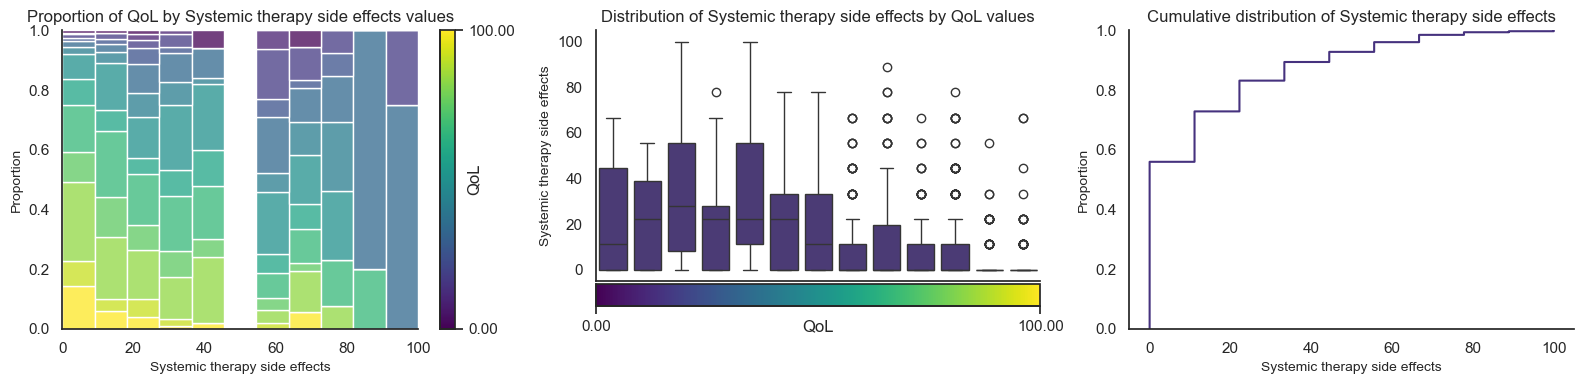



Statistics for Systemic therapy side effects by QoL values:



count  mean   std  min   25%   50%   75%    max  Outliers Count  \
QoL                                                                       
0.00    15.00 22.22 24.85 0.00  0.00 11.11 44.44  66.67               0   
8.33    12.00 22.22 23.21 0.00  0.00 22.22 38.89  55.56               0   
16.67   36.00 32.41 28.16 0.00  8.33 27.78 55.56 100.00               0   
25.00   27.00 22.22 22.43 0.00  0.00 22.22 27.78  77.78               1   
33.33   77.00 32.61 29.36 0.00 11.11 22.22 55.56 100.00               0   
41.67   57.00 23.00 23.84 0.00  0.00 22.22 33.33  77.78               0   
50.00  180.00 18.02 20.65 0.00  0.00 11.11 33.33  77.78               0   
58.33  116.00 11.02 17.55 0.00  0.00  0.00 11.11  66.67              20   
66.67  250.00 11.56 17.13 0.00  0.00  0.00 19.44  88.89              11   
75.00  142.00  8.69 13.37 0.00  0.00  0.00 11.11  66.67              14   
83.33  328.00  7.86 14.54 0.00  0.00  0.00 11.11  77.78              32   
91.67   91.00  4.76  9.96 0.00  0.00  0.00  0.00  55.56              22   
100.00 143.00  3.57 10.27 0.00  0.00  0.00  0.00  66.67              25   

                                   Outliers  skew  
QoL                                                
0.00                                     []  0.75  
8.33                                     []  0.50  
16.67                                    []  0.41  
25.00                               [77.78]  1.03  
33.33                                    []  0.72  
41.67                                    []  0.97  
50.00                                    []  1.10  
58.33          [33.33, 44.44, 55.56, 66.67]  1.66  
66.67          [55.56, 66.67, 77.78, 88.89]  1.92  
75.00          [33.33, 44.44, 55.56, 66.67]  1.92  
83.33   [33.33, 44.44, 55.56, 66.67, 77.78]  2.30  
91.67          [11.11, 22.22, 33.33, 55.56]  2.54  
100.00  [11.11, 22.22, 33.33, 44.44, 66.67]  4.21

In [44]:
# Visualización de los atributos más destacables de la variable
afn.viz_single_variable(df_C23, 'Systemic therapy side effects')

La variable presenta una relación inversa con QoL propia de los otros síntomas que hemos visto. Destaca que casi un 60% de las personas no sufren este tipo de dolencias. Dentro del grupo que tiene valores superiores a 0 es más difícil llegar a niveles altos de calidad de vida a partir de 20. Puede verse como los valores de los cuartiles descienden rápidamente a medida que aumenta el QoL. Este hecho es un indicador de la dificultad que encuentran las personas para tener una calidad de vida alta con efectos colaterales del tratamiento más agudo. Se puede ver como pocas personas pueden tolerar estos niveles altos en la cantidad creciente de casos atípicos hacia valores altos de QoL.

### Upset by Hair Loss
*Incomodidad por Pérdida de Cabello: mide el impacto emocional de la pérdida de cabello. Se calcula a partir de la pregunta 52.*

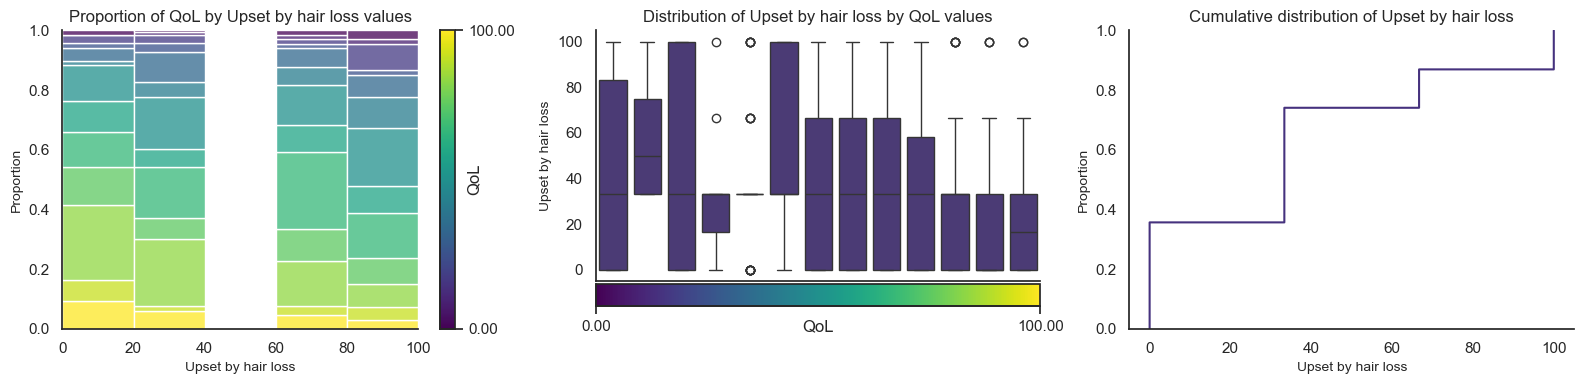



Statistics for Upset by hair loss by QoL values:



count  mean   std   min   25%   50%    75%    max  Outliers Count  \
QoL                                                                         
0.00     7.00 42.86 46.00  0.00  0.00 33.33  83.33 100.00               0   
8.33     4.00 58.33 31.91 33.33 33.33 50.00  75.00 100.00               0   
16.67   17.00 49.02 42.68  0.00  0.00 33.33 100.00 100.00               0   
25.00   11.00 33.33 29.81  0.00 16.67 33.33  33.33 100.00               2   
33.33   37.00 38.74 30.95  0.00 33.33 33.33  33.33 100.00              17   
41.67   23.00 56.52 33.99  0.00 33.33 33.33 100.00 100.00               0   
50.00   78.00 38.89 34.15  0.00  0.00 33.33  66.67 100.00               0   
58.33   43.00 32.56 36.00  0.00  0.00 33.33  66.67 100.00               0   
66.67   83.00 39.36 32.15  0.00  0.00 33.33  66.67 100.00               0   
75.00   50.00 30.67 34.89  0.00  0.00 33.33  58.33 100.00               0   
83.33  105.00 25.08 27.26  0.00  0.00 33.33  33.33 100.00               5   
91.67   21.00 25.40 37.87  0.00  0.00  0.00  33.33 100.00               3   
100.00  34.00 23.53 29.05  0.00  0.00 16.67  33.33 100.00               2   

                   Outliers  skew  
QoL                                
0.00                     []  0.36  
8.33                     []  0.85  
16.67                    []  0.18  
25.00        [66.67, 100.0]  1.02  
33.33   [0.0, 66.67, 100.0]  0.76  
41.67                    []  0.12  
50.00                    []  0.62  
58.33                    []  0.76  
66.67                    []  0.46  
75.00                    []  0.83  
83.33               [100.0]  1.03  
91.67               [100.0]  1.20  
100.00              [100.0]  1.22

In [45]:
# Visualización de los atributos más destacables de la variable
afn.viz_single_variable(df_C23, 'Upset by hair loss')

Este predictor es el que contiene mayor cantidad de valores nulos con el 70% de las observaciones. En cierto sentido, la caída del cabello es un efecto secundario de la terapia sistémica que hemos visto en la variable anterior. Posiblemente, la variable esté muy vinculada al tipo de tratamiento, como la quimioterapia a la que no todas las personas son expuestas. Sin embargo, no tenemos datos suficientes para analizarlo.

Vamos a analizar los valores nulos por QoL, como hemos hecho con Sexual enjoyment:

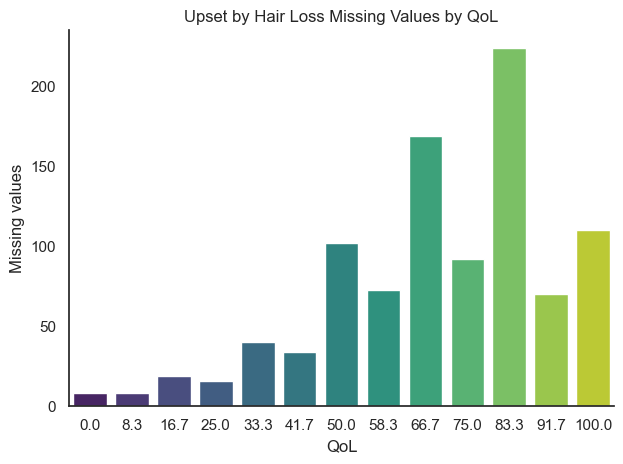

In [46]:
# Visualización de los valores nulos de la variable por valor de QoL
missing_by_target = df_C23.groupby('QoL')['Upset by hair loss'].apply(lambda x: x.isnull().sum()).reset_index(name='missing')
missing_by_target['QoL_str'] = missing_by_target['QoL'].apply(lambda x: f"{x:.1f}")
sns.barplot(data=missing_by_target, x='QoL_str', y='missing', palette='viridis')
plt.xlabel("QoL")
plt.ylabel("Missing values")
plt.title("Upset by Hair Loss Missing Values by QoL")
plt.tight_layout()
sns.despine()
plt.show()

Se puede ver que la situación es semejante a la encontrada en Sexual enjoyment. Sin embargo, en este caso la cantidad de valores nulos es el doble y podría deberse a la menor cantidad de personas que han sufrido este efecto adverso, aunque no tenemos datos para corroborarlo.

### Análisis Multivariable
A continuación vamos a explorar las correlaciones existentes entre las variables mediante la matriz de correlación. Para ello, primero ordenaremos las columnas para agrupar las variables de acuerdo al tipo de relación con QoL que hemos visto: directa e inversa, con el fin de facilitar la identificación de patrones.


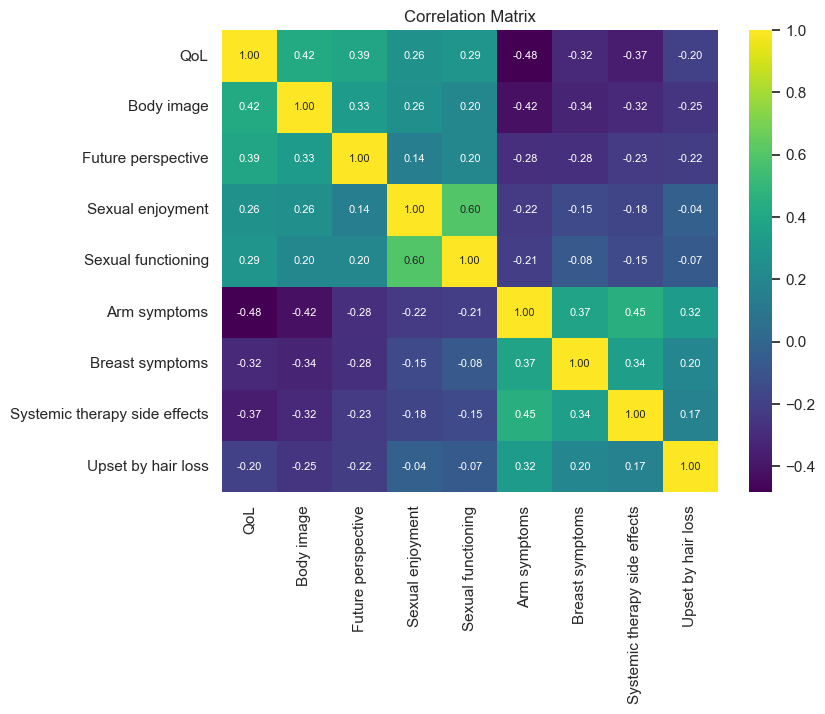

In [47]:
df_C23_types = df_C23[['QoL', 'Body image', 'Future perspective', 'Sexual enjoyment', 'Sexual functioning', 'Arm symptoms', 'Breast symptoms', 'Systemic therapy side effects', 'Upset by hair loss']]
corr_matrix = df_C23_types.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f", annot_kws={'fontsize':8})
plt.title("Correlation Matrix")
plt.show()

Ambos grupos presentan claramente correlaciones diametralmente opuestas entre ellos y similares en su interior, como era de esperar. En el caso de las variables donde sus valores altos inciden positivamente en QoL, vemos una correlación más alta en la imagen corporal y las perspectivas de futuro. Por el contrario en las que lo hacen negativamente, nos referimos siempre a sus valores altos, los síntomas en el brazo son los que presentan una correlación negativa más marcada. También es destacable la correlación, relativamente alta, entre las dos variables del aspecto sexual, la cual podemos intuir que no es mayor debido al sesgo que presenta Sexual enjoyment. En general, se aprecian valores cercanos a cero que indica poca linealidad o redundancia entre la información que aportan los atributos. 

Para visualizar mejor este aspecto, vamos a utilizar la función auxiliar viz_single_vs_all que grafica la relación lineal entre todas las variables de un dataframe.

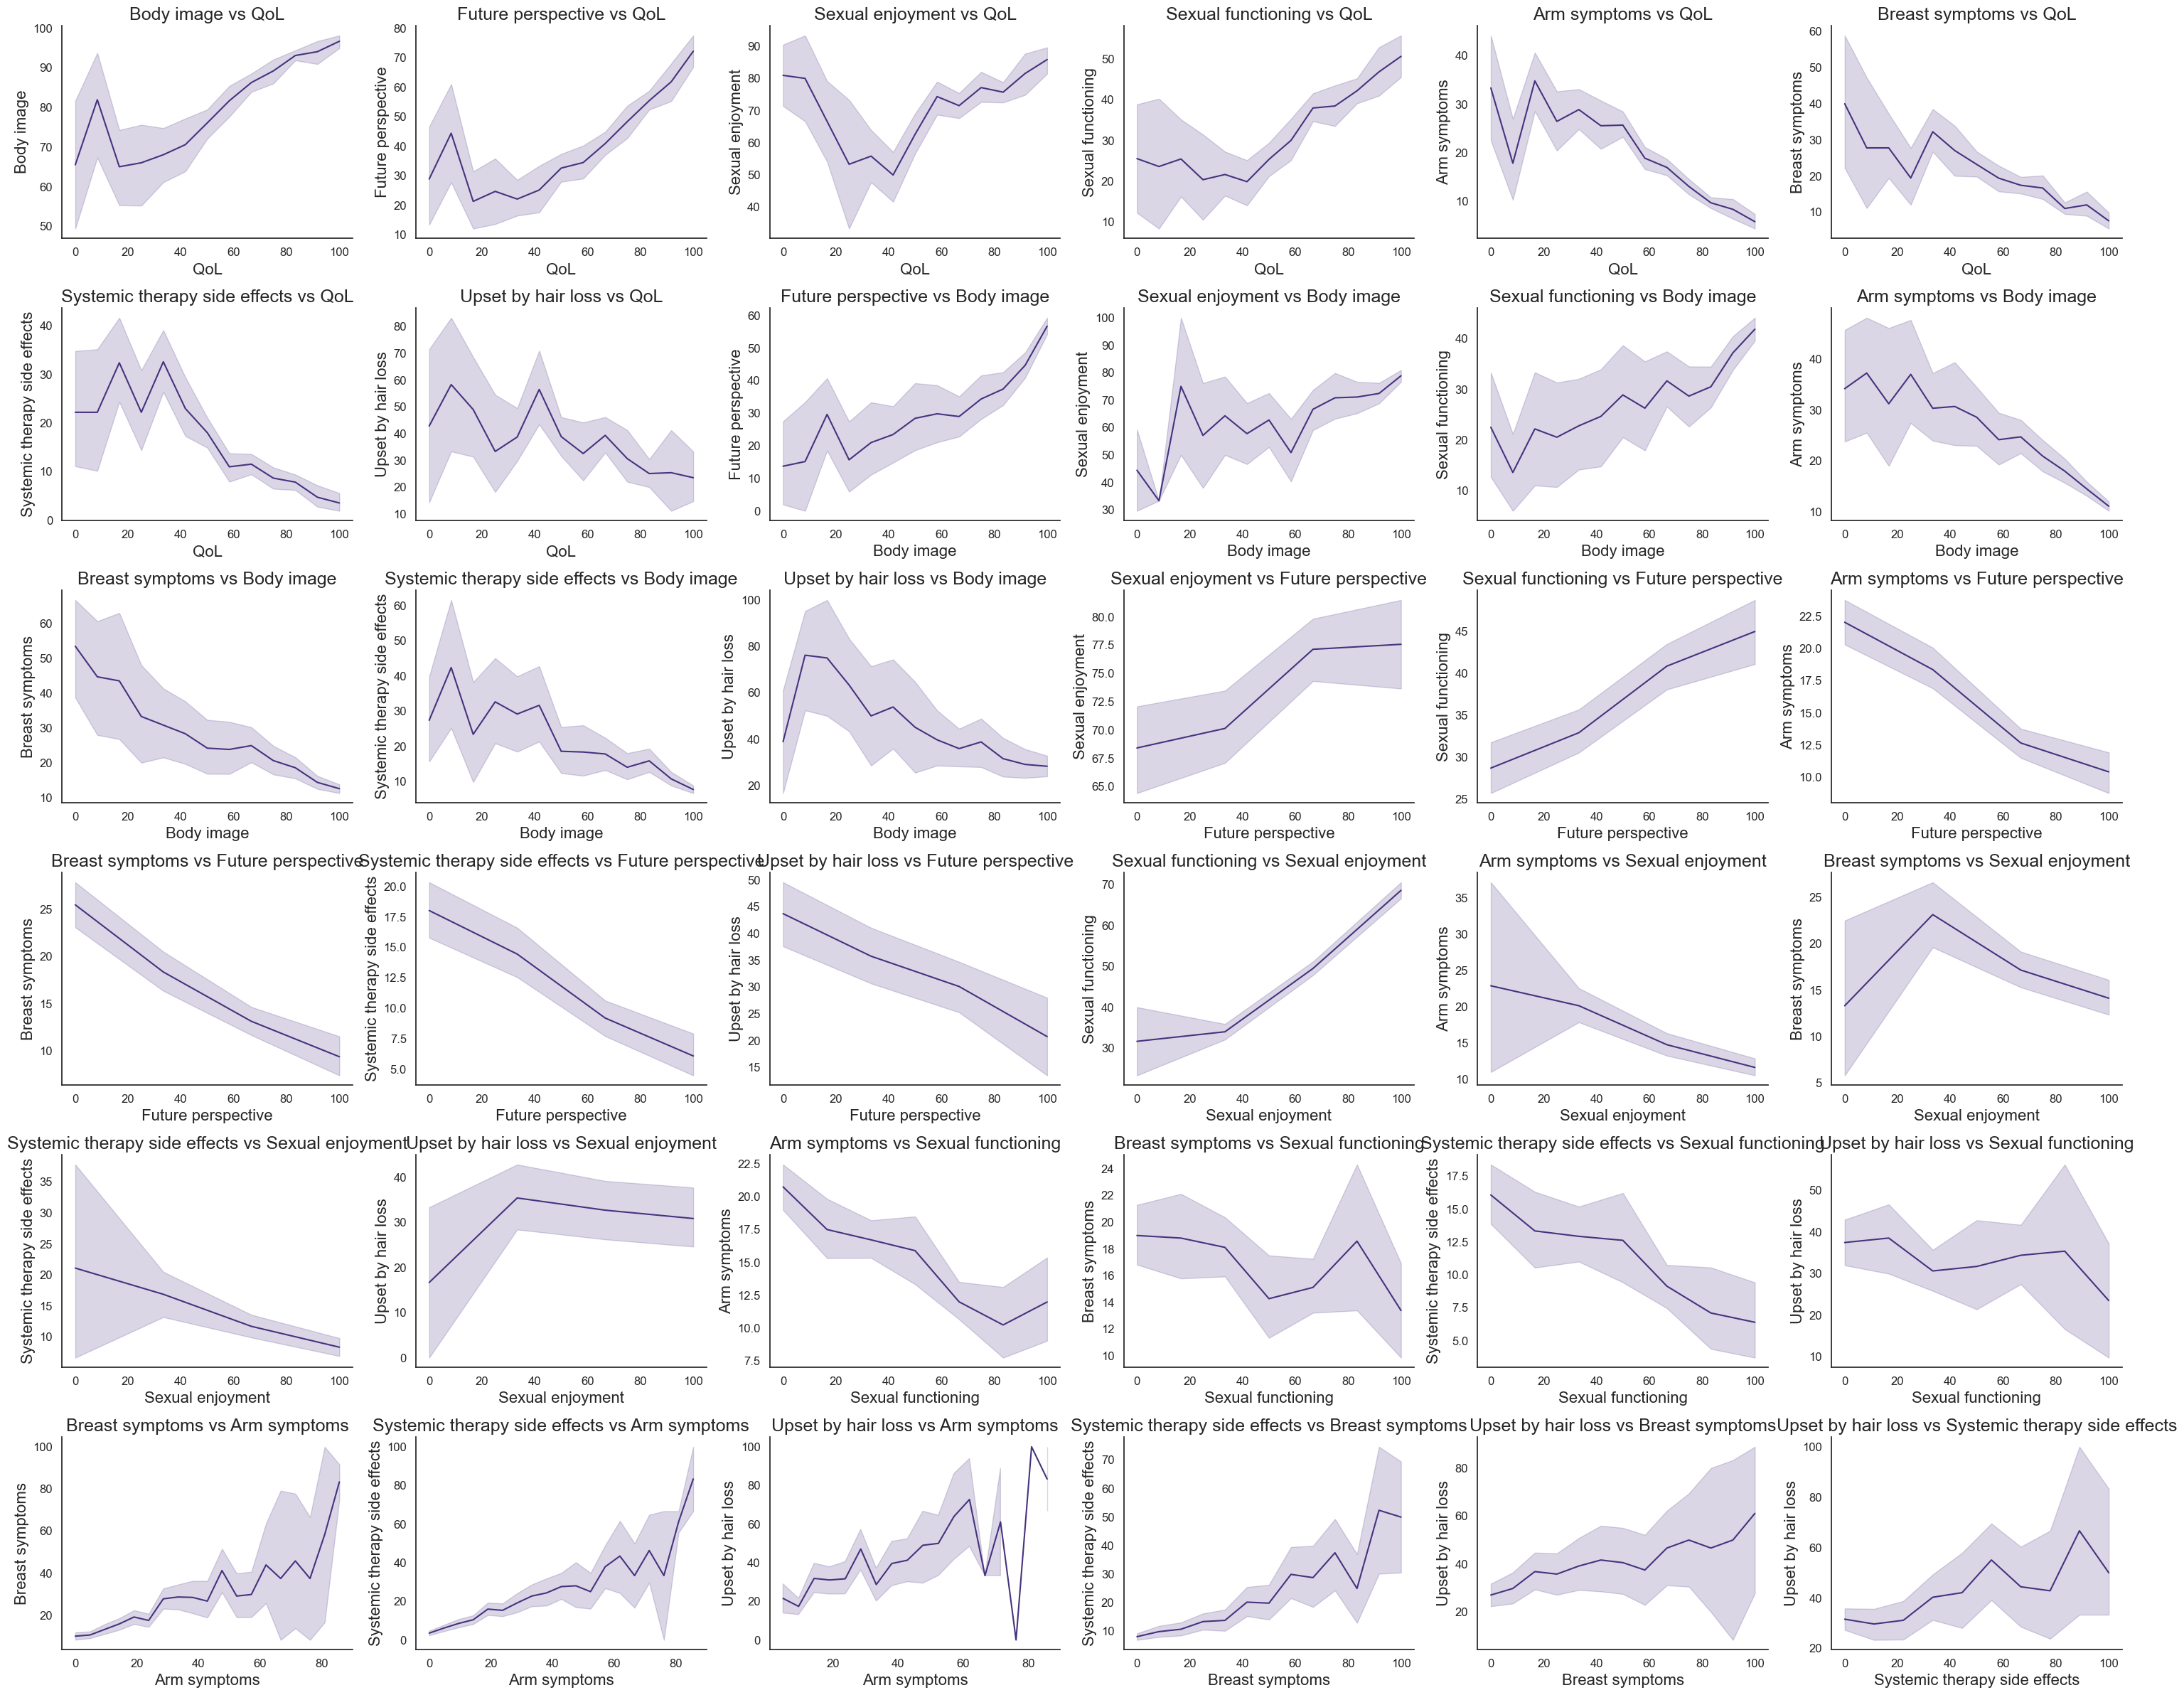

In [48]:
afn.viz_single_vs_all(df_C23_types, n_cols=6)

Se puede ver claramente la relación con monotonía creciente de las variables que hemos denominado 'positivas' y la monotonía decreciente de las sintomáticas o 'negativas', con la variable objetivo (QoL). Esta monotonía mucho menor en los casos de Sexual enjoyment y Upset hair loss. En la primera es muy interesante ver como la tendencia es decreciente en los valores bajos, pero creciente en los valores altos, justamente donde encontramos la mayor cantidad de valores faltantes que acentúan el sesgo. La segunda, parece aplanarse hacia los valores altos, donde también encontramos la mayor cantidad de observaciones no informadas. A su vez, Future functioning mantiene una relación muy lineal con el resto de variables: decreciente con las sintomáticas y creciente con el resto. 

En conjunto, estos patrones son consistentes con la idea de que, a medida que se reducen los síntomas, aumenta la percepción de bienestar en las diferentes áreas (física, emocional, social) y mejora la calidad de vida.

### Conclusiones

El conjunto esta formado por 1727 observaciones formadas por 8 atributos y la variable objetivo QoL. Las filas completas son 1474, dado que se han encontrado 253 filas sin utilidad por contener valores nulos en todas las variables. A su vez, se han encontrado 817 valores nulos en Sexual enjoyment, que posiblemente produzcan un sesgo en la variable hacia valores altos; mientras, en Upset by hair loss se han encontrado 1214 valores nulos, que podrían deberse a personas que no han experimentado este efecto secundario de los tratamientos más agresivos, sin embargo no tenemos forma de comprobarlo con los datos disponibles.

Al igual que en el conjunto C30, podemos encontrar dos tipos de variables muy marcados. Por un lado, las referidas a síntomas de la enfermedad o el tratamiento: Arm symptoms, Breast symptoms, Systemic therapy side effects y Upset by hair loss. Todas ellas mantienen una relación inversa respecto a la variable objetivo: cuanto más crecen, más decrece la calidad de vida. Por otro lado, las referidas a aspectos positivos: Body image, Future perspective, Sexual enjoyment y Sexual functioning. Este conjunto mantiene una relación directa con QoL: cuanto más crecen las variables, más crece la calidad de vida. 



### 1.4 Dominio EORTC QLQ-C30 U EORTC QLQ-C23
Analizamos las correlaciones de las variables entre ambos conjuntos:

In [49]:
# Se unifican ambos conjuntos, con las variables ordenadas de C_23
df_QLQ = pd.concat([df_C30, df_C23_types.drop('QoL', axis=1)], axis=1)

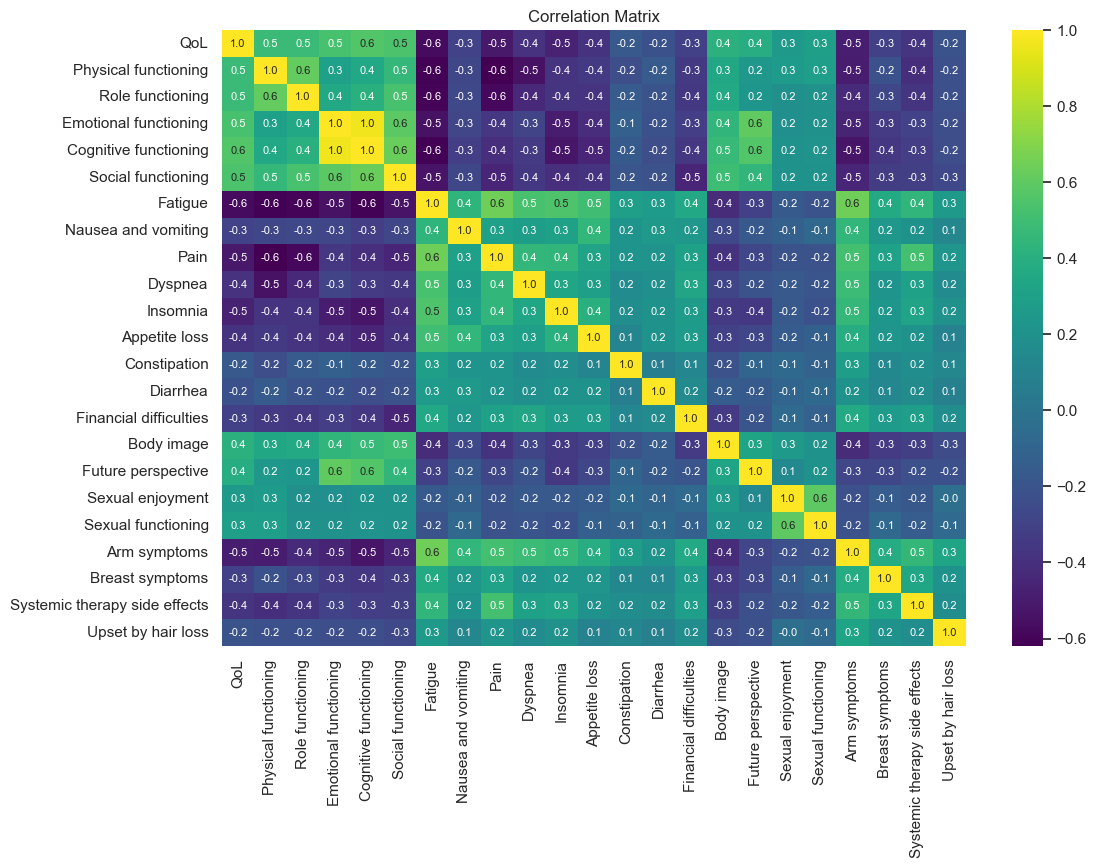

In [50]:
# Visualización de las matriz de correlaciones
corr_matrix = df_QLQ.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".1f", annot_kws={'fontsize':8})
plt.title("Correlation Matrix")
plt.show()

Se puede ver que no existen correlaciones extremas entre ambos conjuntos de variables. En el caso del grupo de los síntomas: los síntomas en el brazo y la fatiga aparecen como las más correlacionadas de forma positiva con el resto de su grupo; y de forma negativa con el resto. Mientras, las perspectivas de futuro y el funcionamiento tanto cognitivo como emocional aparecen como las más similares en el otro grupo.

### Conclusiones

Ambos conjuntos pueden complementarse eficazmente, ya que el C23 es una ampliación del C30 y no generan redundancias en la información que aporta cada uno. En ambos encontramos los mismos tipos de variables síntomas y aspectos de funcionamiento, perspectivas e imagen propia, las primeras con una incidencia negativa en la calidad de vida, mientras las segundas la influencian positivamente.

## 2 Preparación de los datos

A continuación, se realizarán las acciones de limpieza y separación.

### 2.1 Dominio EORTC QLQ-C30

#### Eliminación de valores faltantes

Eliminamos las filas con valores ausentes conociendo que se trata de observaciones con valores nulos en todos los predictores. Luego, comprobamos si se han producido variaciones en los estadísticos para afirmar que no se han eliminado filas informadas.

In [51]:
# Eliminamos los valores NaN y comprobamos que todas las variables
df_C30.dropna(inplace=True)
afn.rows_same_nulls(df_C30)

Total rows with missing values:  0
Variables with identical missing rows:  15
QoL
Physical functioning
Role functioning
Emotional functioning
Cognitive functioning
Social functioning
Fatigue
Nausea and vomiting
Pain
Dyspnea
Insomnia
Appetite loss
Constipation
Diarrhea
Financial difficulties


In [52]:
# inspeccionamos si se han producido variaciones
afn.inspect_all_columns(df_C30)

dtype  null_count  \
column_name                                   
QoL                     float64           0   
Physical functioning    float64           0   
Role functioning        float64           0   
Emotional functioning   float64           0   
Cognitive functioning   float64           0   
Social functioning      float64           0   
Fatigue                 float64           0   
Nausea and vomiting     float64           0   
Pain                    float64           0   
Dyspnea                 float64           0   
Insomnia                float64           0   
Appetite loss           float64           0   
Constipation            float64           0   
Diarrhea                float64           0   
Financial difficulties  float64           0   

                                                            unique_values  \
column_name                                                                 
QoL                     [0.0, 8.33, 16.67, 25.0, 33.33, 41.67, 50.0, 5...   
Physical functioning    [6.67, 13.33, 20.0, 26.67, 33.33, 40.0, 46.67,...   
Role functioning           [0.0, 16.67, 33.33, 50.0, 66.67, 83.33, 100.0]   
Emotional functioning   [0.0, 8.33, 16.67, 25.0, 33.33, 41.67, 50.0, 5...   
Cognitive functioning   [0.0, 5.56, 11.11, 16.67, 22.22, 27.78, 33.33,...   
Social functioning         [0.0, 16.67, 33.33, 50.0, 66.67, 83.33, 100.0]   
Fatigue                 [0.0, 11.11, 22.22, 33.33, 44.44, 55.56, 66.67...   
Nausea and vomiting        [0.0, 16.67, 33.33, 50.0, 66.67, 83.33, 100.0]   
Pain                       [0.0, 16.67, 33.33, 50.0, 66.67, 83.33, 100.0]   
Dyspnea                                        [0.0, 33.33, 66.67, 100.0]   
Insomnia                                       [0.0, 33.33, 66.67, 100.0]   
Appetite loss                                  [0.0, 33.33, 66.67, 100.0]   
Constipation                                   [0.0, 33.33, 66.67, 100.0]   
Diarrhea                                       [0.0, 33.33, 66.67, 100.0]   
Financial difficulties                         [0.0, 33.33, 66.67, 100.0]   

                        total_unique_values  skew   count  mean   std  min  \
column_name                                                                  
QoL                                      13 -0.68 1478.00 67.45 22.40 0.00   
Physical functioning                     15 -1.95 1478.00 88.37 17.49 6.67   
Role functioning                          7 -2.26 1478.00 88.48 23.34 0.00   
Emotional functioning                    13 -0.46 1478.00 62.04 26.90 0.00   
Cognitive functioning                    19 -0.73 1478.00 69.26 22.94 0.00   
Social functioning                        7 -1.51 1478.00 82.63 25.37 0.00   
Fatigue                                  10  0.89 1478.00 27.18 25.78 0.00   
Nausea and vomiting                       7  3.13 1478.00  5.44 12.80 0.00   
Pain                                      7  1.26 1478.00 21.47 26.40 0.00   
Dyspnea                                   4  1.98 1478.00 12.99 24.18 0.00   
Insomnia                                  4  0.64 1478.00 32.79 33.34 0.00   
Appetite loss                             4  1.95 1478.00 13.08 24.93 0.00   
Constipation                              4  2.90 1478.00  6.41 16.81 0.00   
Diarrhea                                  4  2.66 1478.00  8.16 19.34 0.00   
Financial difficulties                    4  2.92 1478.00  7.89 20.73 0.00   

                         25%    50%    75%    max  
column_name                                        
QoL                    50.00  66.67  83.33 100.00  
Physical functioning   86.67  93.33 100.00 100.00  
Role functioning       83.33 100.00 100.00 100.00  
Emotional functioning  41.67  66.67  83.33 100.00  
Cognitive functioning  55.56  72.22  88.89 100.00  
Social functioning     66.67 100.00 100.00 100.00  
Fatigue                 0.00  22.22  44.44 100.00  
Nausea and vomiting     0.00   0.00   0.00 100.00  
Pain                    0.00  16.67  33.33 100.00  
Dyspnea          

Podemos comprobar que todas las variables tienen 1478 observaciones sin valores nulos. Tampoco se han producido variaciones en los estadísticos.

#### Reducción de clases de la variable objetivo QoL.

Para transformar la variable objetivo en tres clases, utilizamos el KBinDiscretizer de Scikit-learn con un valor de 3 para n_bins. La estrategia uniforme produce una división basada en límites equidistantes sin alterar o comprimir la distribución.

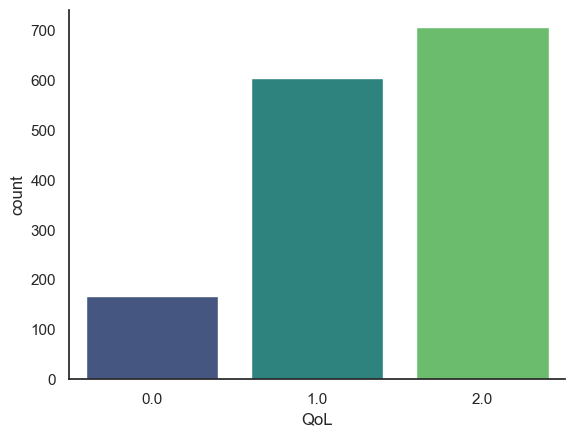

In [53]:
# Instancia del modelo, transformación y gráfico de la separación
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
df_C30['QoL'] = discretizer.fit_transform(df_C30[['QoL']])
sns.countplot(df_C30, x='QoL', palette='viridis')
sns.despine()

Ahora la variable QoL contiene tres clases donde: 0 corresponde a baja, 1 a media y 2 a alta calidad de vida

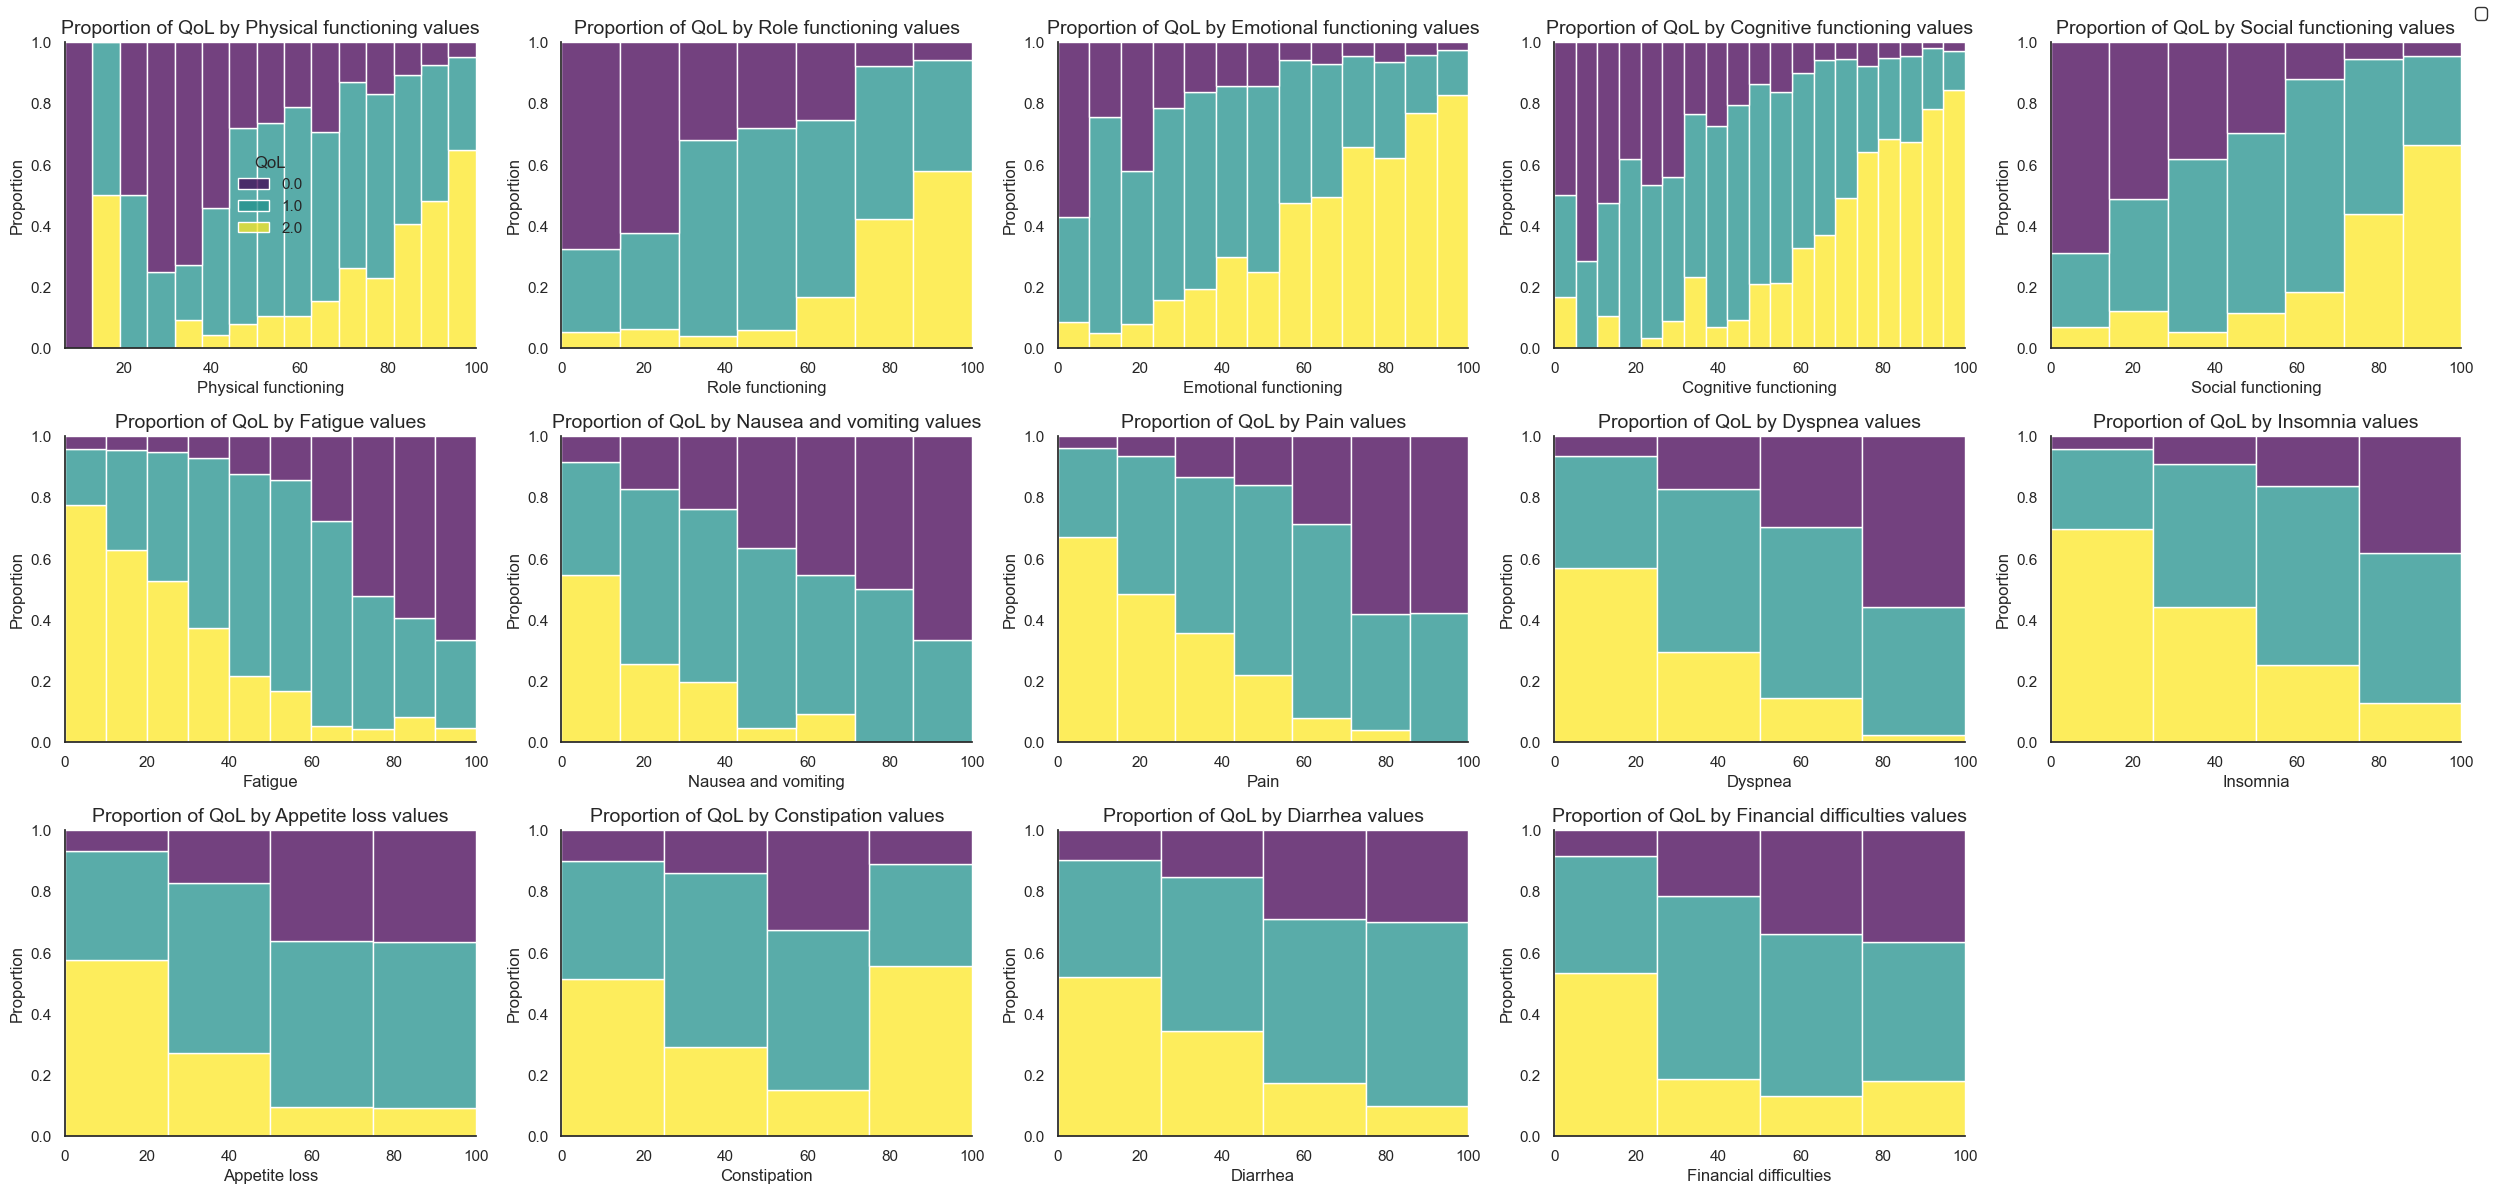

In [54]:
afn.viz_distributions_by_target(df_C30, 'QoL', ncols=5)

Podemos ver como las proporciones se han delimitado de forma más clara al tratarse de 3 clases, sin embargo, las relaciones no se han visto alteradas. En efecto, en el primer gráfico, podemos observar más claramente la anomalía de valores altos de QoL en el rango de 13,33 de Physical functioning que hemos encontrado en el análisis previo.

### 2.2 Dominio EORTC QLQ-C23

#### Eliminación de valores faltantes


A diferencia del caso anterior en este conjunto tenemos variables con valores nulos en filas que no se desean eliminar: los pertenecientes a Sexual enjoyment y Upset by hair loss. Por lo tanto, primero realizamos la eliminación de estas dos variables que no formarán parte del conjunto final y luego eliminamos las filas no informadas. También debemos tener en cuenta que el conjunto C30 tenía 249 filas nulas, pero el conjunto C23 tiene 253. Por lo tanto, en primer lugar uniremos ambos conjuntos y, posteriormente, eliminaremos las 4 filas con valores nulos en las variables de C23. Para ello, eliminamos las filas con nulos en la variable QoL y luego eliminamos esta variable del conjunto, ya que utilizaremos la transformada del conjunto C30 como variable objetivo.

In [55]:
# Eliminación de variables no utilizadas
df_C23.drop(['Sexual enjoyment', 'Upset by hair loss'], axis=1, inplace=True)

In [56]:
# Eliminación de las 249 filas con nulos en todas las variables
df_C23.dropna(subset=['QoL'], inplace=True)
# Eliminación de QoL y comprobación
df_C23.drop('QoL', axis=1, inplace=True)
afn.inspect_all_columns(df_C23)

dtype  null_count  \
column_name                                          
Arm symptoms                   float64           4   
Body image                     float64           4   
Breast symptoms                float64           4   
Future perspective             float64           4   
Sexual functioning             float64           4   
Systemic therapy side effects  float64           4   

                                                                   unique_values  \
column_name                                                                        
Arm symptoms                   [0.0, 4.76, 9.52, 14.29, 19.05, 23.81, 28.57, ...   
Body image                     [0.0, 8.33, 16.67, 25.0, 33.33, 41.67, 50.0, 5...   
Breast symptoms                [0.0, 8.33, 16.67, 25.0, 33.33, 41.67, 50.0, 5...   
Future perspective                                    [0.0, 33.33, 66.67, 100.0]   
Sexual functioning                [0.0, 16.67, 33.33, 50.0, 66.67, 83.33, 100.0]   
Systemic therapy side effects  [0.0, 11.11, 22.22, 33.33, 44.44, 55.56, 66.67...   

                               total_unique_values  skew   count  mean   std  \
column_name                                                                    
Arm symptoms                                    19  1.32 1474.00 16.32 15.48   
Body image                                      13 -1.94 1474.00 85.27 21.61   
Breast symptoms                                 13  1.52 1474.00 17.24 20.78   
Future perspective                               4  0.09 1474.00 45.23 34.90   
Sexual functioning                               7  0.34 1474.00 36.17 29.71   
Systemic therapy side effects                   10  1.83 1474.00 12.45 19.23   

                               min   25%   50%    75%    max  
column_name                                                   
Arm symptoms                  0.00  4.76 14.29  23.81  85.71  
Body image                    0.00 77.08 91.67 100.00 100.00  
Breast symptoms               0.00  0.00  8.33  25.00 100.00  
Future perspective            0.00  0.00 33.33  66.67 100.00  
Sexual functioning            0.00  0.00 33.33  66.67 100.00  
Systemic therapy side effects 0.00  0.00  0.00  22.22 100.00

Podemos comprobar que las filas aún contienen 4 filas con valores nulos y que no se han producido modificaciones en los estadísticos.


### 2.3 Unión de los dominios
La unión de los conjuntos se realiza verticalmente, es decir, en el eje 1 añadiendo las columnas del conjunto C23 a las filas del C30.

In [57]:
# Concatenación de los conjuntos
df_C30_C23 = pd.concat([df_C30, df_C23], axis=1)

In [58]:
# Visualización del resultado
df_C30_C23.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1478 entries, 1 to 1726
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   QoL                            1478 non-null   float64
 1   Physical functioning           1478 non-null   float64
 2   Role functioning               1478 non-null   float64
 3   Emotional functioning          1478 non-null   float64
 4   Cognitive functioning          1478 non-null   float64
 5   Social functioning             1478 non-null   float64
 6   Fatigue                        1478 non-null   float64
 7   Nausea and vomiting            1478 non-null   float64
 8   Pain                           1478 non-null   float64
 9   Dyspnea                        1478 non-null   float64
 10  Insomnia                       1478 non-null   float64
 11  Appetite loss                  1478 non-null   float64
 12  Constipation                   1478 non-null   float6

Puede verse la diferencia en las 4 filas de valores nulos. A continuación, eliminamos estas filas para terminar la limpieza del conjunto.

In [59]:
# Eliminación de las filas nulas del conjunto C23
df_C30_C23.dropna(inplace=True)
df_C30_C23.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1474 entries, 1 to 1726
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   QoL                            1474 non-null   float64
 1   Physical functioning           1474 non-null   float64
 2   Role functioning               1474 non-null   float64
 3   Emotional functioning          1474 non-null   float64
 4   Cognitive functioning          1474 non-null   float64
 5   Social functioning             1474 non-null   float64
 6   Fatigue                        1474 non-null   float64
 7   Nausea and vomiting            1474 non-null   float64
 8   Pain                           1474 non-null   float64
 9   Dyspnea                        1474 non-null   float64
 10  Insomnia                       1474 non-null   float64
 11  Appetite loss                  1474 non-null   float64
 12  Constipation                   1474 non-null   float6

### Exportación del conjunto de datos

Finalmente, exportamos el conjunto de datos unificado al formato csv, para utilizarlo en la fase de modelado.

In [60]:
df.to_csv('./data/QLQ_C30_C23.csv', index=False)